<a href="https://colab.research.google.com/github/Prashant-Shaw/Cardiovascular_Risk_Prediction/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies and TV Shows Clustering



##### **Project Type**    - Unsupervised ML - Clustering
##### **Contribution**    - Individual
##### **Name** - Prashant Shaw
##### **email** - prashantshaw77777@gmail.com 

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years?
4. Clustering similar content by matching text-based features



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [168]:
import numpy as np
import pandas as pd
from numpy import math
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import plotly.graph_objects as map
import re, string, unicodedata
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.stem import LancasterStemmer, WordNetLemmatizer
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Dataset Loading

In [76]:
drive.mount('/content/mydrive')
nf_path = '/content/mydrive/MyDrive/AlmaBetter/Capstone Project - Unsupervised ML Clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
nf_df_org = pd.read_csv(nf_path)

Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).


### Dataset First View

In [77]:
#Copying the original data into a seperate dataset for processing.
nf_df = nf_df_org.copy()

#Let's look at the dataset
nf_df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### Dataset Rows & Columns count

In [78]:
#Checking the shape of the dataset
nf_df.shape

(7787, 12)

There are 7787 rows and 12 features/columns in the dataset. Let's explore information of dataset.

### Dataset Information

In [79]:
#Checking the info of the dataset
nf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [80]:
#Checking the unique values in the dataset
nf_df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

There are 7787 unique entries in the show_id which is same as the number of rows of the dataset. So, we can infer that there are no duplicate entries in the dataset. The below code also confirms this.

In [81]:
#Confirming if any duplicate value present
nf_df.duplicated().value_counts()

False    7787
dtype: int64

There is no duplicate entries in the dataset.

#### Missing Values/Null Values

In [82]:
#Checking for null values in the dataset
nf_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

There are some null values in director, cast, country, date_added & rating. Let's visuallize these in percentage.

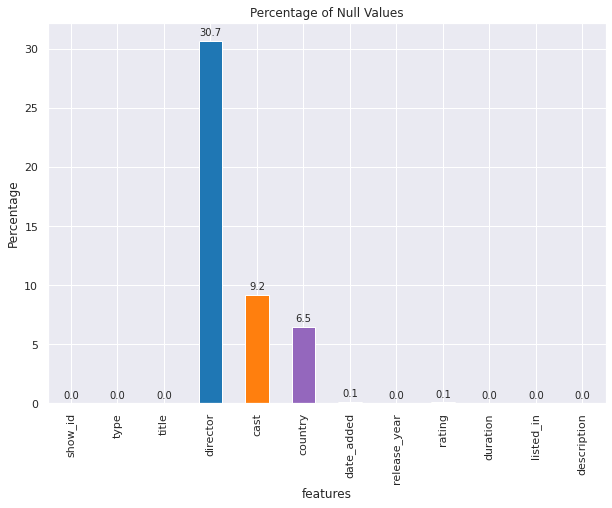

In [83]:
# Visualizing the missing values
plt.figure(figsize = (10,7))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#1f77b4', '#ff7f0e', '#9467bd','#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plots = (nf_df.isnull().sum()/len(nf_df)*100).plot(kind = "bar", title = "Percentage of Null Values", color = colors) 
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.1f'), (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel("features")
plt.ylabel("Percentage")
plt.show()

### Initial insights on the dataset -

This dataset consists of tv shows and movies available on Netflix as of 2019.

The dataset contains 7787 rows/observations and 12 columns/features.
There are no duplicate values in the dataset. 

director has 2389 null values, cast has 718 null values, country has 507 null values, date_added has 10 null values and rating has 7 null values.

release_year is of int dtype and other features are of object dtype.

We will be dealing with null values and dtypes in later sections of the project.

## ***2. Understanding Your Variables***

In [84]:
#Columns in the dataset
nf_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Here all are independent variable. There is no target or dependent variable which makes this a problem of Unsupervised Machine Learning. 

### Variables Description 

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [85]:
#Datatype of each features
nf_df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [86]:
#Description of the data
nf_df.describe(include = 'all')

show_id   type title                director                cast  \
count     7787   7787  7787                    5398                7069   
unique    7787      2  7787                    4049                6831   
top         s1  Movie    3%  Raúl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                      18                  18   
mean       NaN    NaN   NaN                     NaN                 NaN   
std        NaN    NaN   NaN                     NaN                 NaN   
min        NaN    NaN   NaN                     NaN                 NaN   
25%        NaN    NaN   NaN                     NaN                 NaN   
50%        NaN    NaN   NaN                     NaN                 NaN   
75%        NaN    NaN   NaN                     NaN                 NaN   
max        NaN    NaN   NaN                     NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            7280             7777   7787.000000   7780      7787   
unique            681             1565           NaN     14       216   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2555              118           NaN   2863      1608   
mean              NaN              NaN   2013.932580    NaN       NaN   
std               NaN              NaN      8.757395    NaN       NaN   
min               NaN              NaN   1925.000000    NaN       NaN   
25%               NaN              NaN   2013.000000    NaN       NaN   
50%               NaN              NaN   2017.000000    NaN       NaN   
75%               NaN              NaN   2018.000000    NaN       NaN   
max               NaN              NaN   2021.000000    NaN       NaN   

            listed_in                                        description  
count            7787                                               7787  
unique            492                                               7769  
top     Documentaries  Multiple women report their husbands as missin...  
freq              334                                                  3  
mean              NaN                                                NaN  
std               NaN                                                NaN  
min               NaN                                                NaN  
25%               NaN                                                NaN  
50%               NaN                                                NaN  
75%               NaN                                                NaN  
max               NaN                                                NaN

## 3. ***Data Wrangling***

### Handling Missing Values

* We are replacing the missing values in the director, cast, and country attributes with 'Unknown'
* 10 records with missing values in the date_added column can be dropped.
* The missing values in rating can be imputed with its mode, since this attribute is discrete.

In [87]:
#Handling null values
nf_df[['director','cast','country']] = nf_df[['director','cast','country']].fillna('Unknown')
nf_df['rating'] = nf_df['rating'].fillna(nf_df['rating'].mode()[0])
nf_df.dropna(axis=0, inplace = True)

In [88]:
#Resetting the index as we have dropped some rows.
nf_df.reset_index(inplace = True)

In [89]:
#Confirming if all the null values have been filled
nf_df.isnull().sum()

index           0
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

All the null data have been handled successfully.

### Typecasting "date_added" from object to datetime

In [90]:
#Changing the dtype of date added from object to datetime
nf_df["date_added"] = pd.to_datetime(nf_df['date_added'])

In [91]:
#Checking when the first show/movie was added in Netflix
nf_df["date_added"].min()

Timestamp('2008-01-01 00:00:00')

In [92]:
#Checking when last show/movie was added in Netflix
nf_df["date_added"].max()

Timestamp('2021-01-16 00:00:00')

First show/movie was added on "1st Jan 2008" and last show/movie was added on "16 Jan 2021".

In [93]:
# Adding new attributes month and year of date added
nf_df['month_added'] = nf_df['date_added'].dt.month
nf_df['year_added'] = nf_df['date_added'].dt.year

#Droping the 'date_added' feature as we have already extracted month and year from date added
nf_df.drop('date_added', axis=1, inplace=True)

### Typecasting "duration" from object to datetime

In [94]:
# Changing the duration columnn from object to int dtype. 
# Note - Here duration for Movies will be in mins and duration for TV Shows will be in seasons. While visualizing we will be visuallizing these two separately.

nf_df['duration'] = nf_df['duration'].apply(lambda x: int(x.split()[0]))

In [95]:
#Head of the dataset after handling all the data
nf_df.head()

index show_id     type  title           director  \
0      0      s1  TV Show     3%            Unknown   
1      1      s2    Movie   7:19  Jorge Michel Grau   
2      2      s3    Movie  23:59       Gilbert Chan   
3      3      s4    Movie      9        Shane Acker   
4      4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

   release_year rating  duration  \
0          2020  TV-MA         4   
1          2016  TV-MA        93   
2          2011      R        78   
3          2009  PG-13        80   
4          2008  PG-13       123   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  month_added  year_added  
0  In a future where the elite inhabit an island ...            8        2020  
1  After a devastating earthquake hits Mexico Cit...           12        2016  
2  When an army recruit is found dead, his fellow...           12        2018  
3  In a postapocalyptic world, rag-doll robots hi...           11        2017  
4  A brilliant group of students become card-coun...            1        2020

### Following are the insights of Data Wrangling section -

* All the null values have been filled and we have deleted 10 rows where date_added has null values.
* date_added has been changed from object dtype to datetime dtype. Then we extracted month and year from date_added and then we dropped date_added.
* In the dataset duration for Movies are in mins whereas duration for TV Shows are in terms of number of seasons.
* Feature duration also changed from object dtype to int. Here the units for Movies will be in mins whereas for TV Shows it will be in terms of number of seasons. 

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Function to plot some basic graphs

In [96]:
#Function to plot countplot
def count_plot(col, df, Order = None):
  '''This function plots the count plot for the passed feature
     Pass column name (str), Pandas DataFrame, Order (list of indexes) to plot the graph.'''
  plt.figure(figsize = (20,7))
  plt.title(f'Count plot of {col}')
  sns.countplot(x=col,data=df, order = Order)
  plt.xticks(rotation = 90)
  plt.show()

countplot will be used for the better visuallization of the observational counts of the categorical variable. As it puts observational counts in different category-based bins using bars.

In [97]:
#Function to plot Pie chart
def pie_chart(col):
  '''This function plot the pie chart for the given data.
  Pass the feature name in str to plot the pie chart.'''
  plt.rcParams['font.size'] = 12
  plt.figure(figsize = (7,7))
  exp = (0.05,)*len(nf_df[col].value_counts())
  nf_df[col].value_counts().plot.pie(autopct = '%1.2f%%', explode = exp)
  plt.title(f'percentage distribution of {col}')
  plt.axis('off')
  plt.show()

Pie charts are very much useful in displaying relative proportions of multiple classes of data. 

In [98]:
def col_word_cloud(col, w_df):
  ''' This function will show the WordCloud for the passed feature'''
  plt.figure(figsize = (15,7))
  text = " ".join(word for word in w_df[col])
  # Create stopword list:
  stopwords = set(STOPWORDS)
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Display the generated image:
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

WordClouds offer a visible picture of text data. 

### Univariate Analysis

We will explore each feature one by one and will try to explore some useful insights.

#### 1. 'type' Feature

In [99]:
# Checking the number of TV Shows and Movies in the dataset
nf_df.type.value_counts()

Movie      5377
TV Show    2400
Name: type, dtype: int64

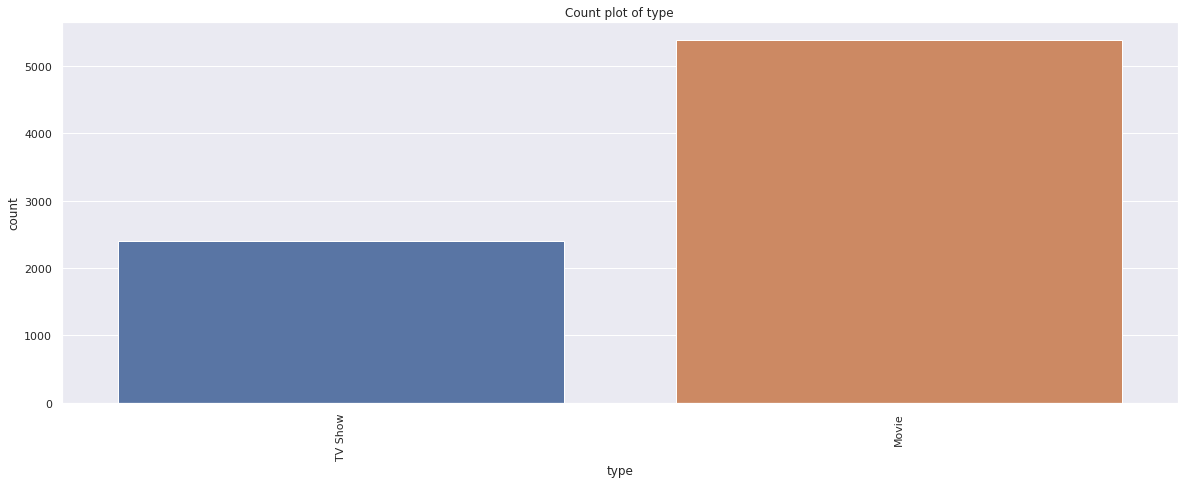

In [100]:
#Plotting the count plot for type
count_plot('type', nf_df)

In the dataset count of Movie is more than TV Shows

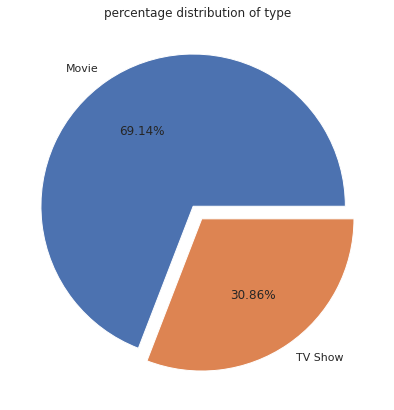

In [101]:
#Plotting the Pie Chart for type
pie_chart('type')

In the dataset around 69% of Movie is present and 31% of TV Show is present.

#### 2. title

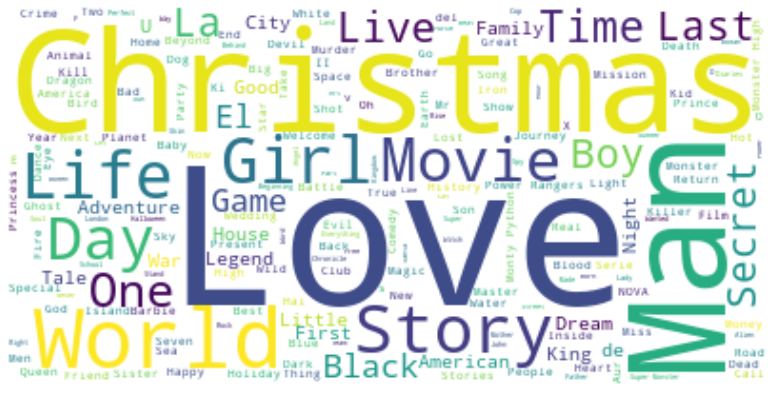

In [102]:
#Chekcing the WordCloud for words present in feature 'title'
col_word_cloud('title', nf_df)

Christmas, World, Love, Man are some of the most words in the title.

Seems like most of the shows/movies are released during Christmas.

#### 3. director

In [103]:
#Directors having most counts of movies
nf_df[nf_df['director']!= 'Unknown']['director'].value_counts().head(20)

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Martin Scorsese           12
Jay Chapman               12
Steven Spielberg          10
David Dhawan               9
Ryan Polito                8
Robert Rodriguez           8
Kunle Afolayan             8
Hakan Algül                8
Shannon Hartman            8
Johnnie To                 8
Quentin Tarantino          8
Lance Bangs                8
Don Michael Paul           7
McG                        7
Justin G. Dyck             7
Name: director, dtype: int64

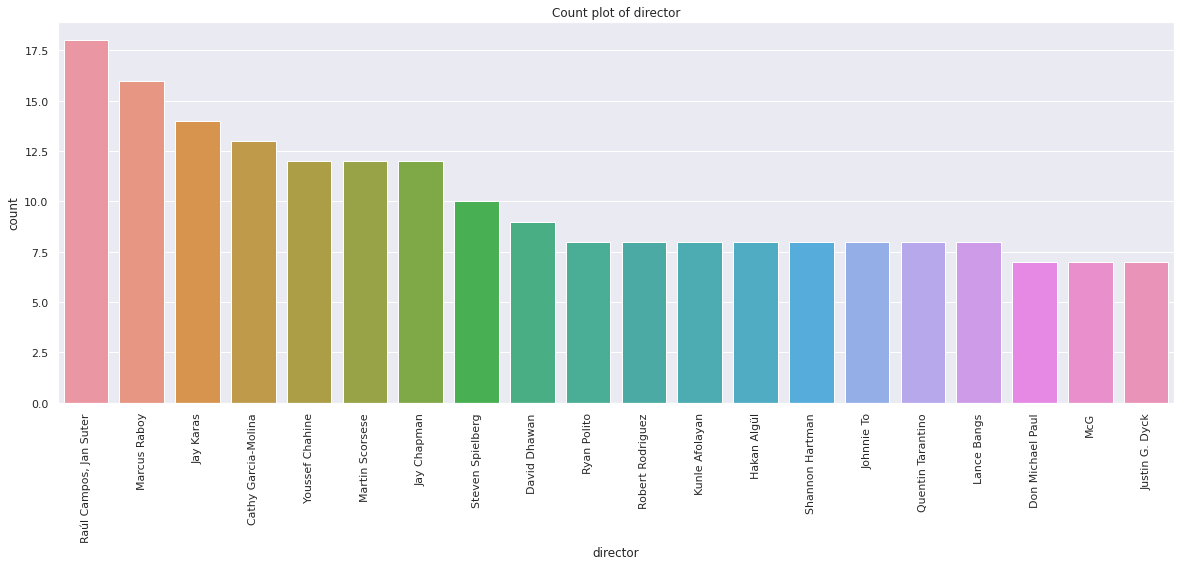

In [104]:
#Plotting the bar graph for top 20 directors who have most number of shows/movies in the dataset.
count_plot('director', nf_df, nf_df[nf_df['director']!= 'Unknown']['director'].value_counts().head(20).index)

Raúl Campos, Jan Suter has directed most of the movies for Netflix.

#### 4. cast

In [105]:
#Making a dictionary with cast name as key and number of movies/shows done by them as values.
casts = {}
cast_name = []
cast_column_splitted = []
for row in nf_df['cast']:
  if row != 'Unknown':
    cast_name.extend(row.split(","))
    
for c_name in cast_name:
  if c_name not in list(casts.keys()):
    casts[c_name] = cast_name.count(c_name)

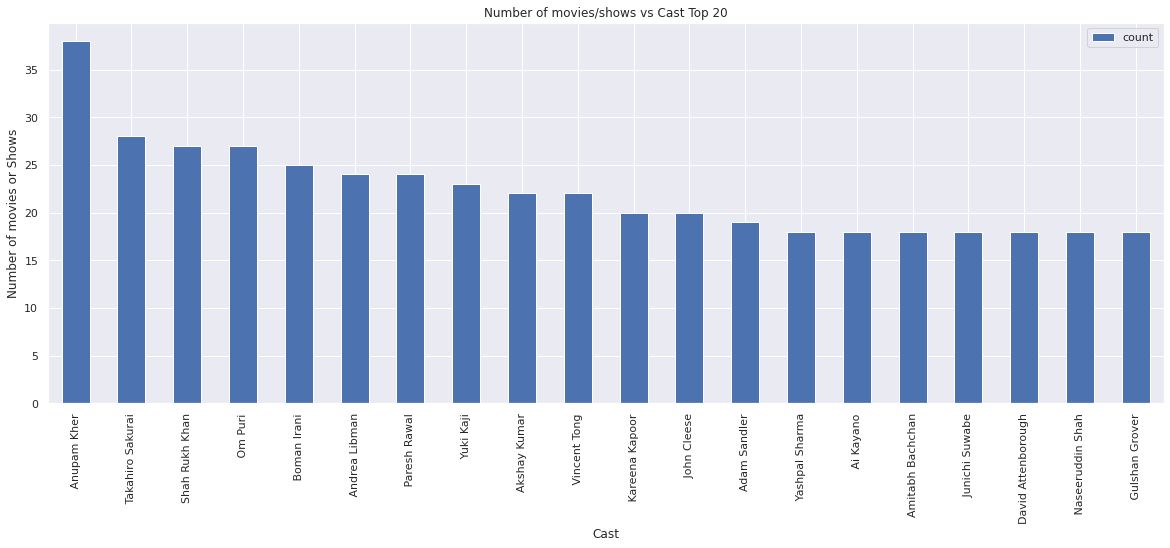

In [106]:
# Creating a DataFrame for cast for plotting & plotting the top 20 cast who are in max number of movies or shows.
cast_df = pd.DataFrame.from_dict(casts, orient='index', columns=['count'])
cast_df.sort_values('count', ascending=False).head(20).plot(kind = 'bar', figsize = (20,7))
plt.xlabel("Cast")
plt.ylabel("Number of movies or Shows")
plt.title("Number of movies/shows vs Cast Top 20")
plt.show()

Anupam Kher has acted in most of the Movies/TV shows.

#### 5. country

In [107]:
#Extracting the country names from the dataset foor plotting countplot.
countries = {}
tv_count = []
movie_count = []
row_list = []
for m in range(0,len(nf_df)):
  split = nf_df['country'][m].split(",")
  for k in split:
    if k.strip() != 'Unknown':
      row_list.append(k.strip())
      if nf_df['type'][m] == 'TV Show':
        tv_count.append(k.strip())
      if nf_df['type'][m] == 'Movie':
        movie_count.append(k.strip())
country_df1 = pd.DataFrame(data = row_list, columns = ['country'])      #For plotting countplot of country

countries['country'] = []
countries['Total Production'] = []
countries['TV Show'] = []
countries['Movie'] = []

for i in row_list:
  if i not in list(countries['country']):
    countries['country'].append(i)
    countries['Total Production'].append(row_list.count(i))
    countries['TV Show'].append(tv_count.count(i))
    countries['Movie'].append(movie_count.count(i))
    
country_df = pd.DataFrame(data = countries)                # For plotting the country wise split of Movie & TV Show
country_df.sort_values('Total Production', ascending=False, inplace = True)
country_df

country  Total Production  TV Show  Movie
3     United States              3291      860   2431
6             India               990       75    915
12   United Kingdom               722      255    467
16           Canada               412      126    286
21           France               349       84    265
..              ...               ...      ...    ...
92            Samoa                 1        0      1
93       Azerbaijan                 1        1      0
94          Bermuda                 1        0      1
95          Ecuador                 1        0      1
117      Montenegro                 1        0      1

[118 rows x 4 columns]

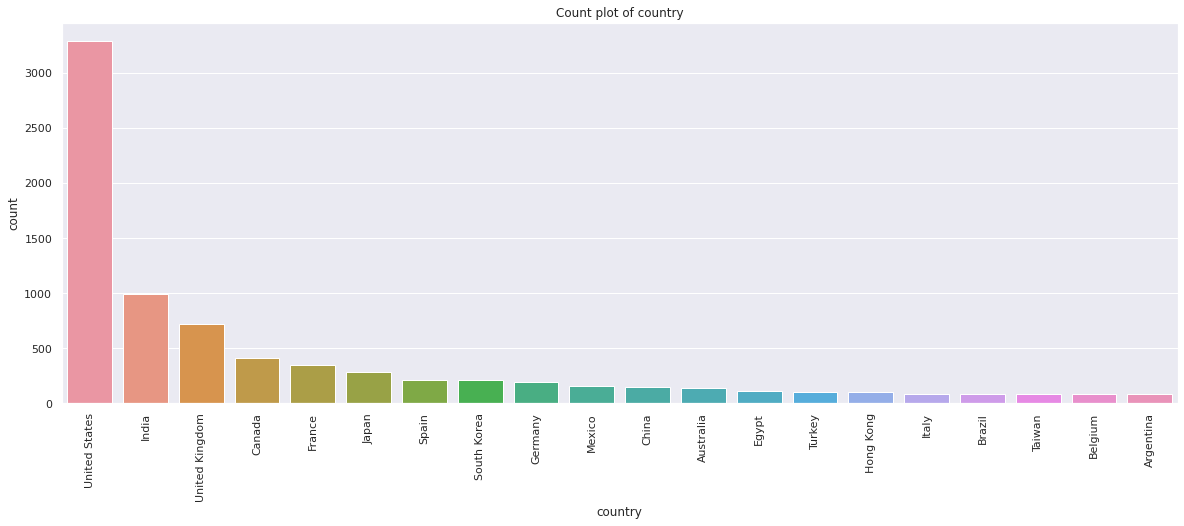

In [108]:
#Count plot for country
count_plot('country', country_df1, country_df1['country'].value_counts().head(20).index)

Above plot shows the top 20 prodcution countries. 

US, India & UK are having the most production.

In [109]:
#Plotting world map for visualizing the total content produced by each country.
sns.set_theme()
country_list_for_plot = list(country_df['country'])
country_list_for_plot.remove("")
tot_production_each_country = list(country_df[country_df['country'] != ""]['Total Production'])
trace = map.Choropleth(
            locations = country_list_for_plot,
            locationmode='country names',
            z = tot_production_each_country,
            text = country_df['country'],
            reversescale = False,
            zauto = True,
            colorscale = 'teal',
            marker = dict(
                line = dict(
                    color = 'rgb(90,90,90)',
                    width = 0.5)
            ),
            colorbar = dict(
                title = 'Total Content',
                tickprefix = '')
        )

data = [trace]
layout = map.Layout(
    title = 'Total content per country',
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,
    )
)

fig = map.Figure(data=data, layout=layout)
fig.show()

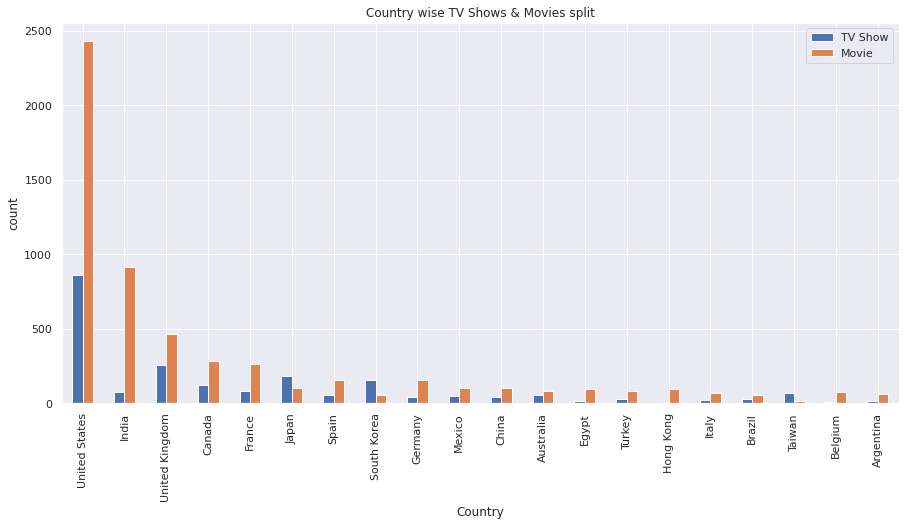

In [110]:
#Plotting country wise split of Movie & TV Show
country_df.head(20).plot(x = 'country', y = ['TV Show', 'Movie'], kind = 'bar', figsize = (15,7))
plt.xlabel('Country')
plt.ylabel('count')
plt.title('Country wise TV Shows & Movies split')
plt.show()

* For most of the countries TV Show production are lesser than Movies. 
* But we can see in Japan, South Korea, Taiwan TV Shows are more produced as compared to Movies. Animes are very famous in those countries.

#### 6.release_year

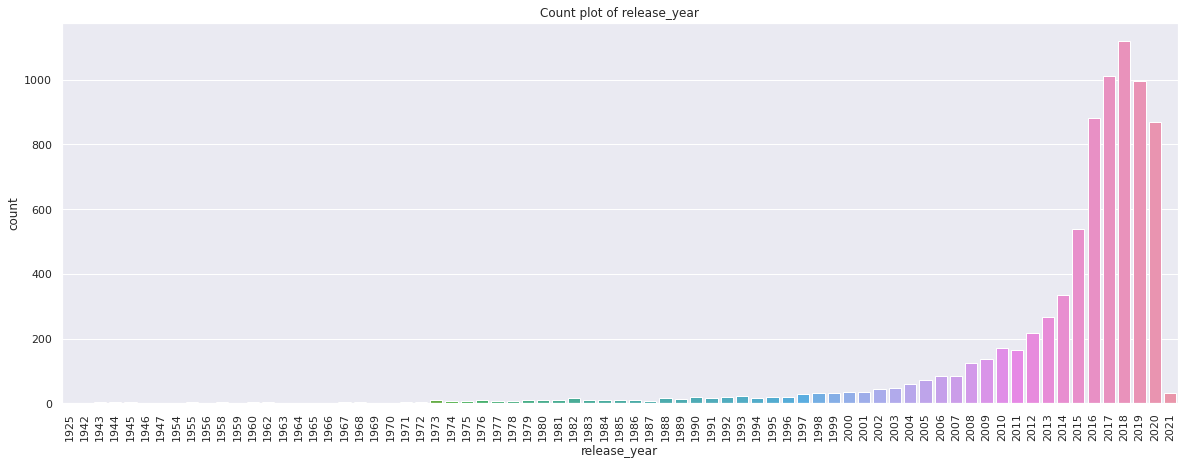

In [111]:
#Count plot for release year
count_plot('release_year', nf_df)

We can see that there is a sudden rise in the number of TV shows and Movies from year 2010.

In [112]:
#Code to plot the release year wise split of Movies and TV Shows
release_yr = {}
tv_count = []
movie_count = []
row_list = []
for m in range(0,len(nf_df)):
  row_list.append(nf_df['release_year'][m])
  if nf_df['type'][m] == 'TV Show':
    tv_count.append(nf_df['release_year'][m])
  if nf_df['type'][m] == 'Movie':
    movie_count.append(nf_df['release_year'][m])

release_yr['release_yr'] = []
release_yr['Total Released'] = []
release_yr['TV Show'] = []
release_yr['Movie'] = []

for i in row_list:
  if i not in list(release_yr['release_yr']):
    release_yr['release_yr'].append(i)
    release_yr['Total Released'].append(row_list.count(i))
    release_yr['TV Show'].append(tv_count.count(i))
    release_yr['Movie'].append(movie_count.count(i))
    
released_yr = pd.DataFrame(data = release_yr)                # For plotting the release year split of Movie & TV Show
released_yr.sort_values('release_yr', inplace = True)
released_yr

release_yr  Total Released  TV Show  Movie
61        1925               1        1      0
62        1942               2        0      2
72        1943               3        0      3
69        1944               3        0      3
58        1945               3        0      3
..         ...             ...      ...    ...
7         2017            1012      268    744
8         2018            1120      386    734
5         2019             996      414    582
0         2020             868      457    411
44        2021              31       19     12

[73 rows x 4 columns]

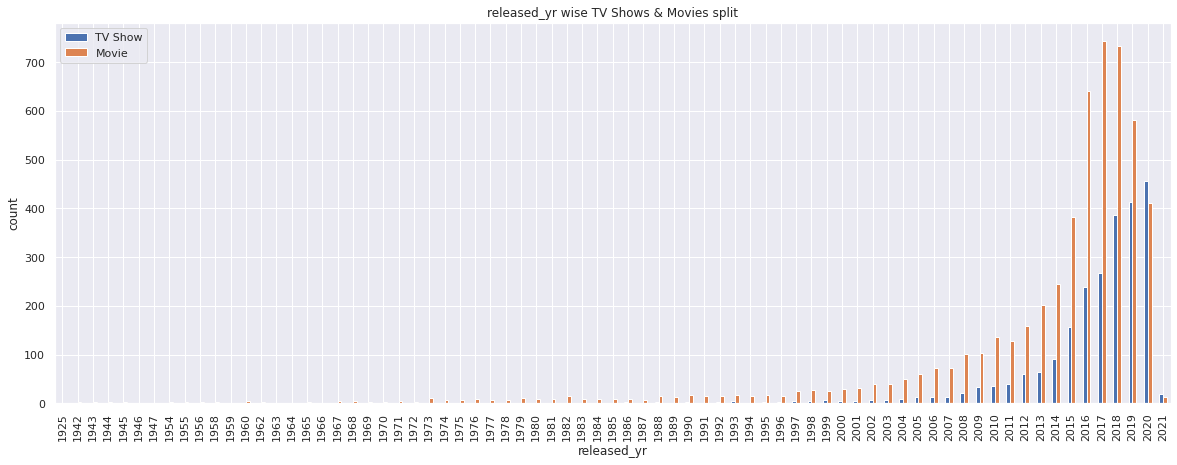

In [113]:
#Plotting release year wise split of Movie & TV Show
released_yr.plot(x = 'release_yr', y = ['TV Show', 'Movie'], kind = 'bar', figsize = (20,7))
plt.xlabel('released_yr')
plt.ylabel('count')
plt.title('released_yr wise TV Shows & Movies split')
plt.show()

There is an increase in both number of TV Shows and Movies.

In 2020 number of TV Shows were more than number of Movies.

Netflix dataset contains data only up to 16th January 2021, that's why we can see less number of movies and TV shows in year 2021.

#### 7. rating

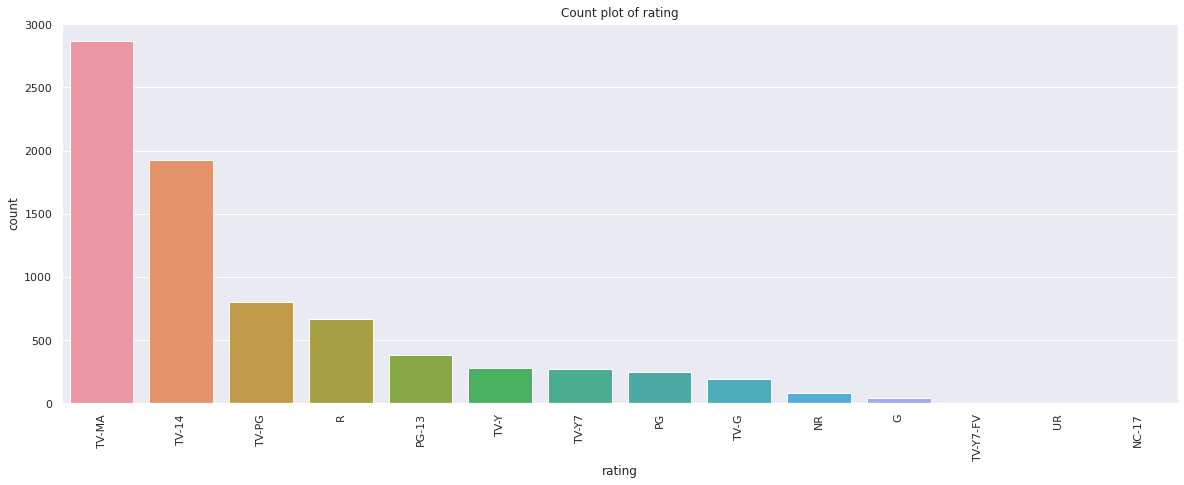

In [114]:
#Count plot for rating
count_plot('rating', nf_df, nf_df['rating'].value_counts().sort_values(ascending=False).index)

The majority of the shows on Netflix are for adults and for children above age 14.

#### 8. duration

We are using Kernel Density Estimate (KDE) plot to plot the distribution of duration for TV Show and Movie. 

Relative to a histogram, KDE can produce a plot that is less cluttered and more interpretable, especially when drawing multiple distributions.

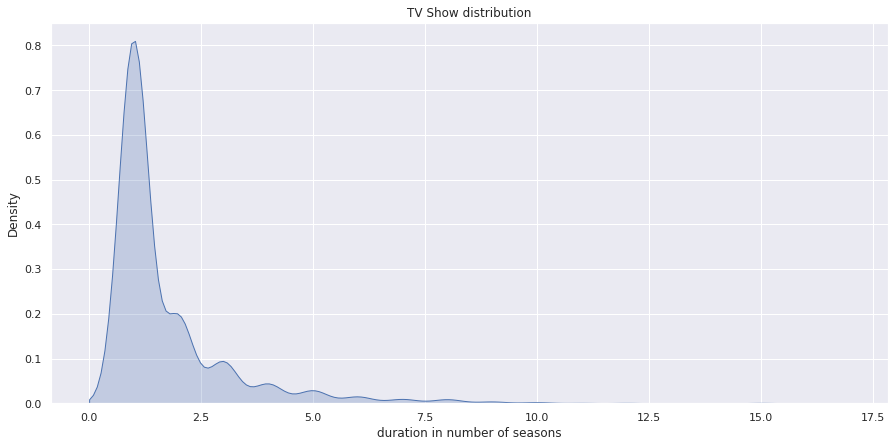

In [115]:
#Plotting distribution for TV Show duration
plt.figure(figsize = (15,7))
plt.title("TV Show distribution")
sns.kdeplot(data=nf_df[nf_df['type'] == 'TV Show']['duration'], shade=True)
plt.xlabel("duration in number of seasons")
plt.show()

* From the above graph we can infer that most of the TV Shows contains 1 - 2 seasons.
* There are some TV shows with 16 seasons.
* There are very few TV Show with more than 7 seasons.

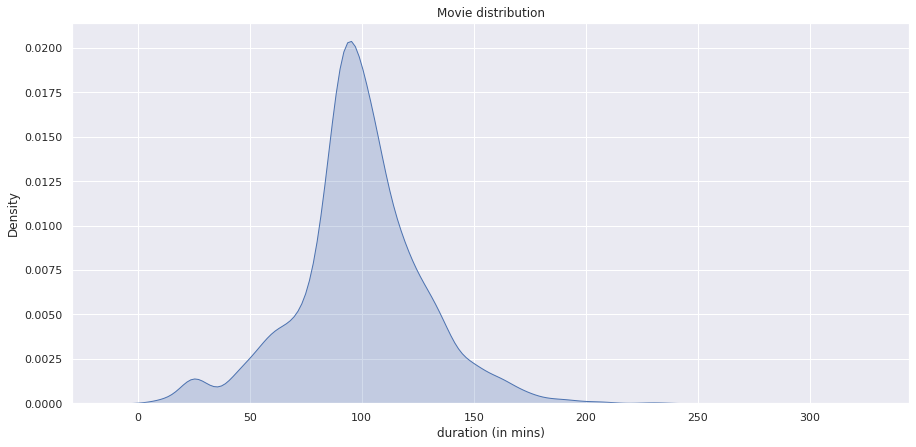

In [116]:
#Plotting distribution for Movie duration
plt.figure(figsize = (15,7))
plt.title("Movie distribution")
sns.kdeplot(data=nf_df[nf_df['type'] == 'Movie']['duration'], shade=True)
plt.xlabel('duration (in mins)')
plt.show()

From the above graph we can infer that most of the movies are around 100mins duration.

#### 9. listed_in / Genre

In [117]:
#Making a dictionary with genre as key and number of movies/shows in each genre as values.
genres = {}
genre_name = []
listed_column_splitted = []
for rowg in nf_df['listed_in']:
  genre_name.extend(rowg.split(","))
    
for g in genre_name:
  if g not in list(genres.keys()):
    genres[g.strip()] = genre_name.count(g)

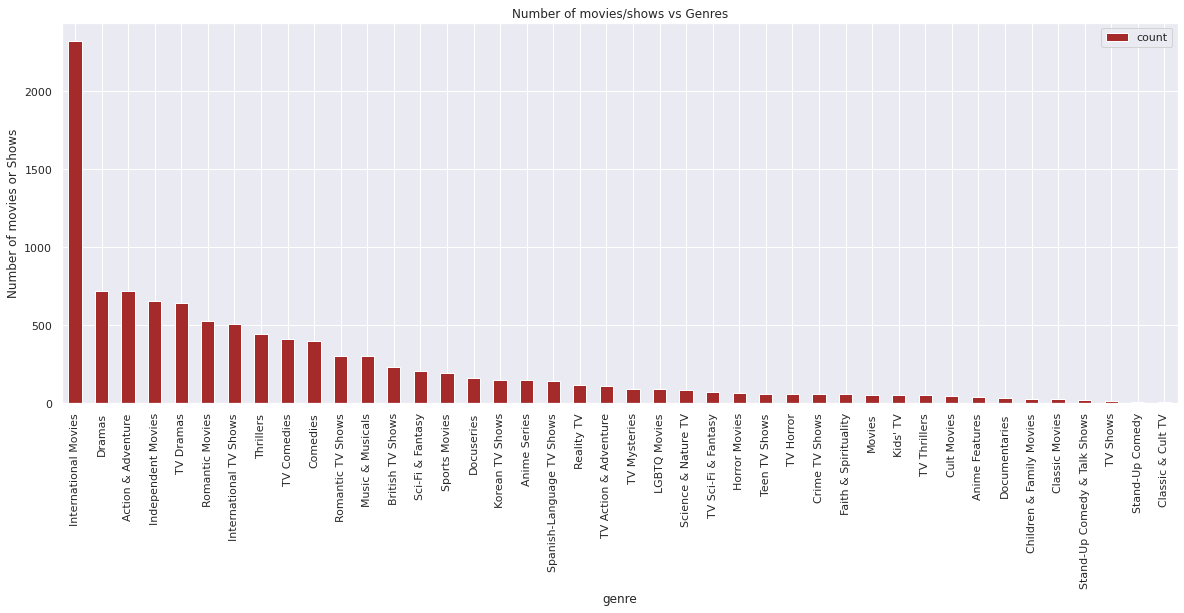

In [118]:
# Creating a DataFrame for cast for plotting & plotting the top 20 cast who are in max number of movies or shows.
genre_df = pd.DataFrame.from_dict(genres, orient='index', columns=['count'])
genre_df.sort_values('count', ascending=False).plot(kind = 'bar', color='brown', figsize = (20,7))
plt.xlabel("genre")
plt.ylabel("Number of movies or Shows")
plt.title("Number of movies/shows vs Genres")
plt.show()

Most of the TV Shows and Movies are from genre International Movies.

#### 10. description

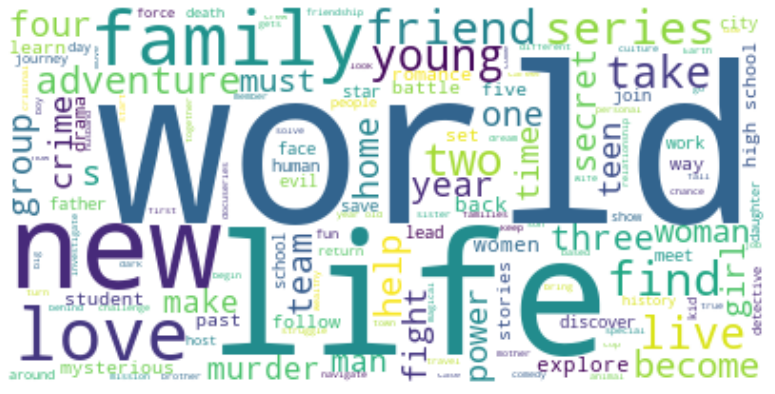

In [119]:
# Visuallizing the wordcloud for description for TV Show
col_word_cloud('description', nf_df[nf_df['type']=='TV Show'])

description of TV Shows contains more words like world, life, family, new, find, love etc. 

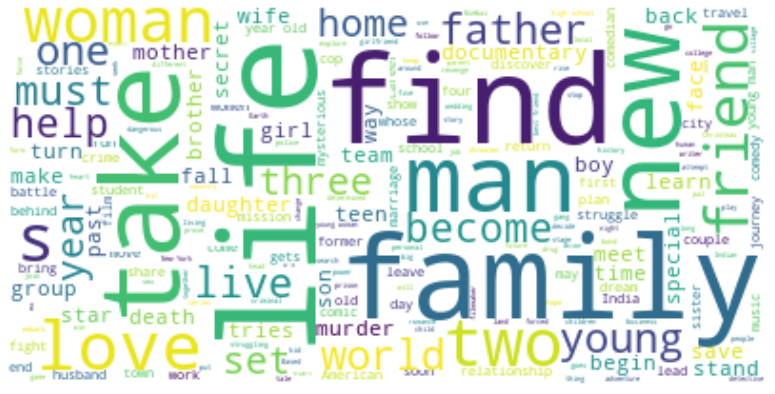

In [120]:
# Visuallizing the wordcloud for description for Movies
col_word_cloud('description', nf_df[nf_df['type']=='Movie'])

description of Movie also contains more words like life, find, family, love etc similar to TV Shows. 

### Bivariate Analysis

#### 1. country wise genre/listed_in distribution

In [121]:
#Extracting data for contry wise genre/listed_in
cg_df = nf_df.copy()
cg_df['country_list'] = cg_df.apply(lambda x: x['country'].split(", "),axis=1)
cg_df = cg_df.explode('country_list')
cg_df['genre_list'] = cg_df.apply(lambda x: x['listed_in'].split(", "),axis=1)
cg_df = cg_df.explode('genre_list')
cg_df
distinct_country = []

#Extracting distinct country name from country feature.
for cont in cg_df['country_list']:
  if cont.replace(",","") not in distinct_country:
    distinct_country.append(cont)

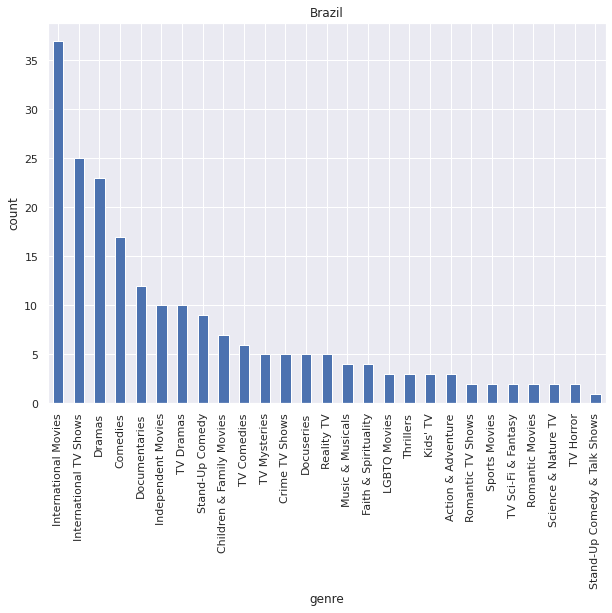

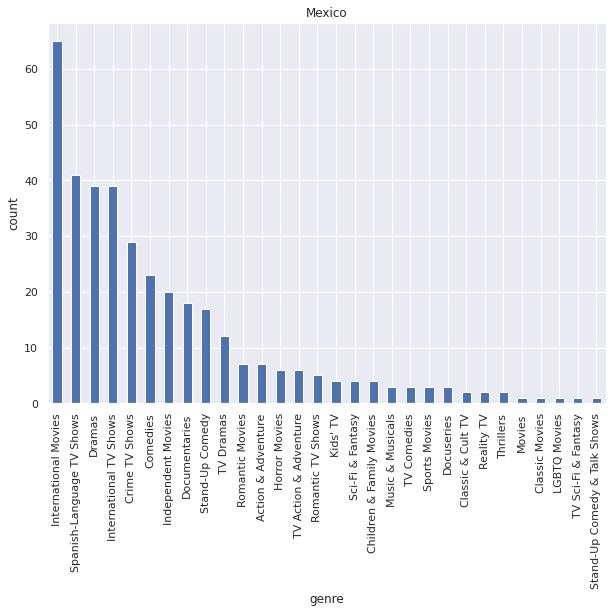

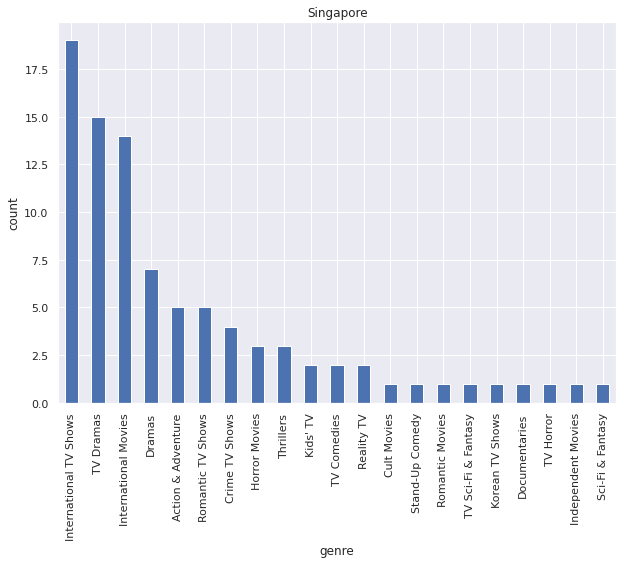

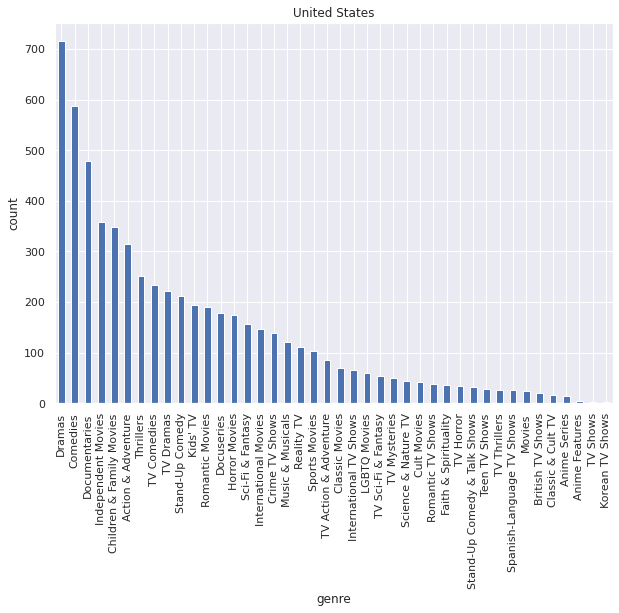

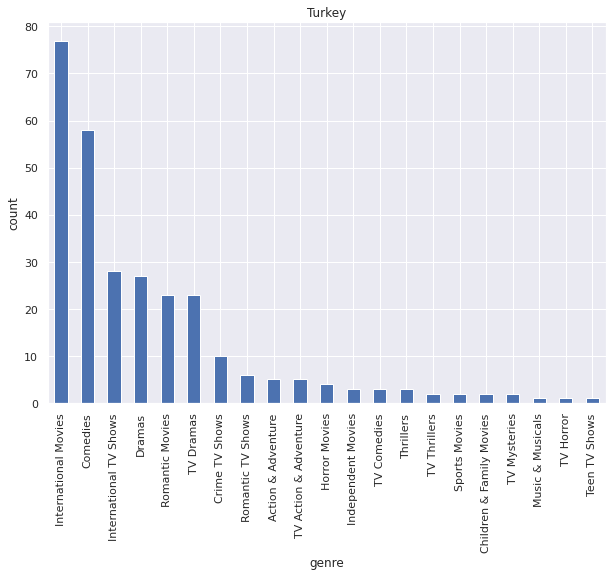

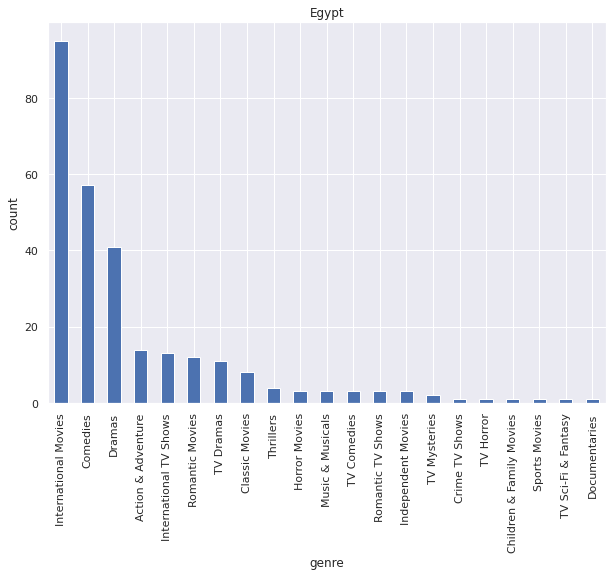

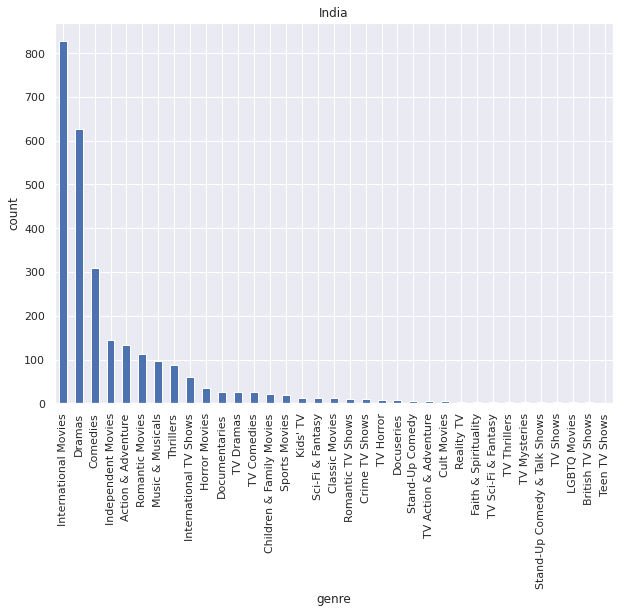

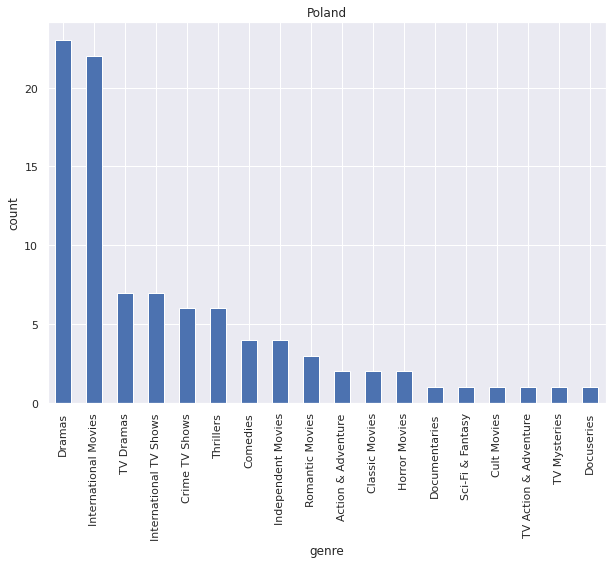

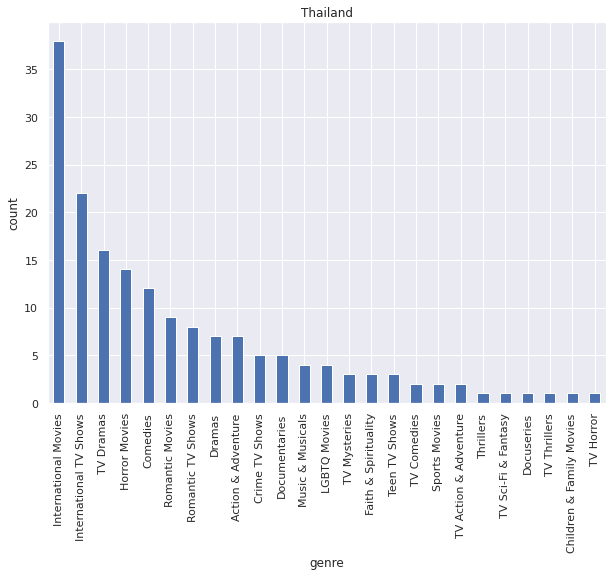

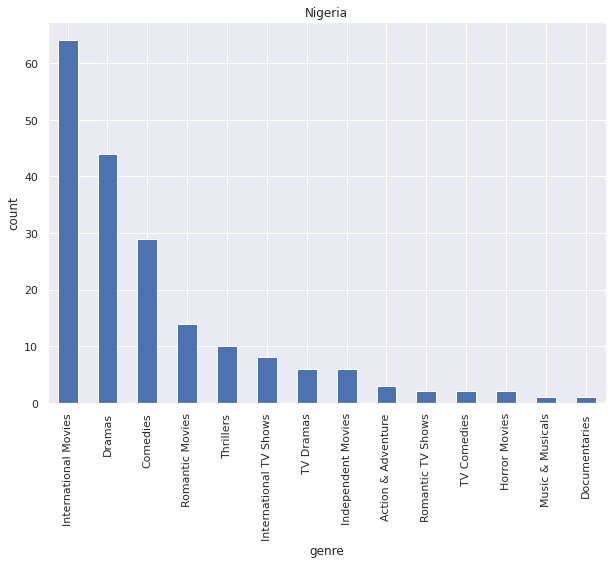

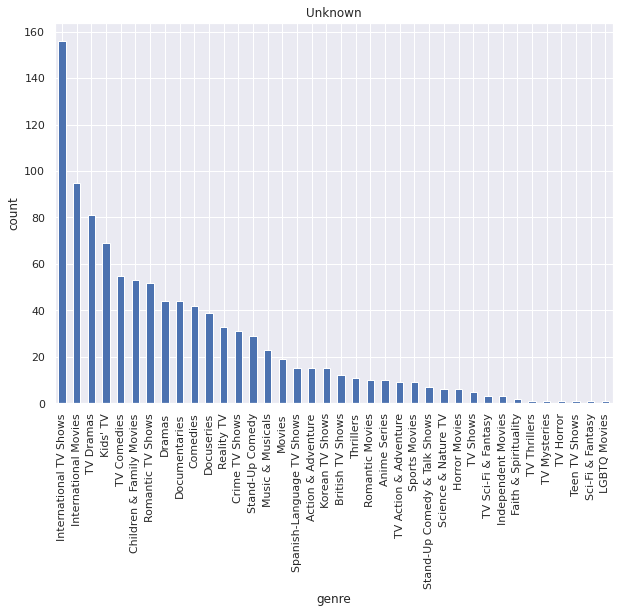

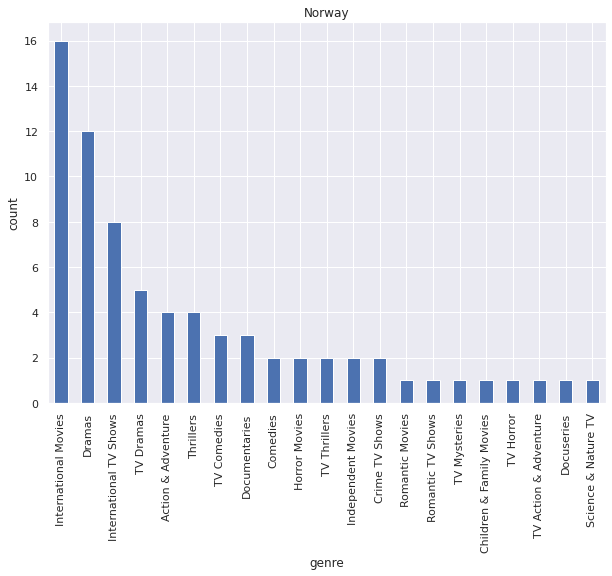

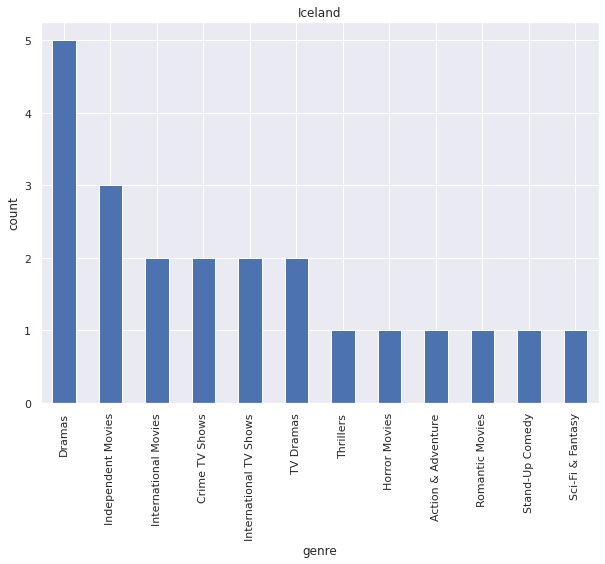

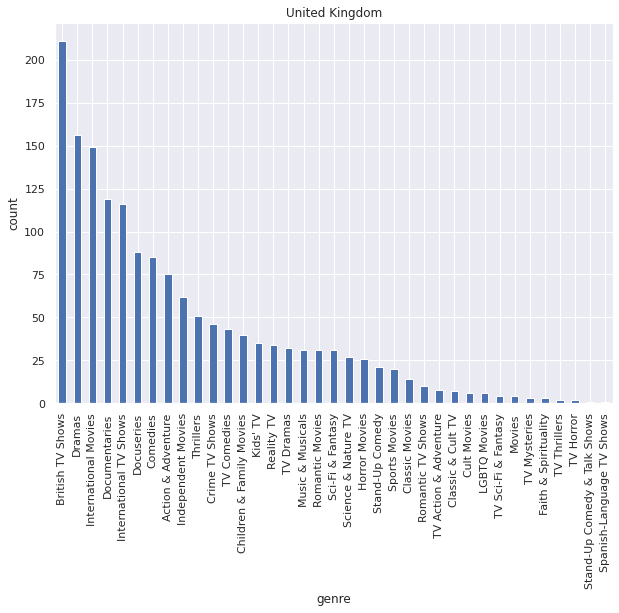

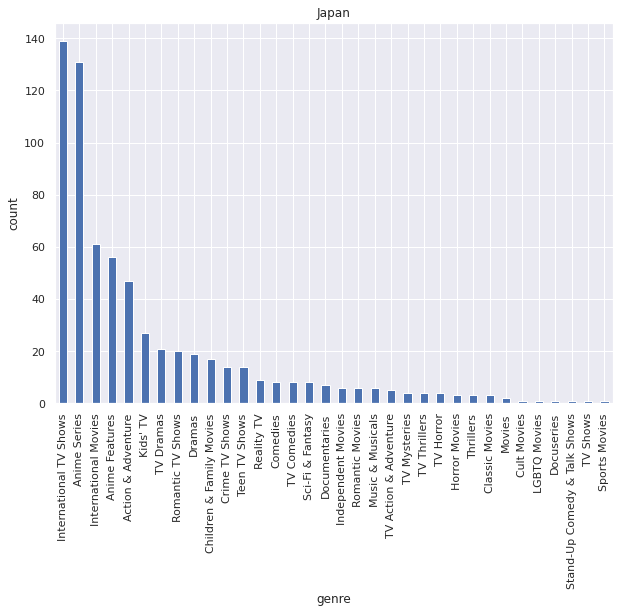

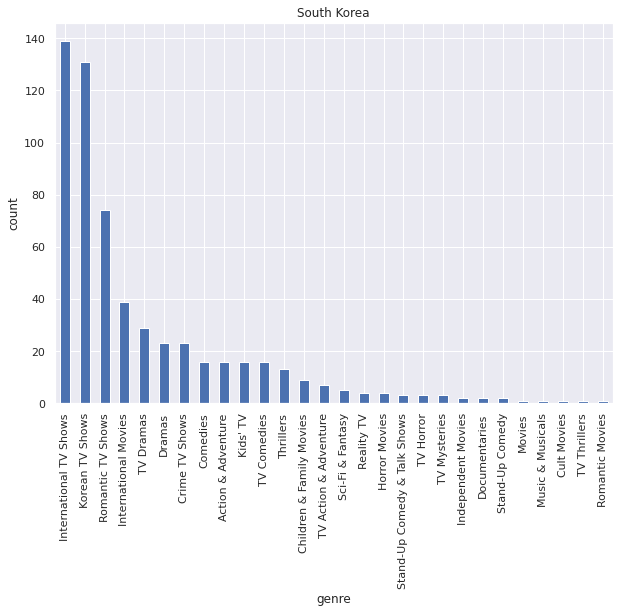

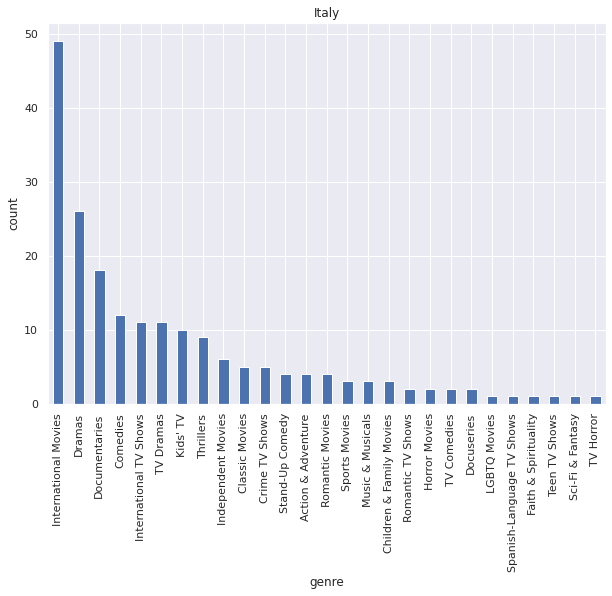

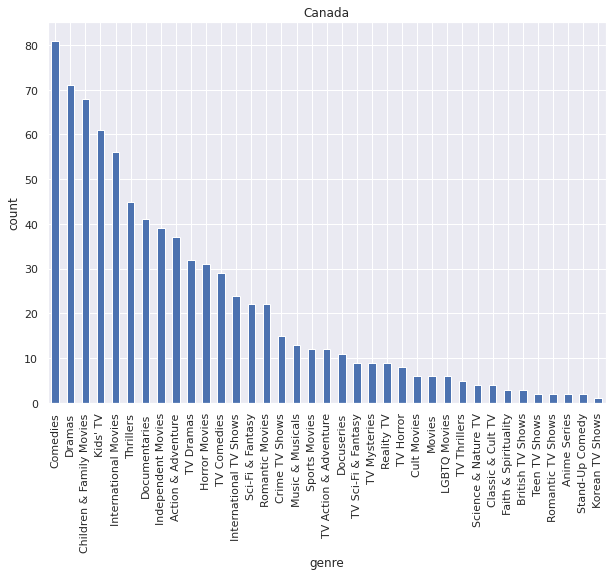

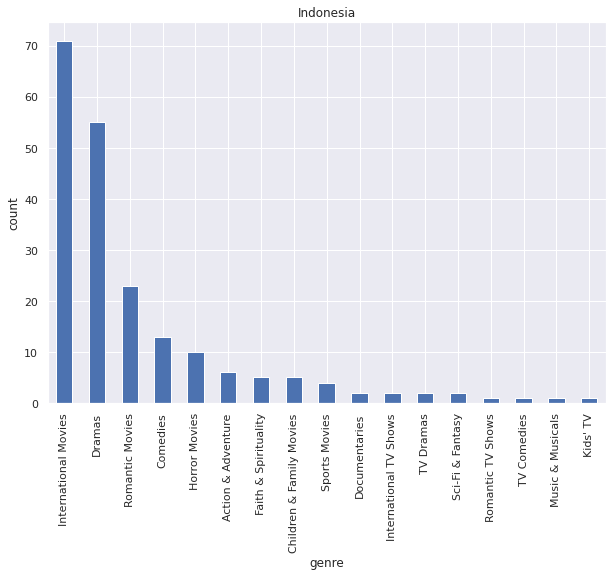

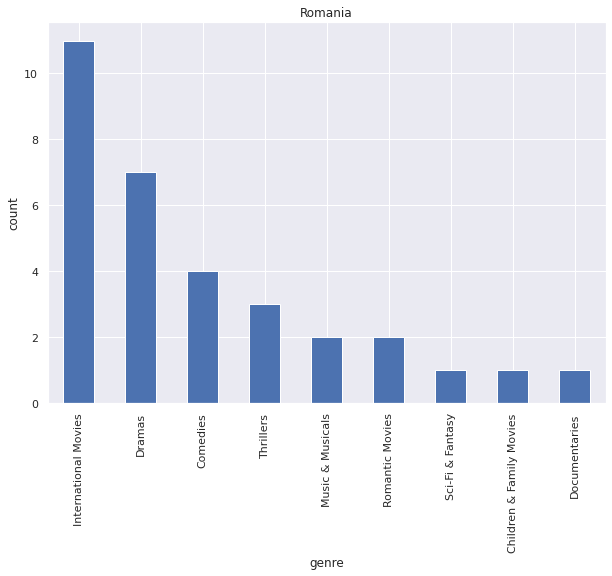

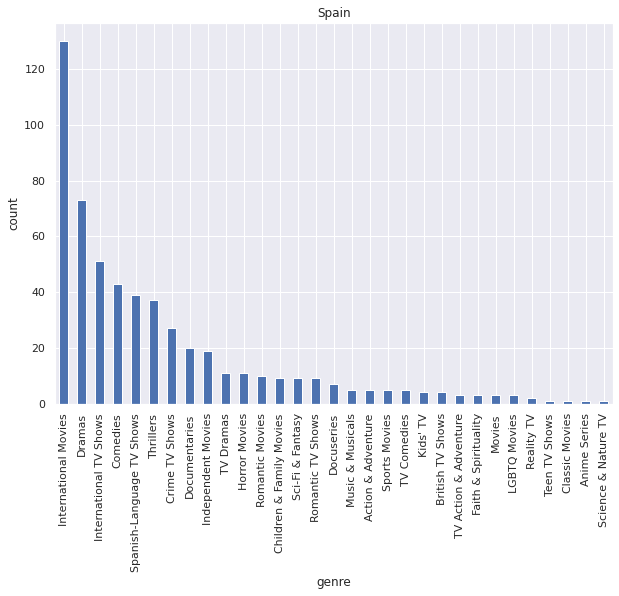

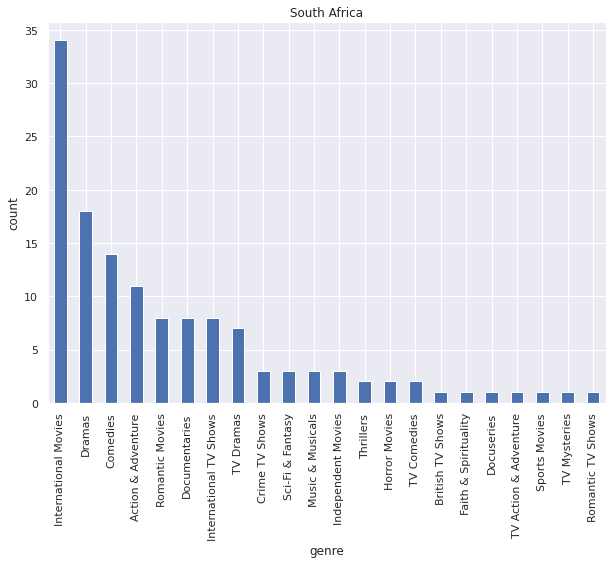

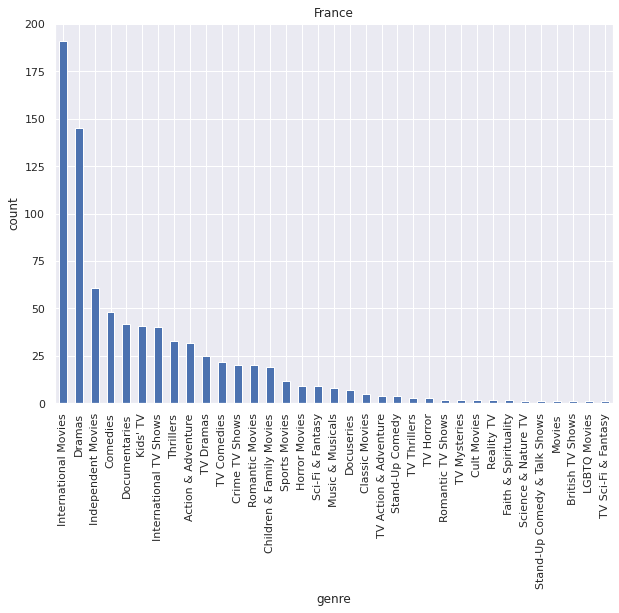

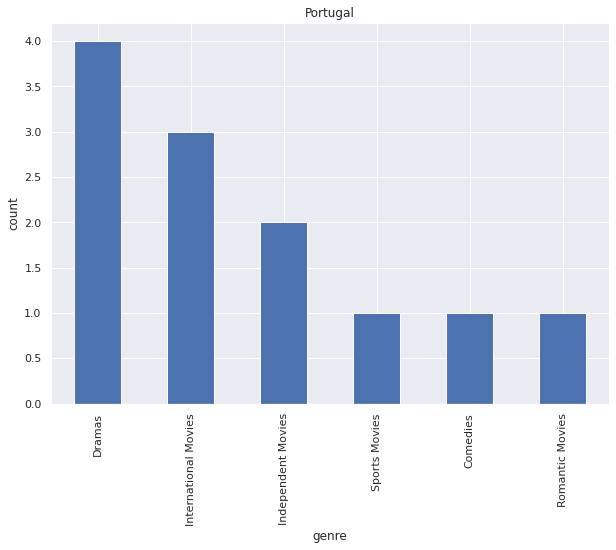

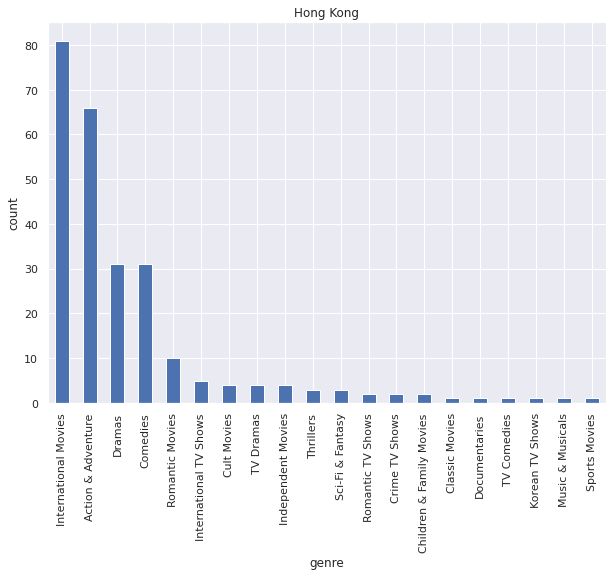

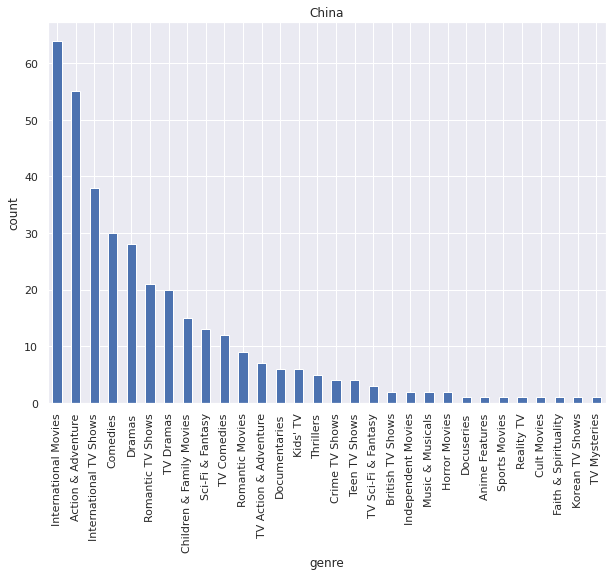

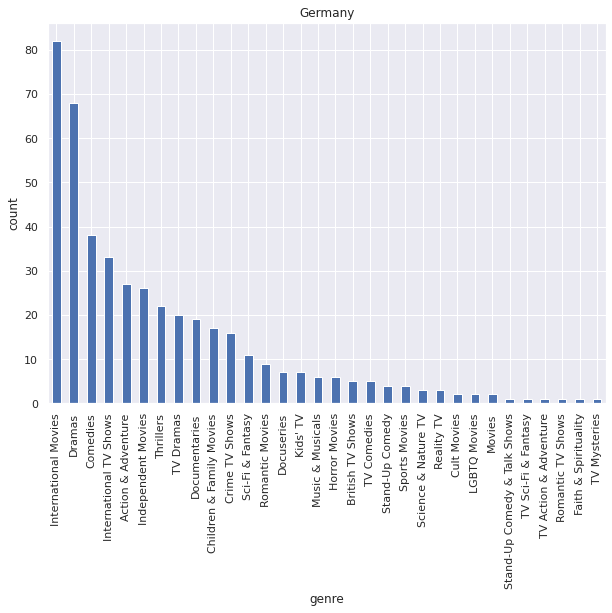

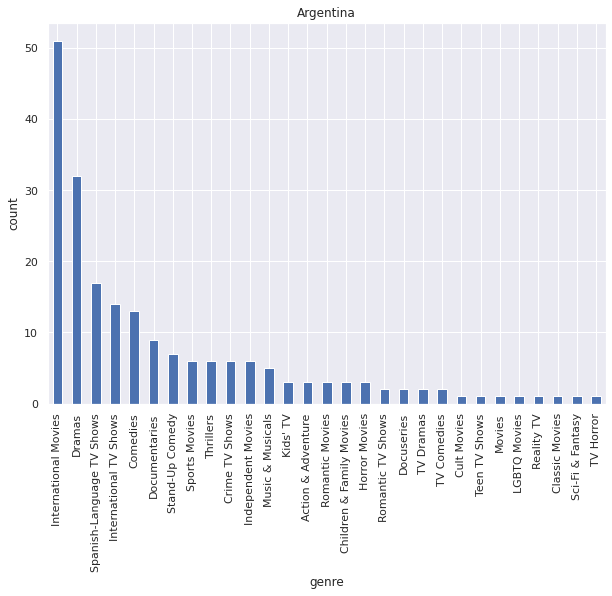

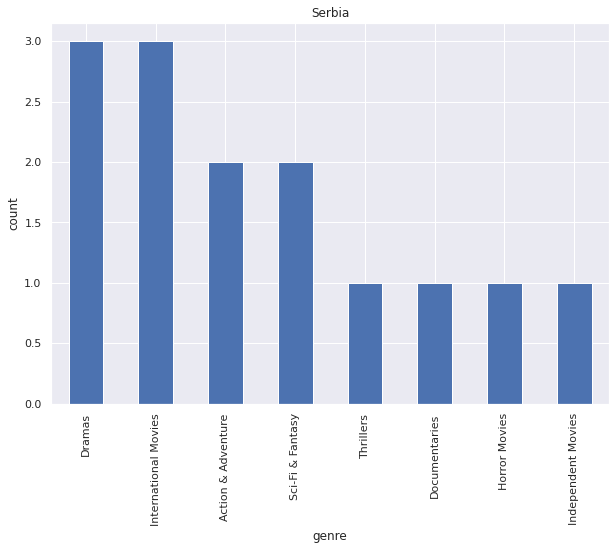

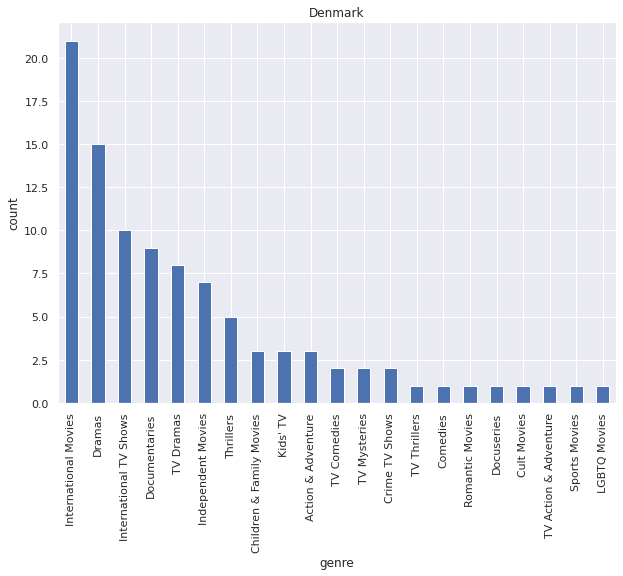

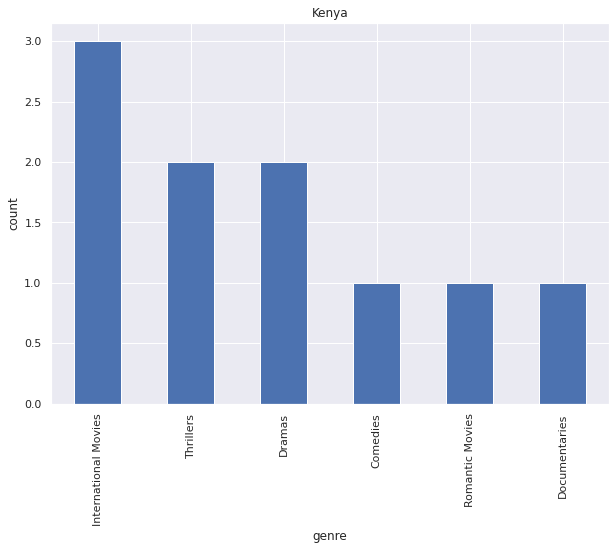

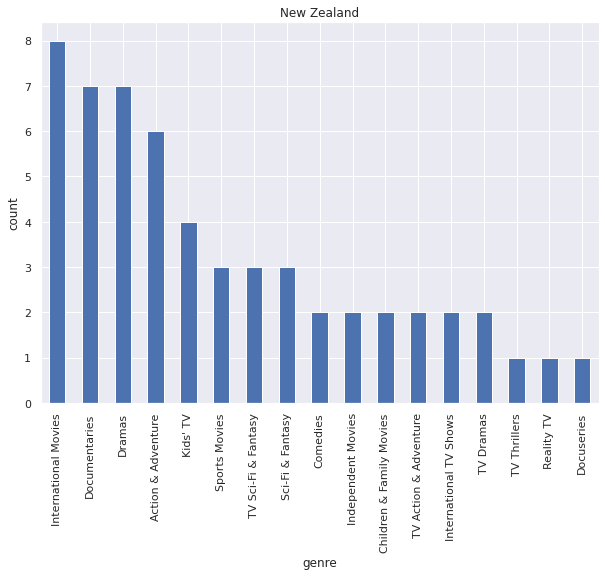

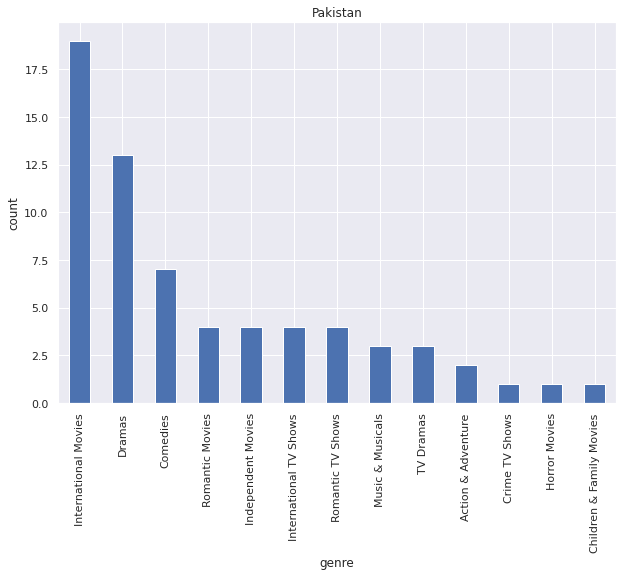

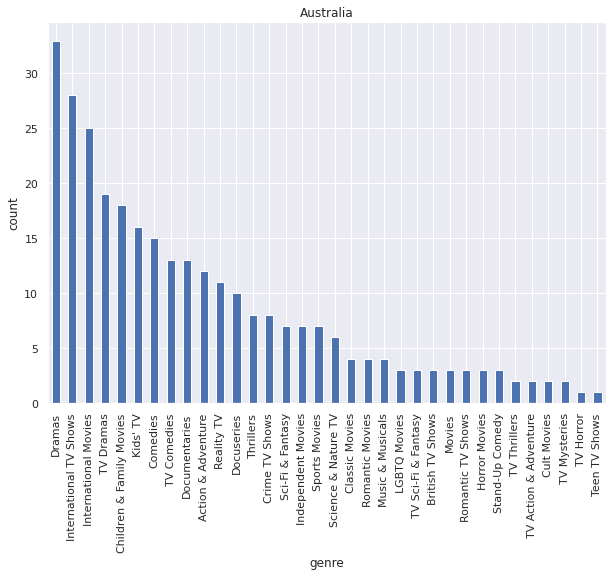

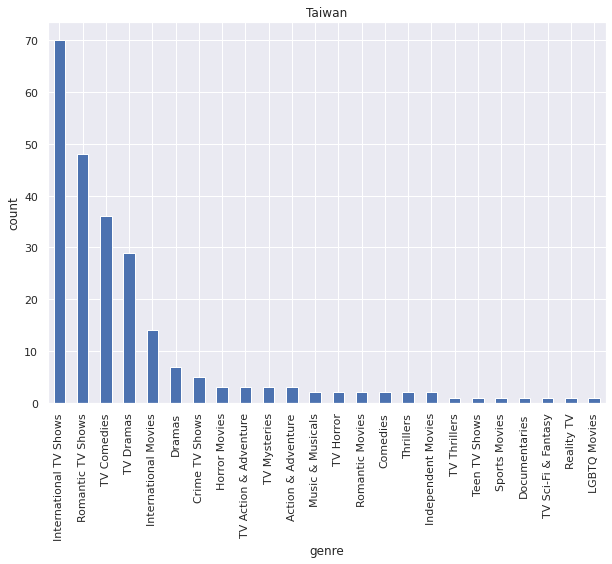

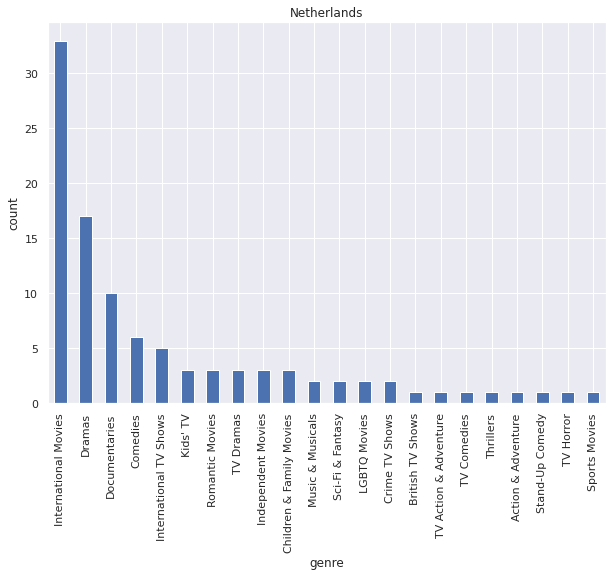

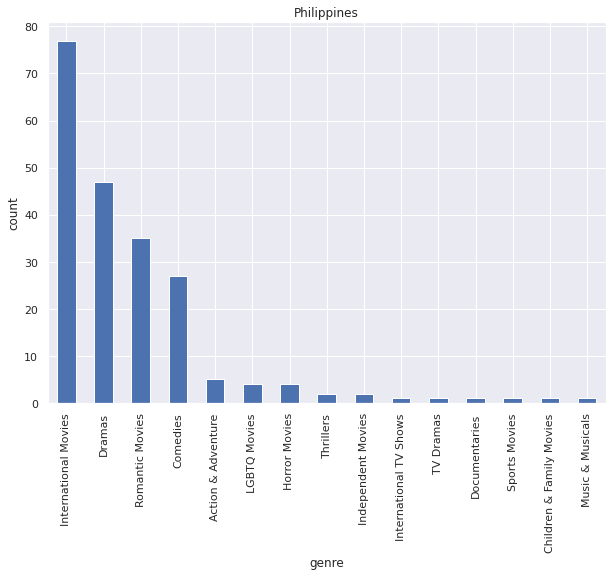

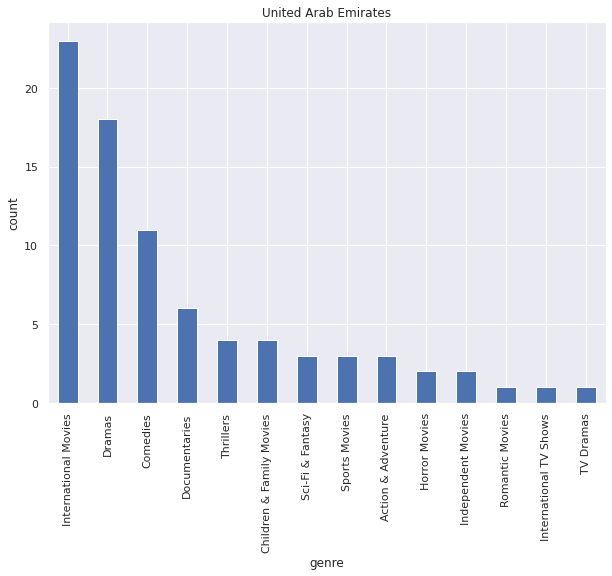

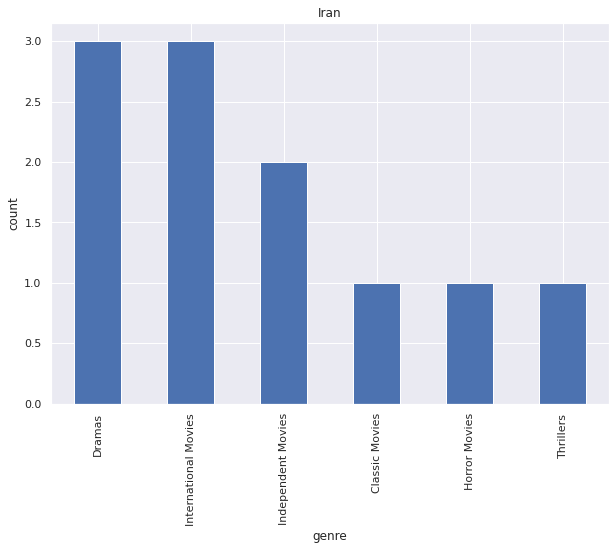

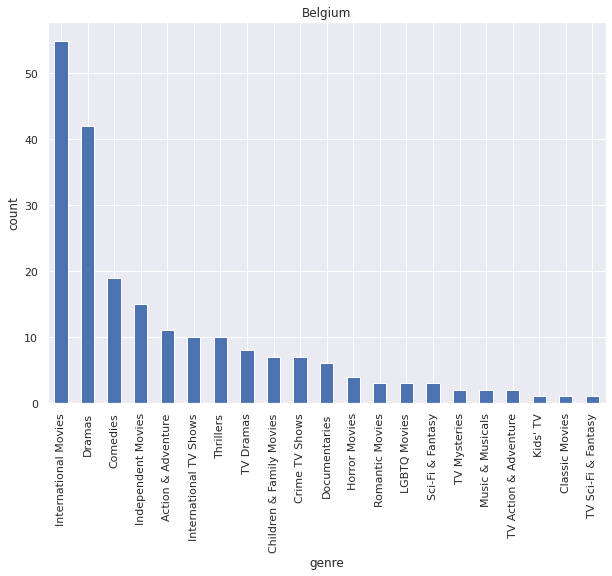

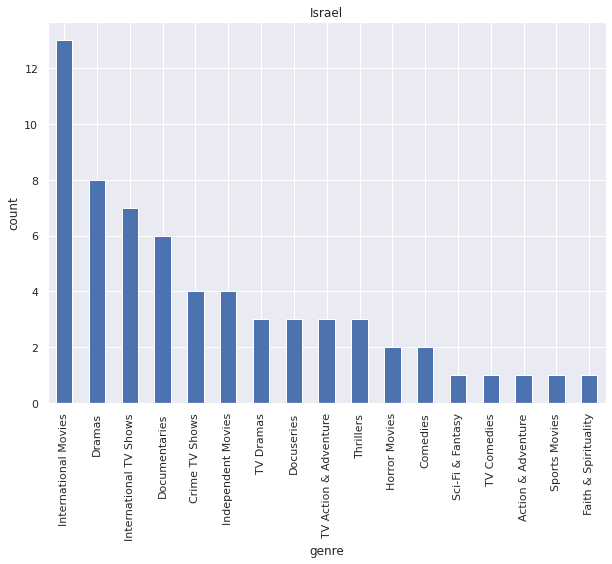

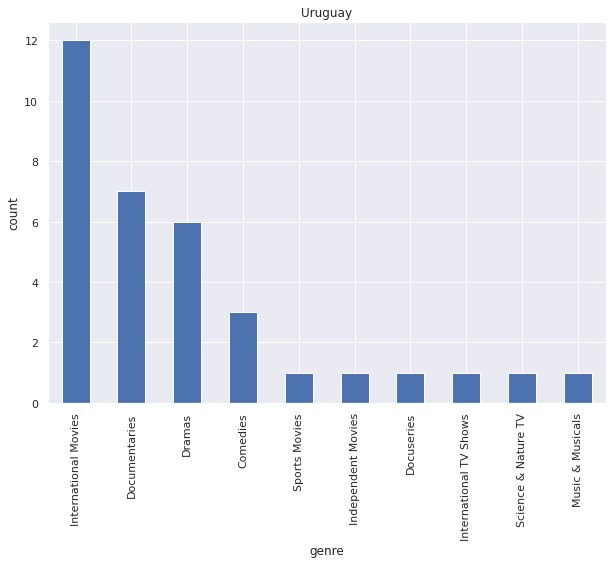

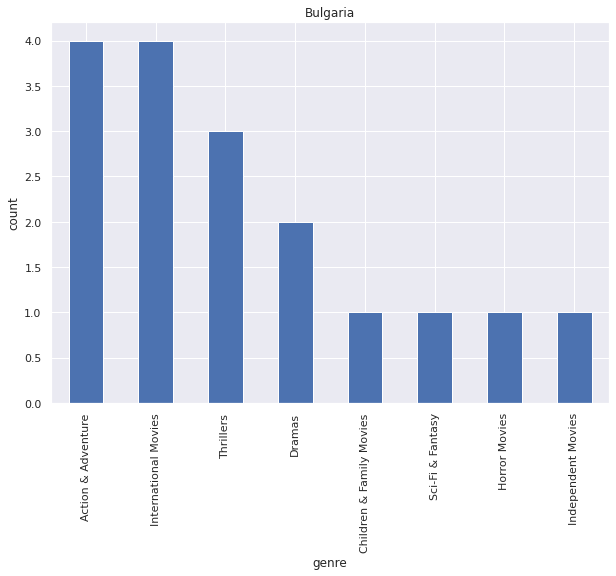

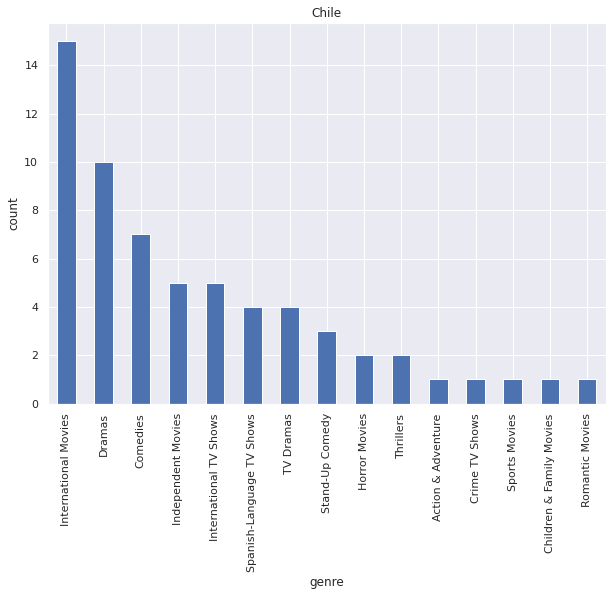

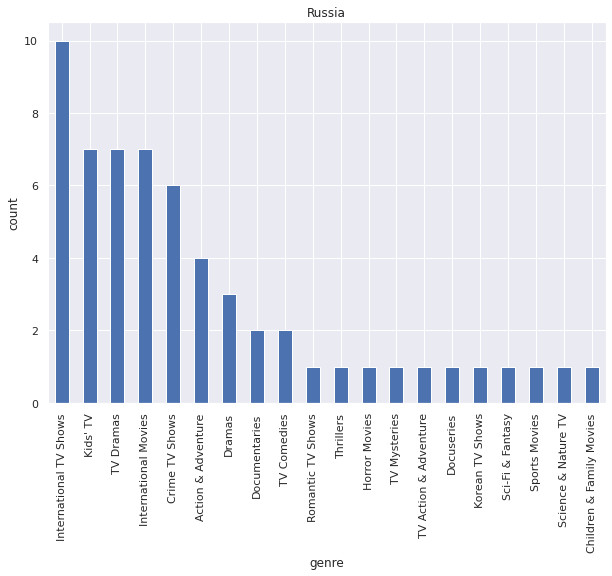

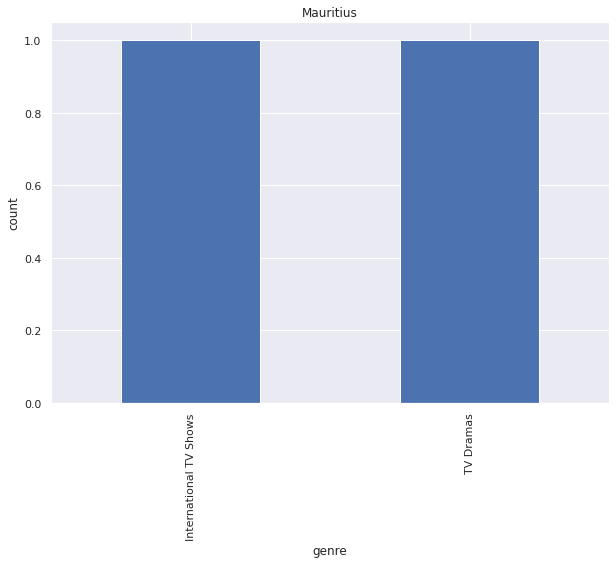

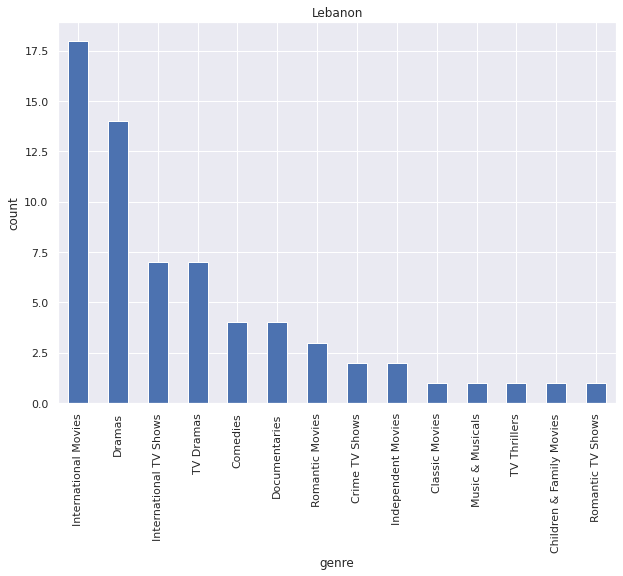

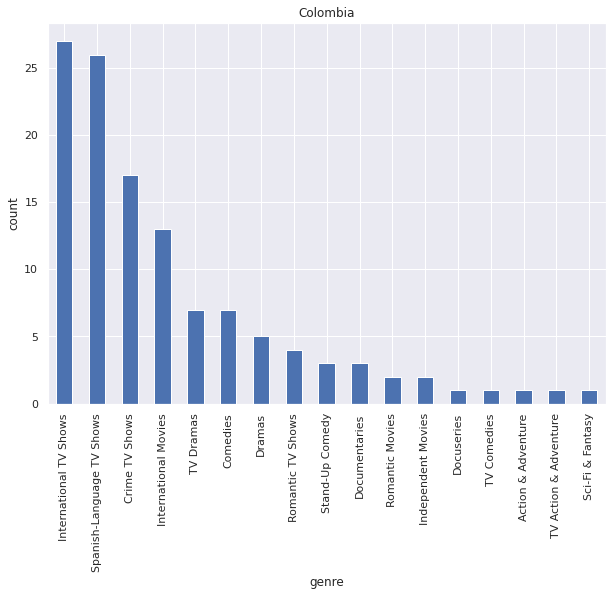

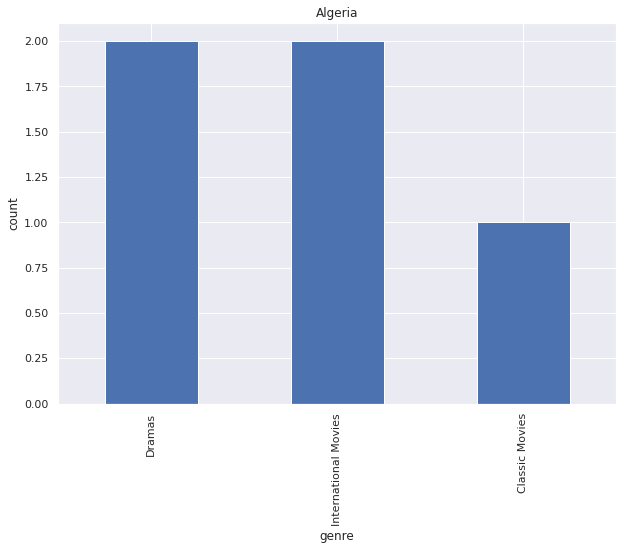

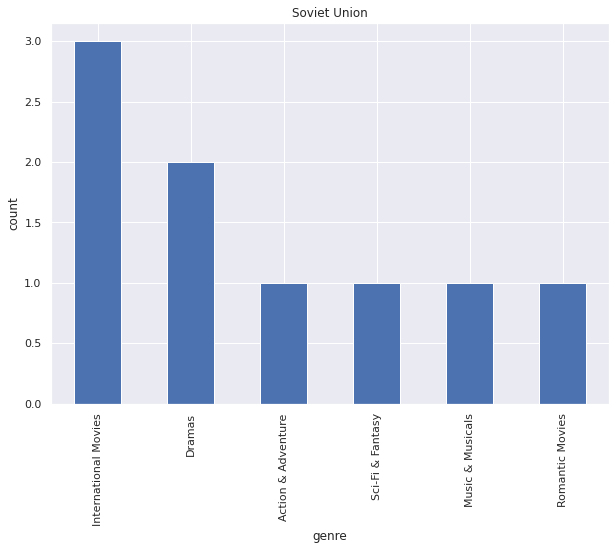

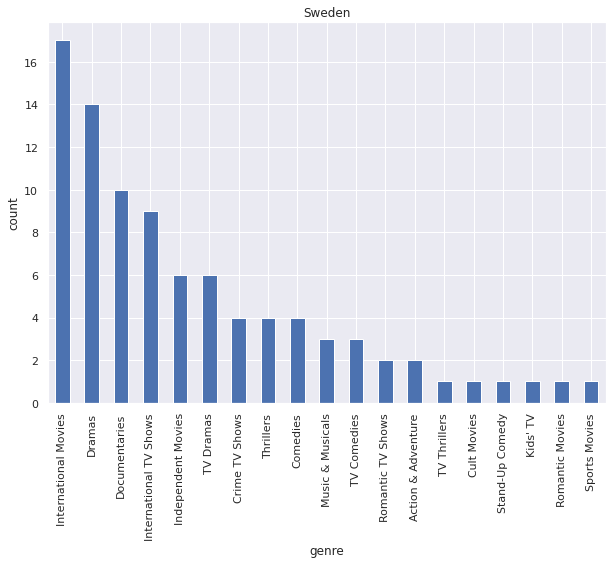

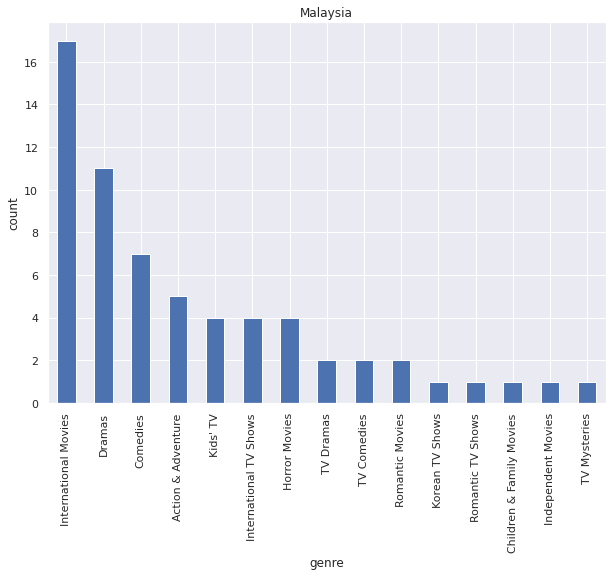

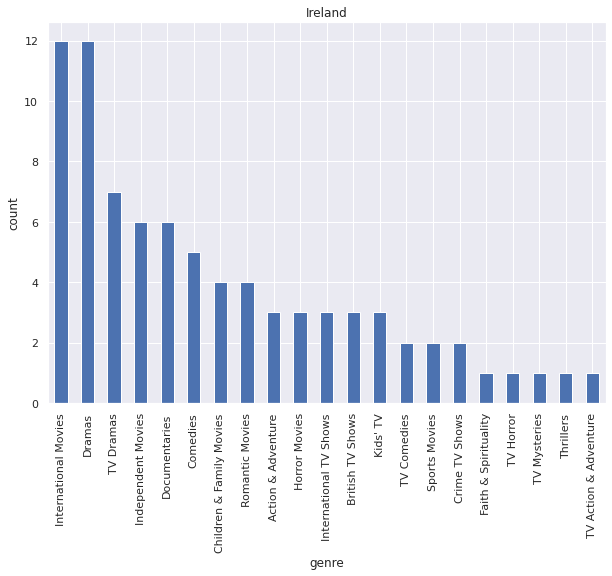

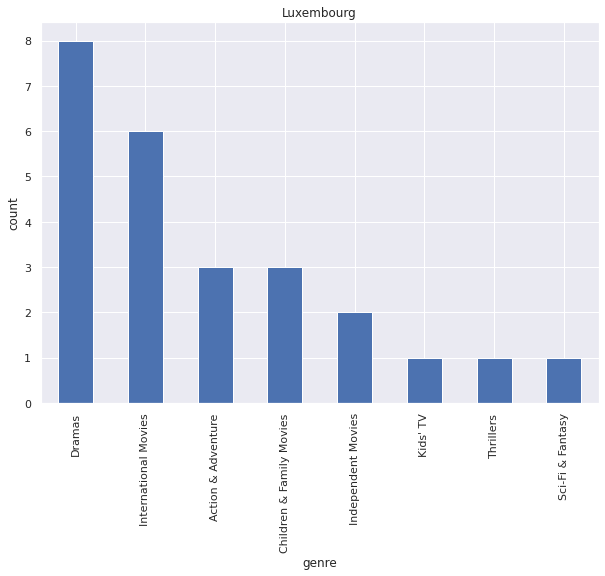

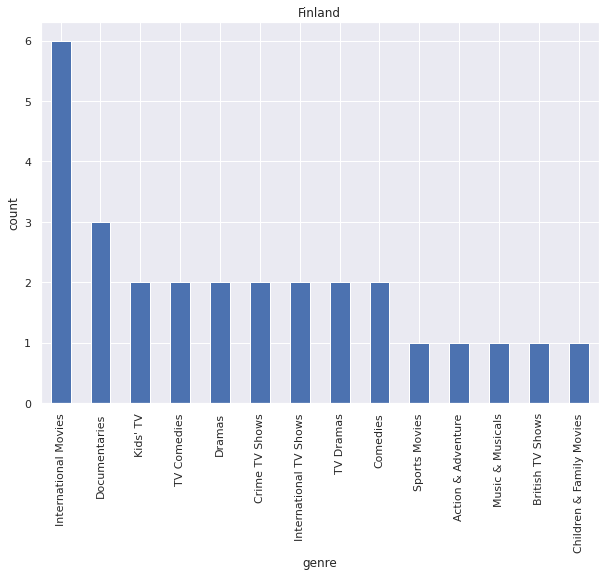

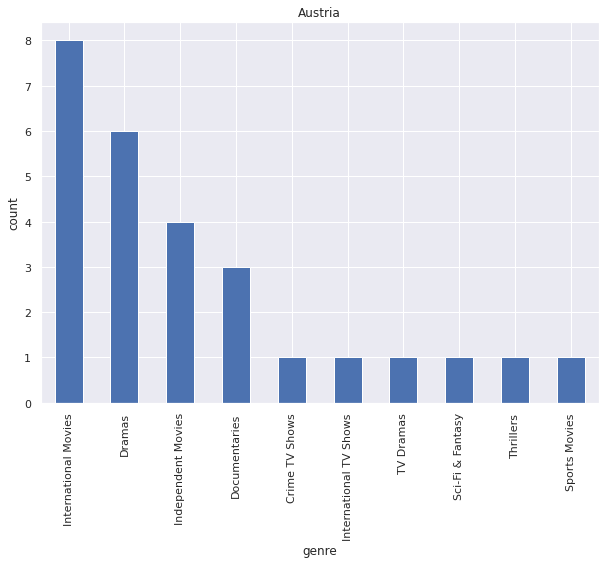

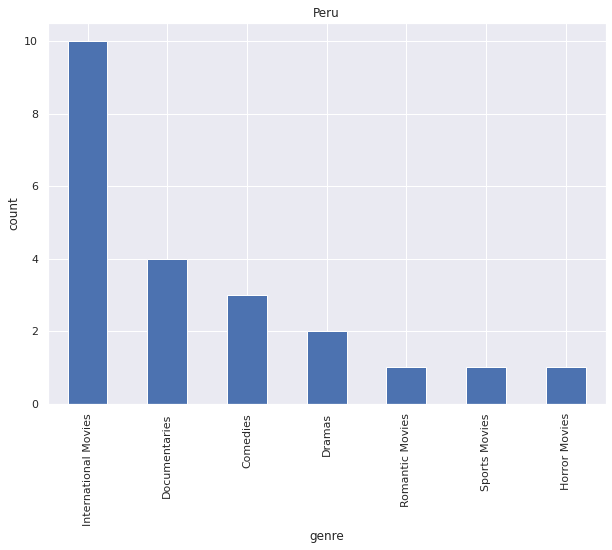

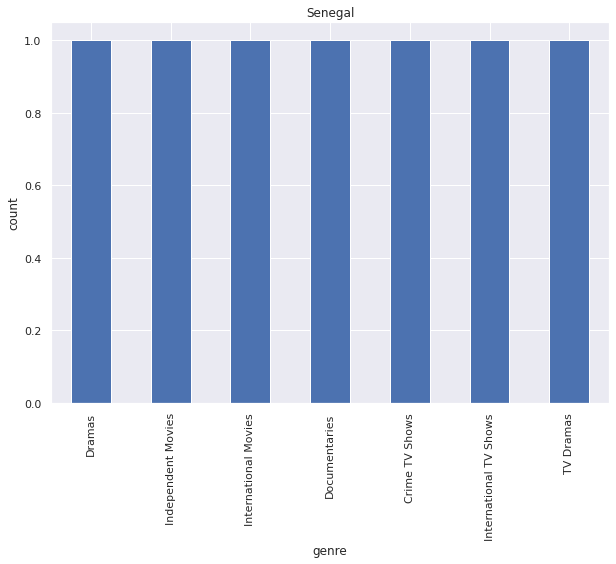

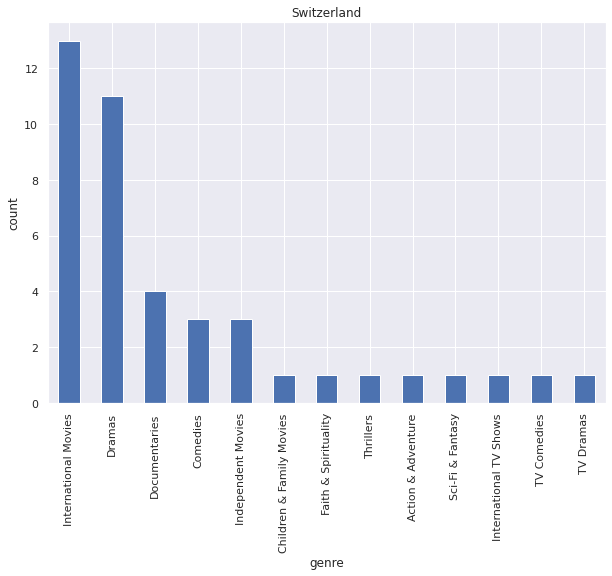

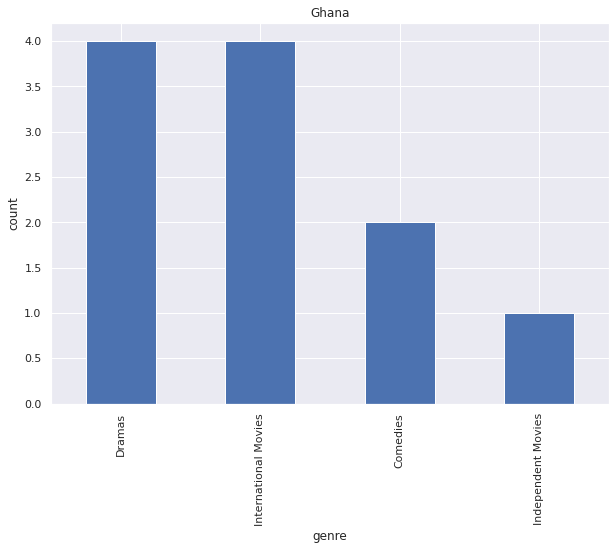

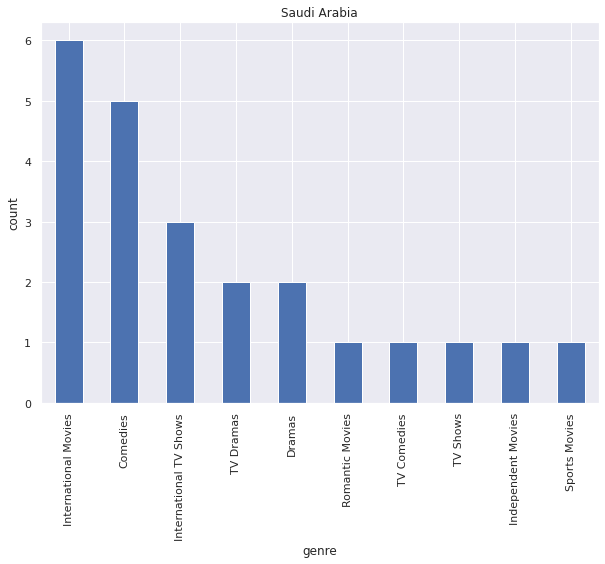

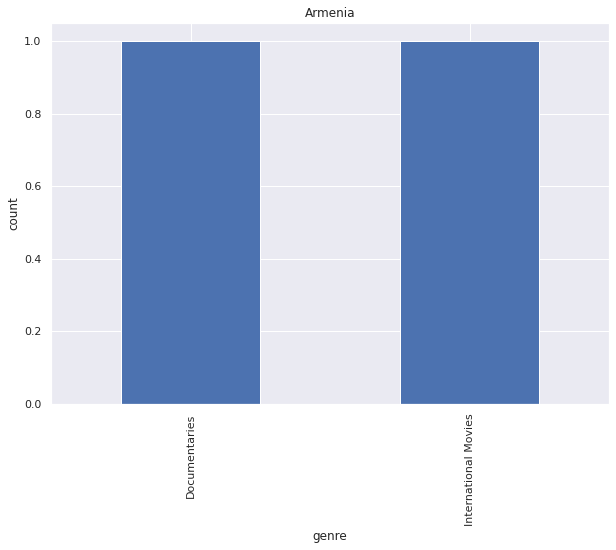

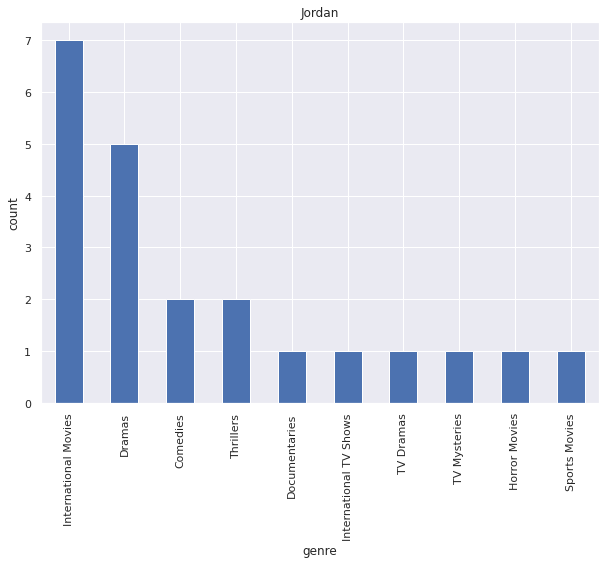

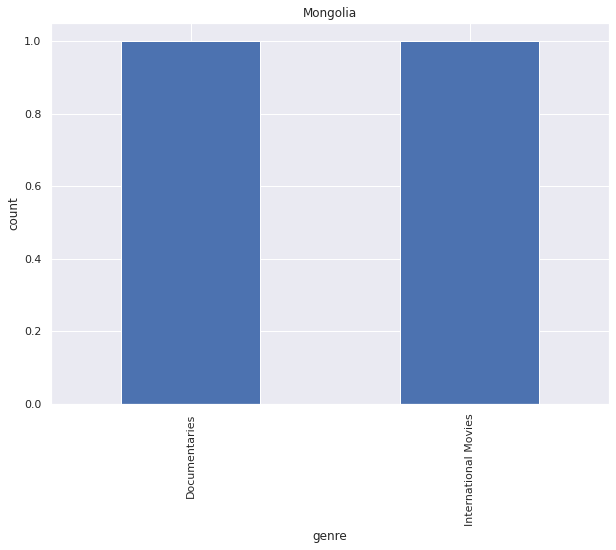

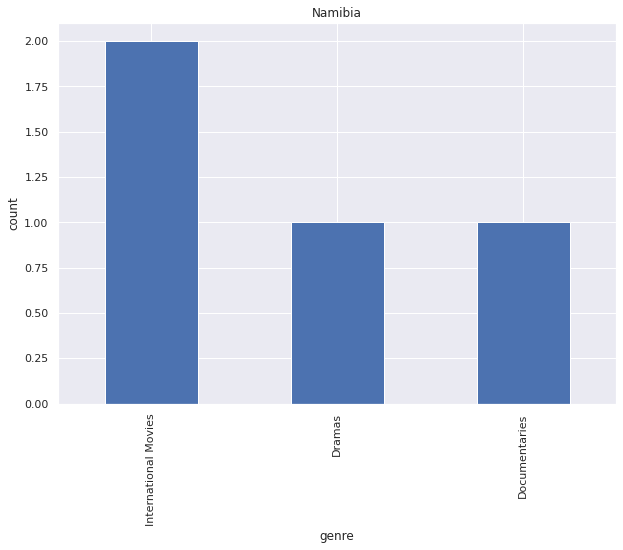

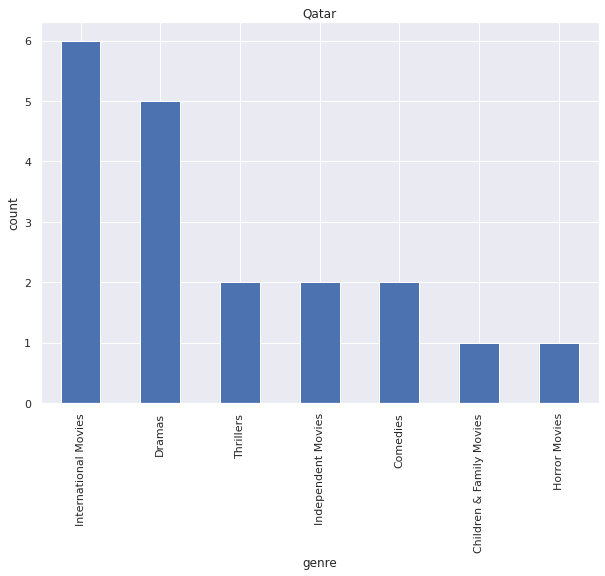

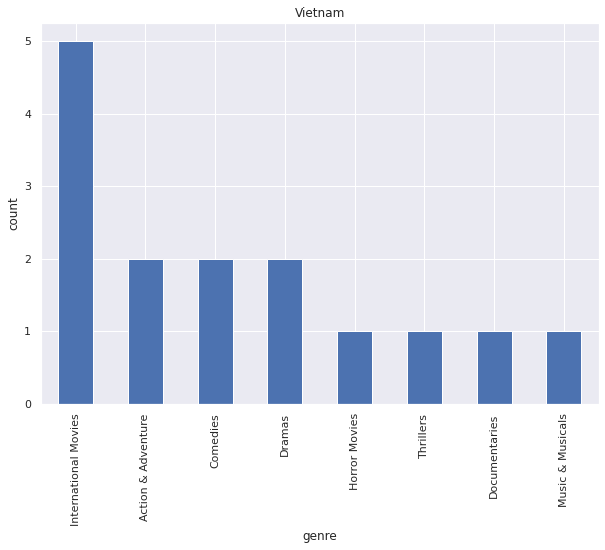

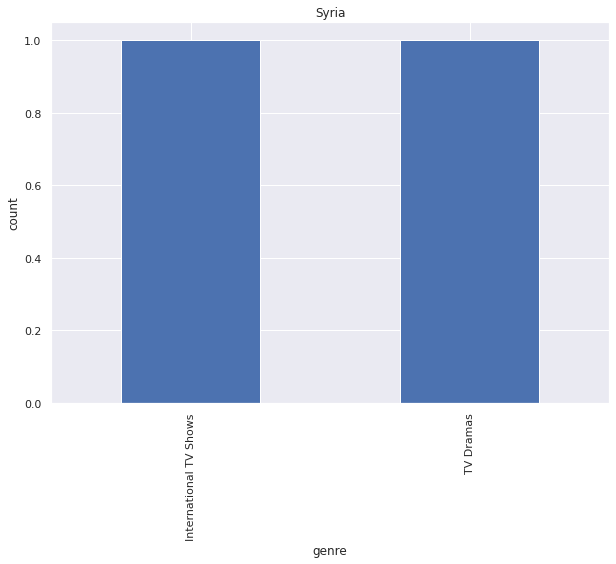

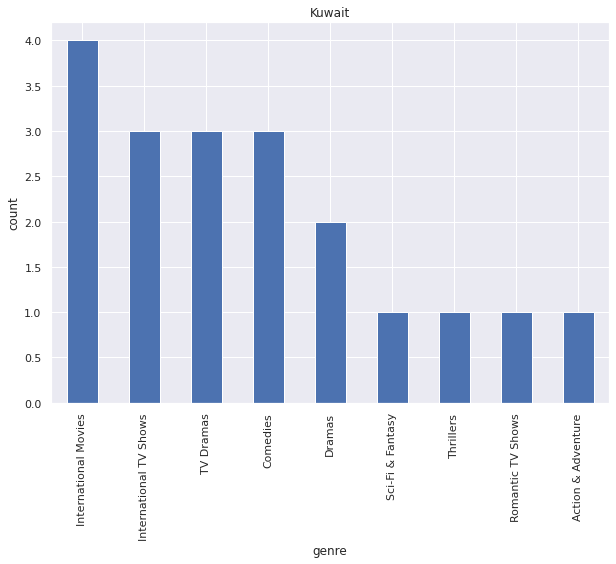

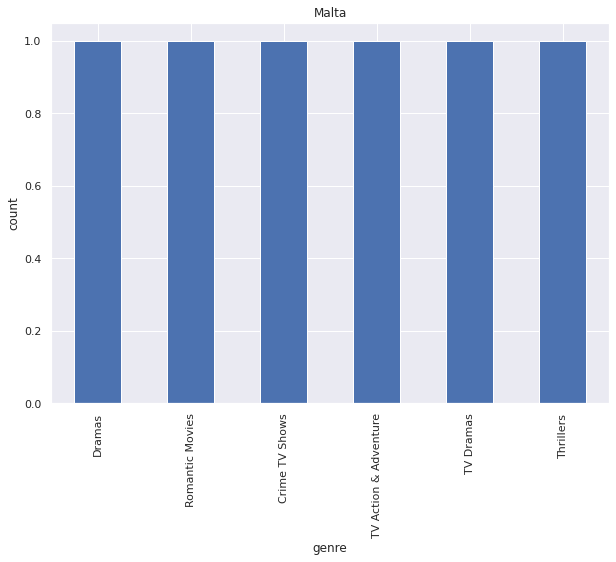

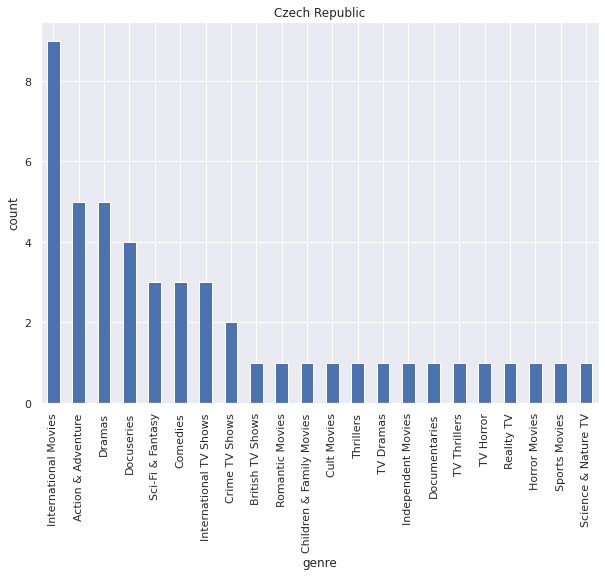

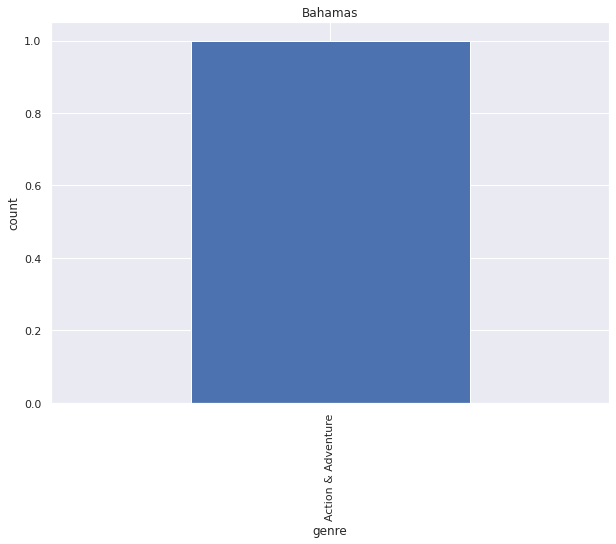

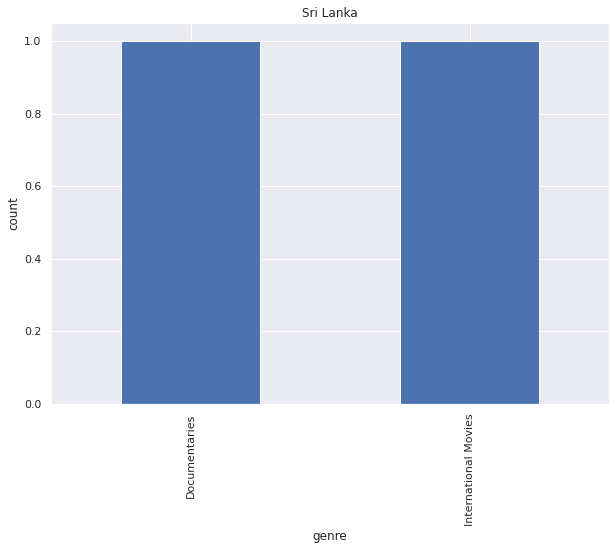

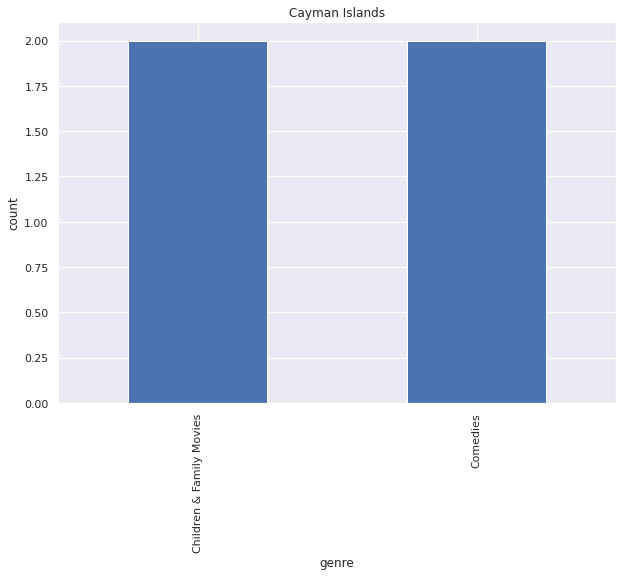

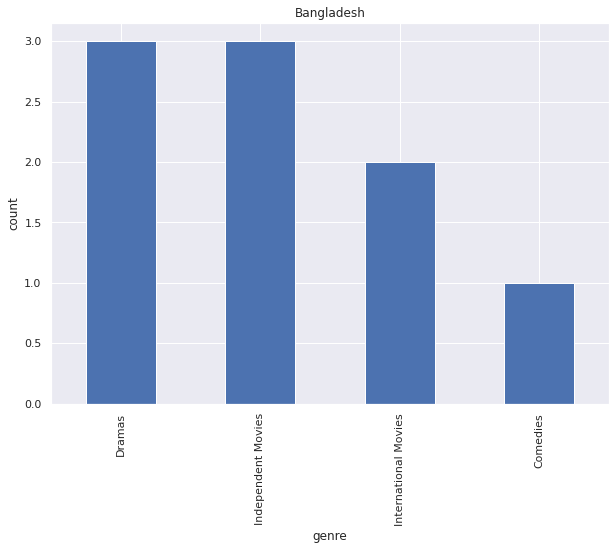

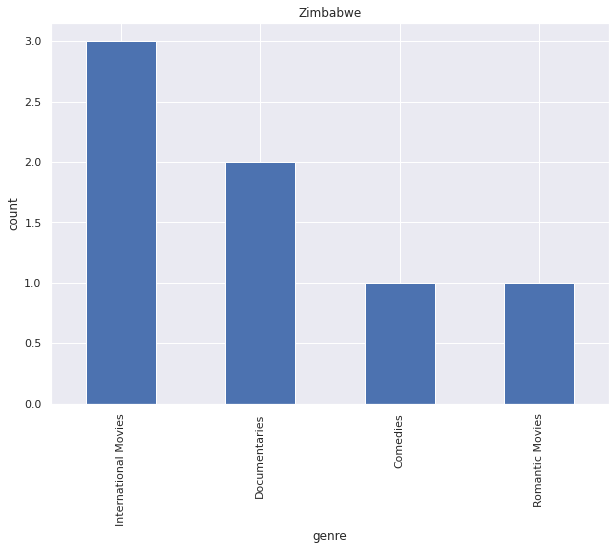

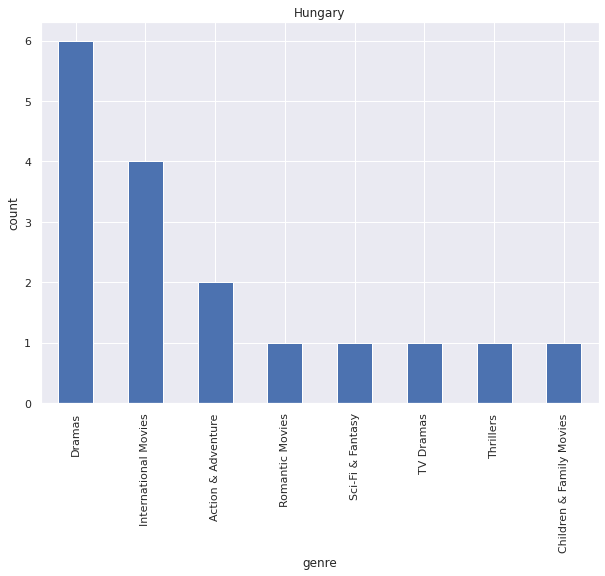

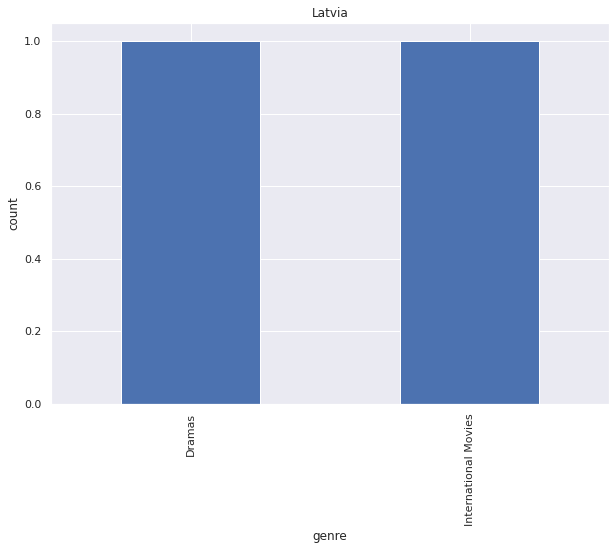

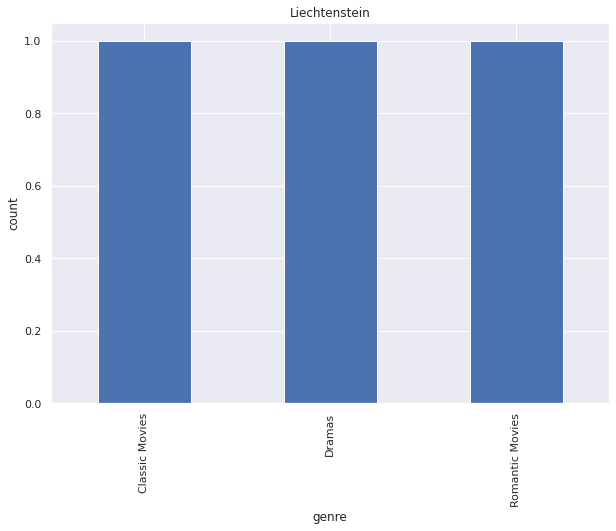

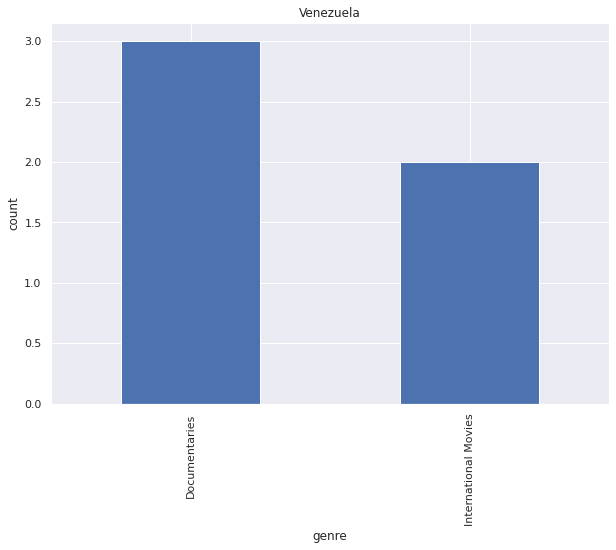

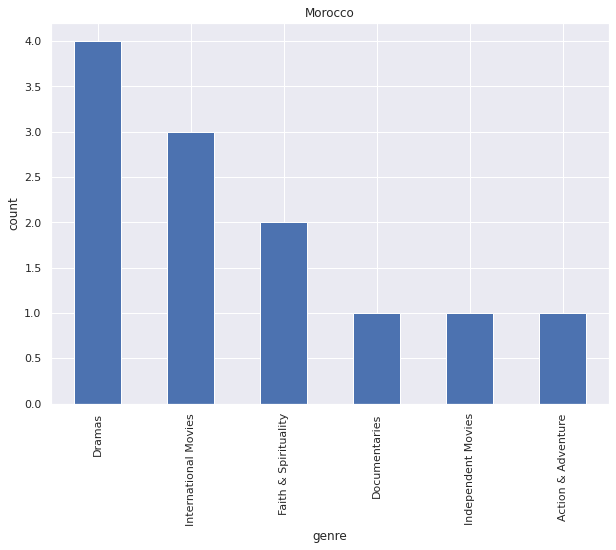

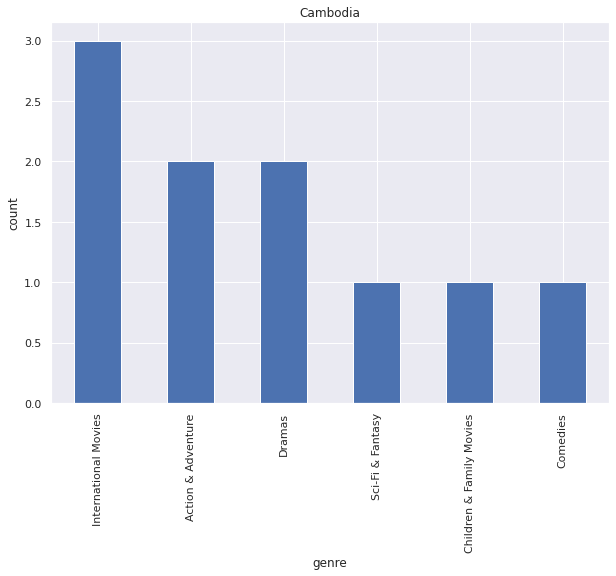

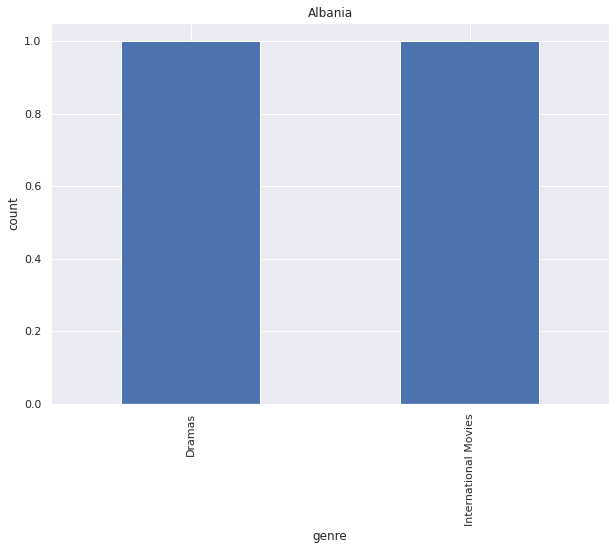

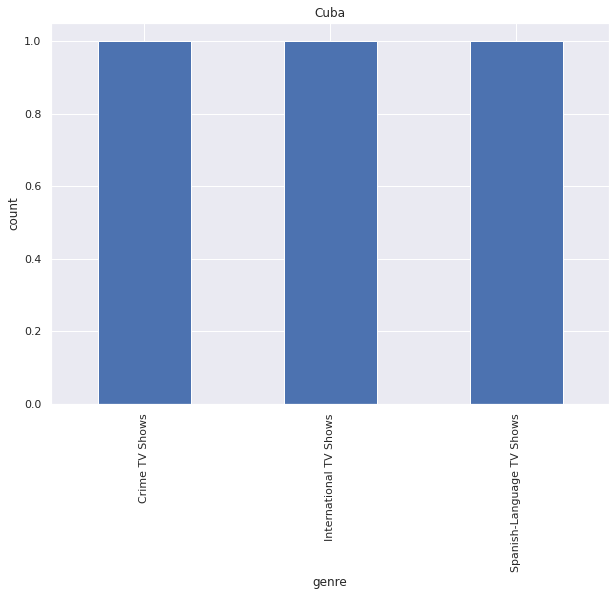

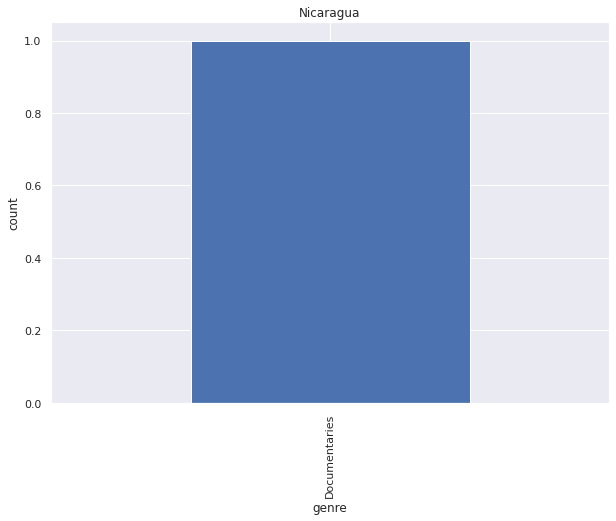

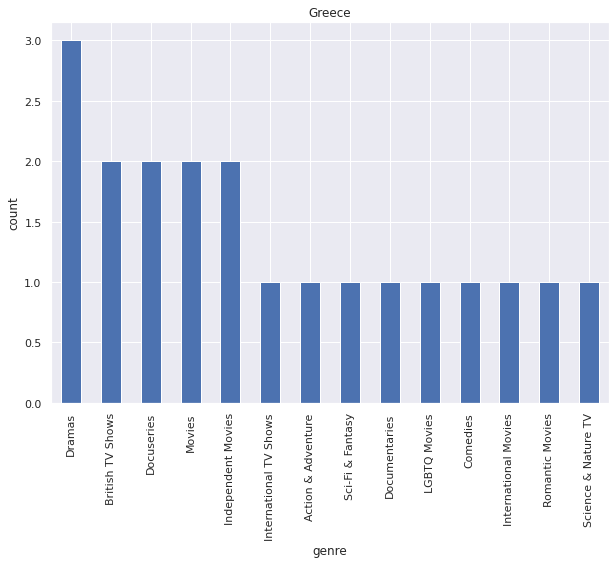

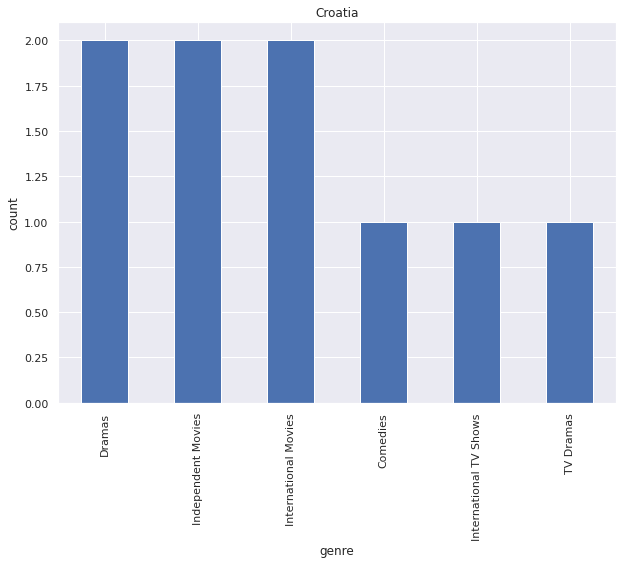

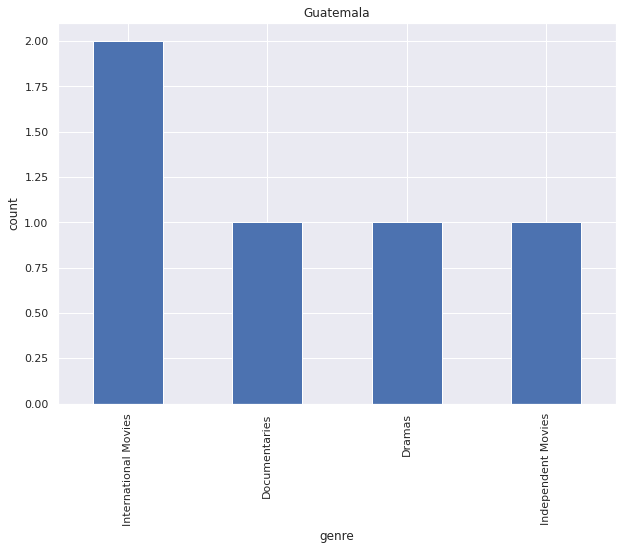

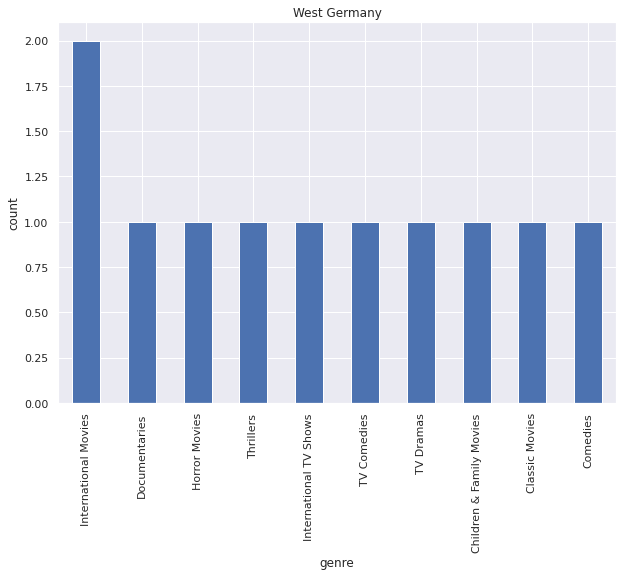

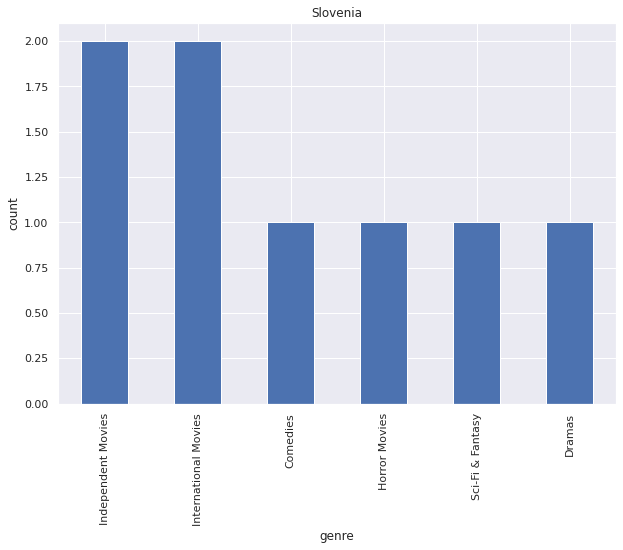

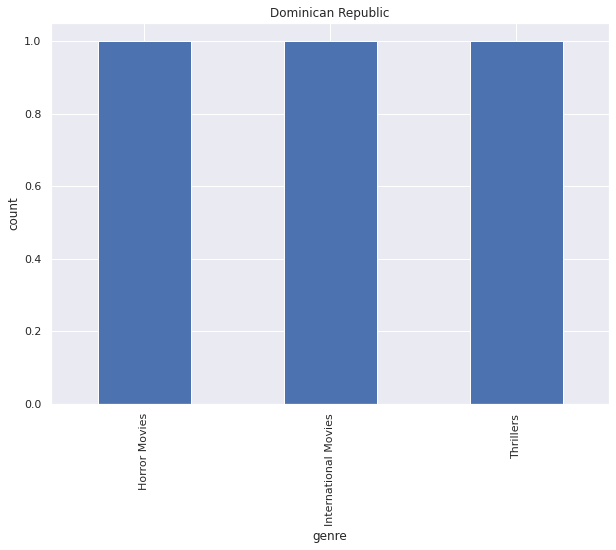

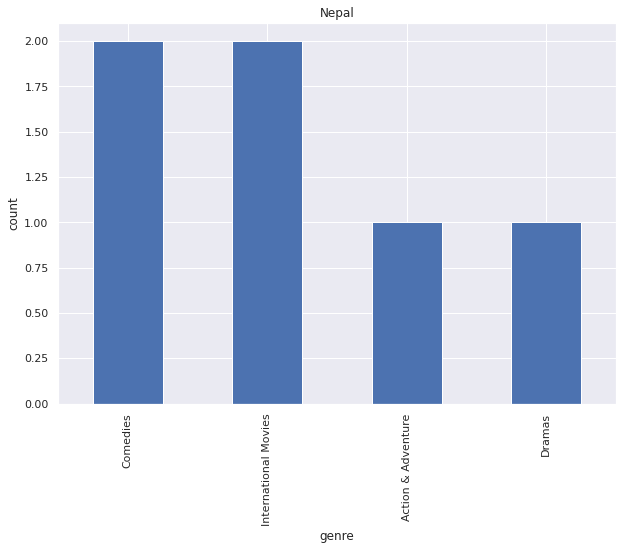

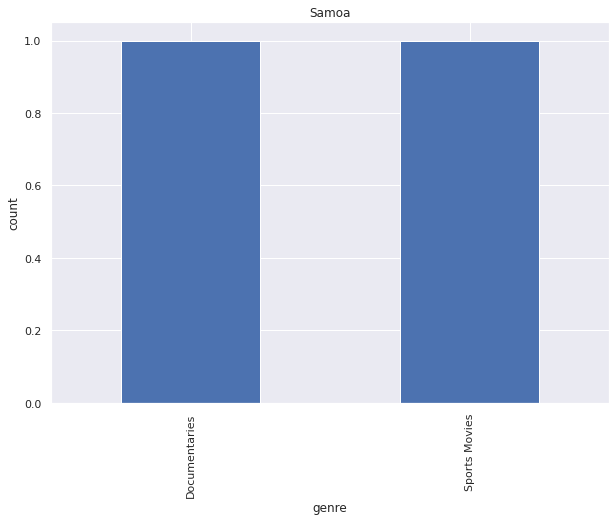

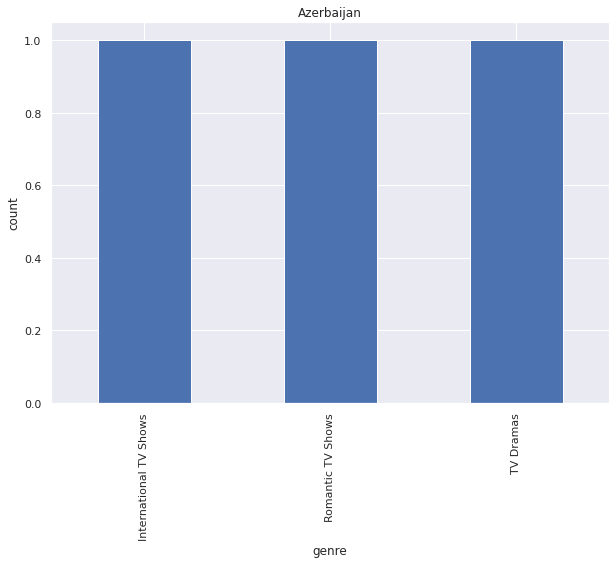

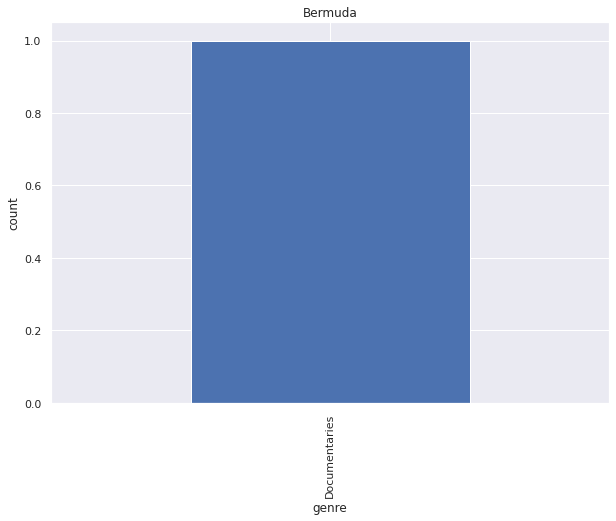

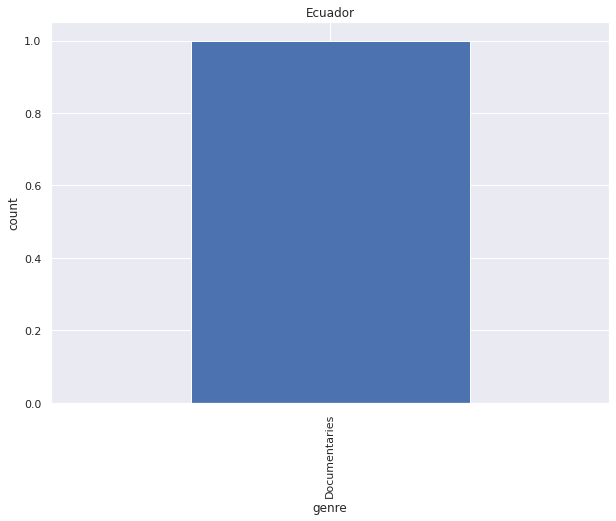

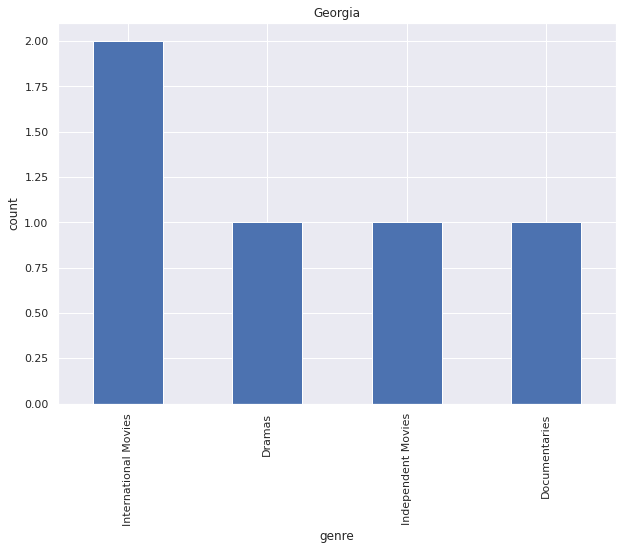

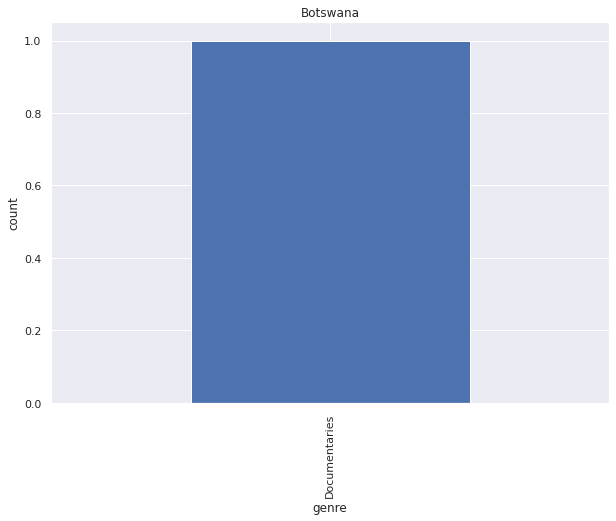

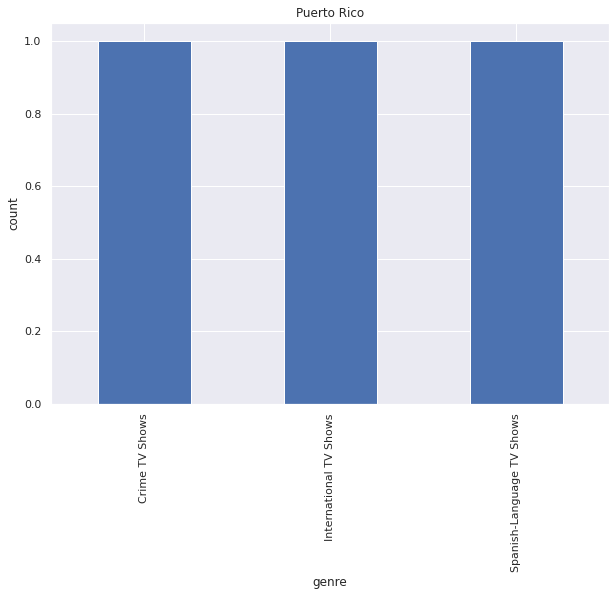

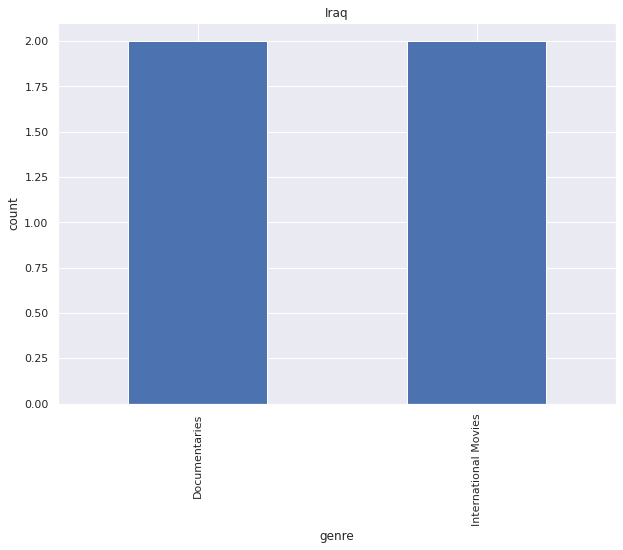

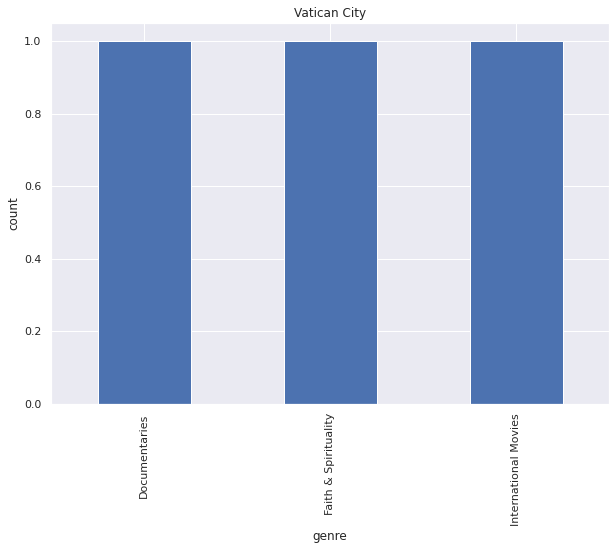

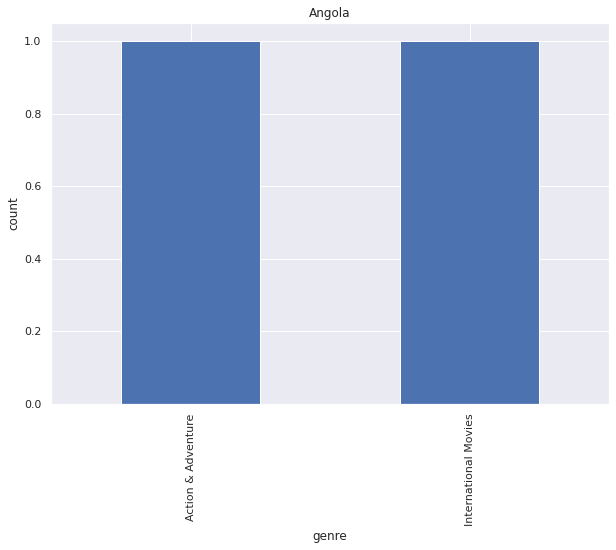

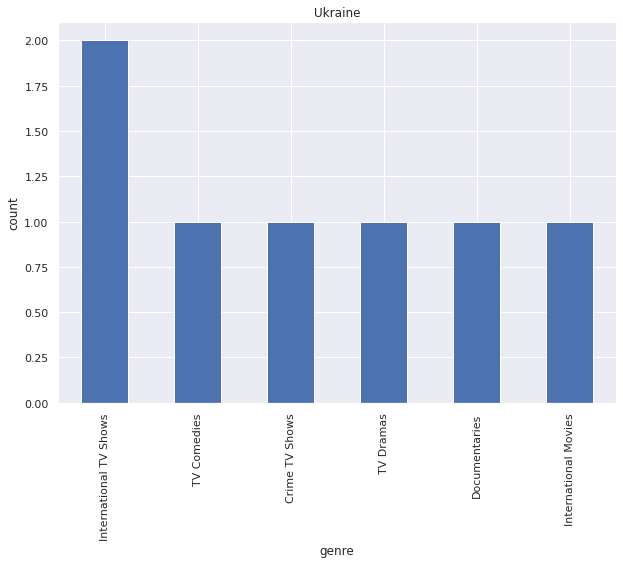

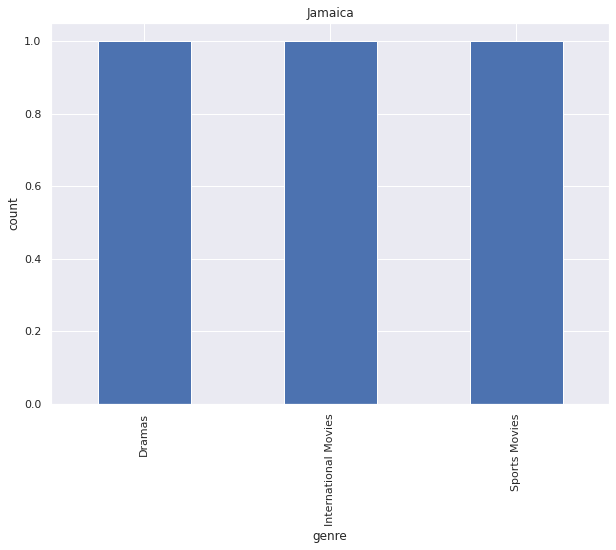

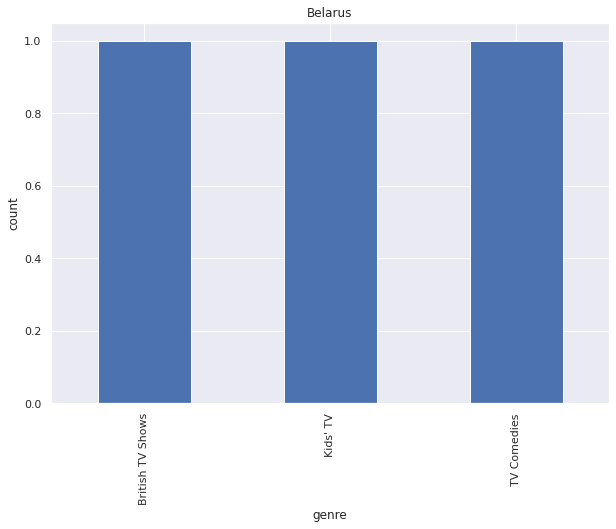

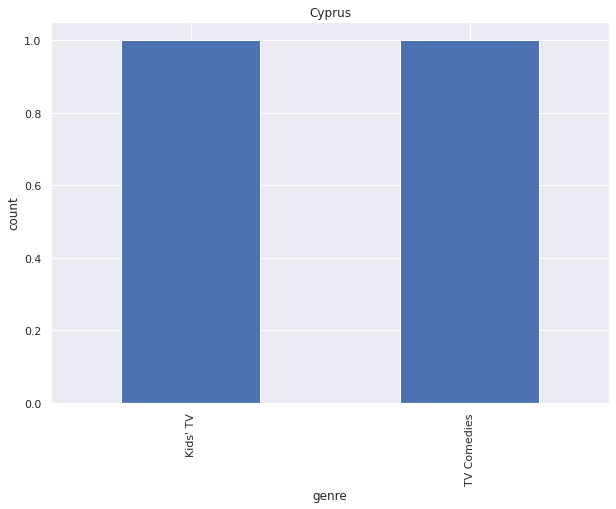

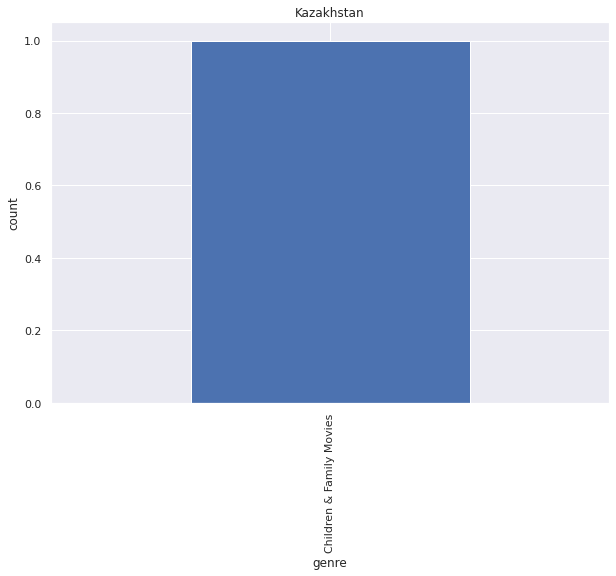

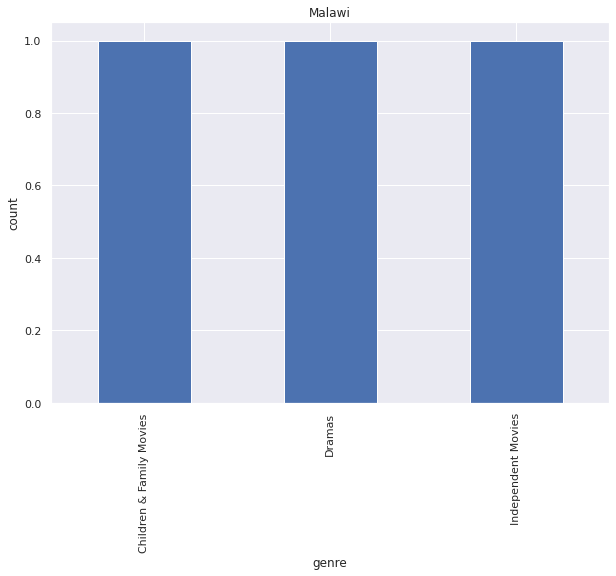

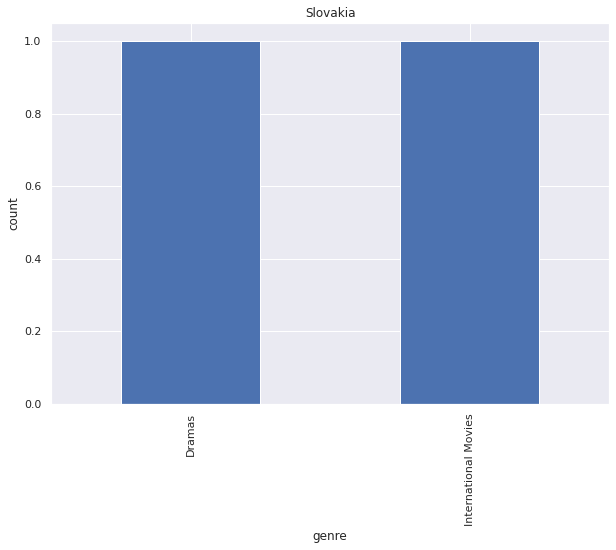

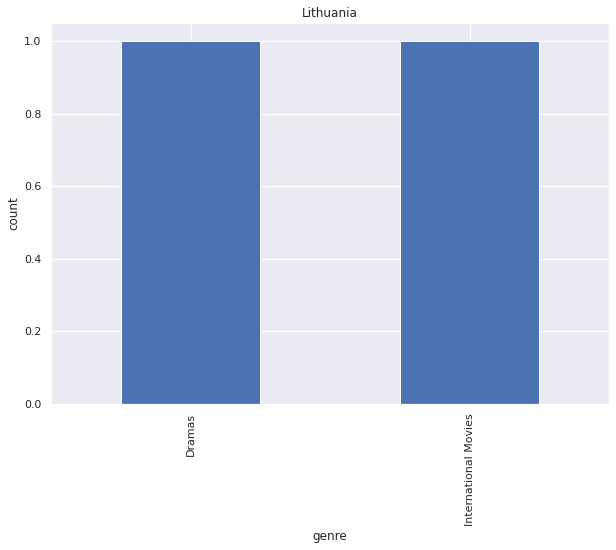

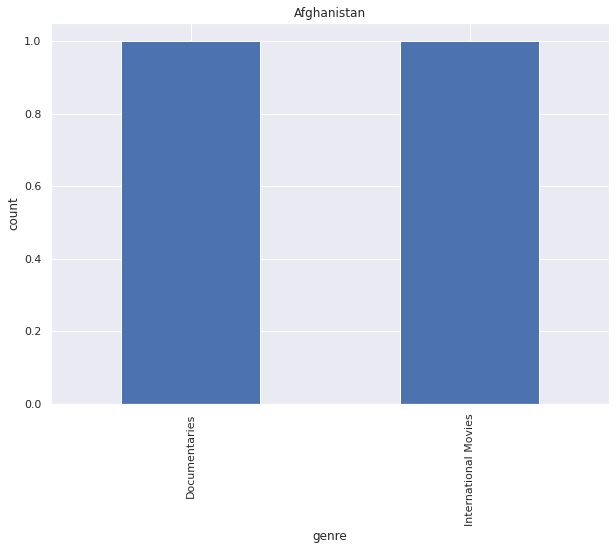

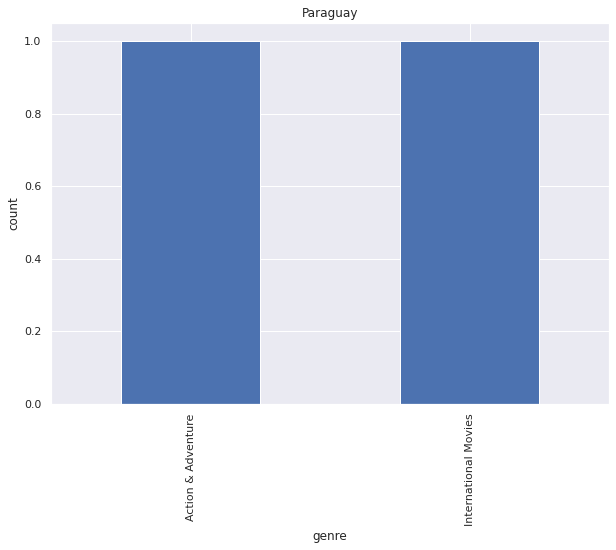

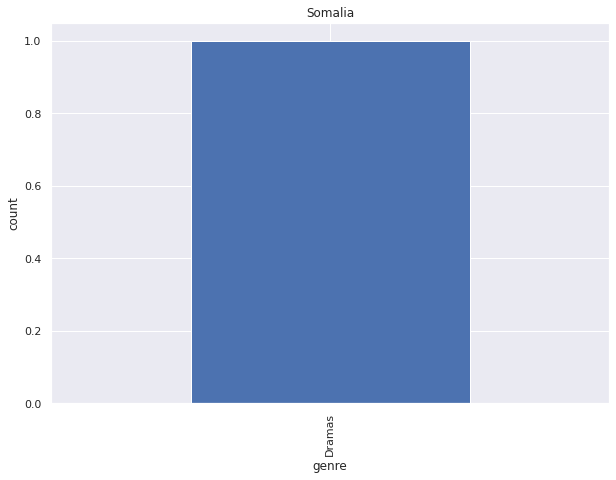

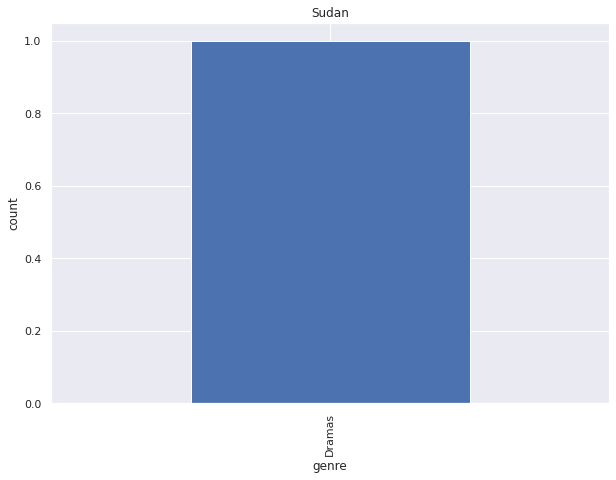

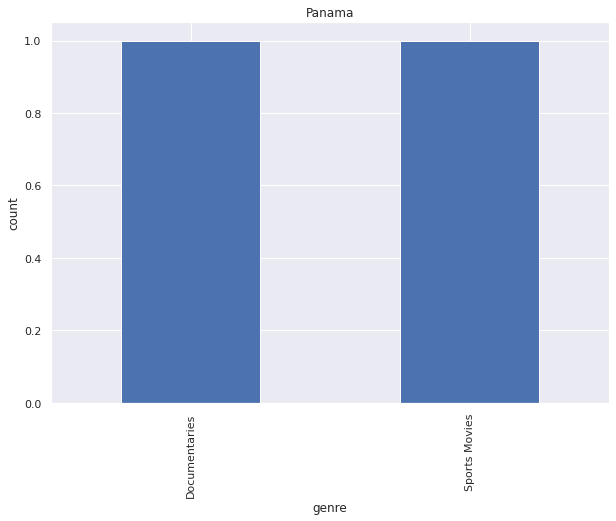

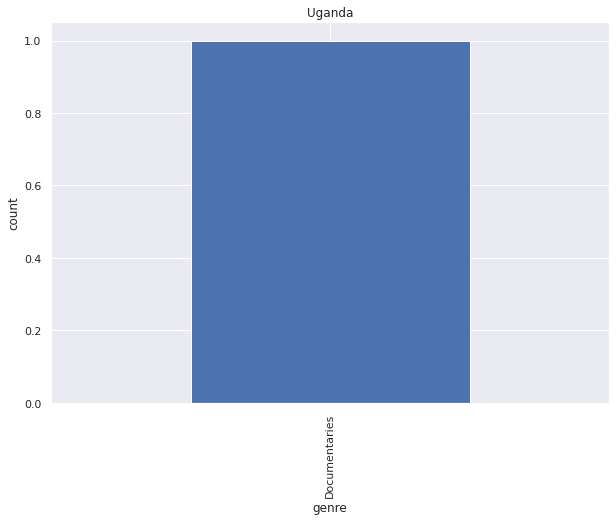

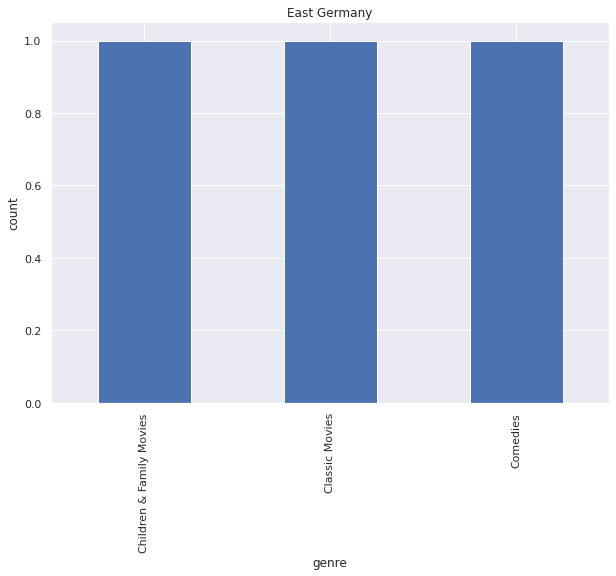

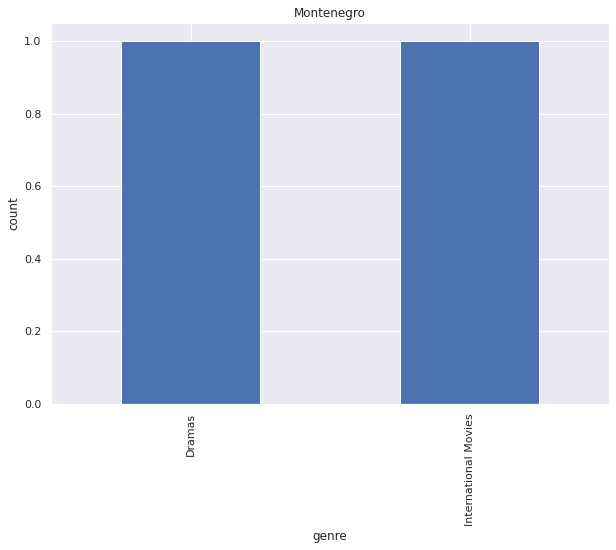

In [122]:
#Plotting each contrywise genre listings.
for cont in distinct_country:
  cg_df[cg_df['country_list'].str.replace(",","") == cont]['genre_list'].value_counts().plot(kind = "bar", figsize = (10,7))
  plt.title(cont)
  plt.xlabel('genre')
  plt.ylabel('count')
  plt.show()
  print("\n")

Above list of graphs clearly shows the country wise listing for each country.
We can draw lots of useful insights from the above graphs -



*   Most of the countries like Brazil, Mexico, Turkey, Egypt, India etc have produced more International Movies.
*   Countries like Singapore, Japan, South Korea etc have produced more International TV Shows as compared to other genres.
* Contries like US, Poland, iceland Dramas are most produced genre.
* UK is producing more British TV shows.
* Canada have produced most comedies genre shows/movies.



#### 2. country wise content rating distribution

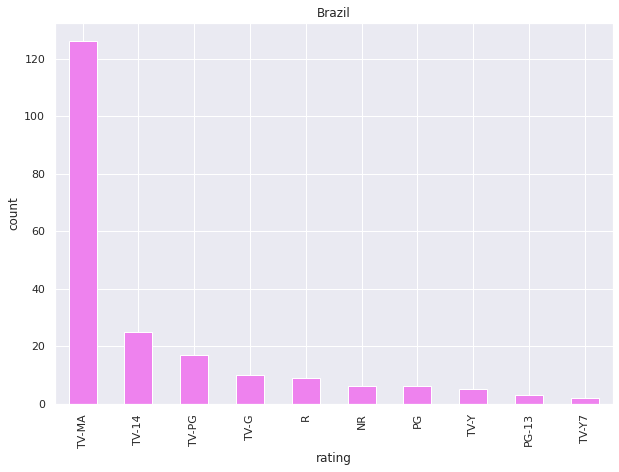

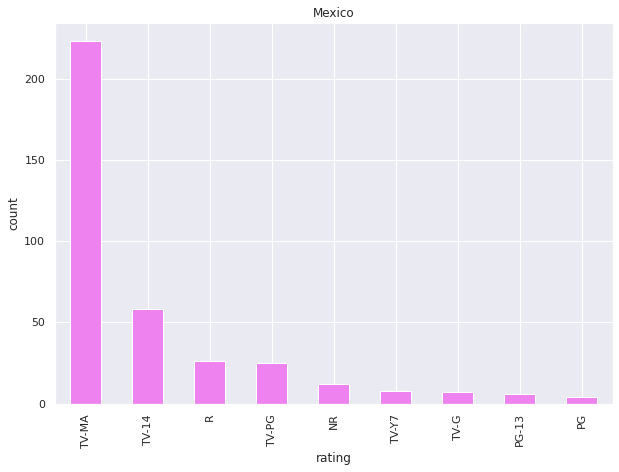

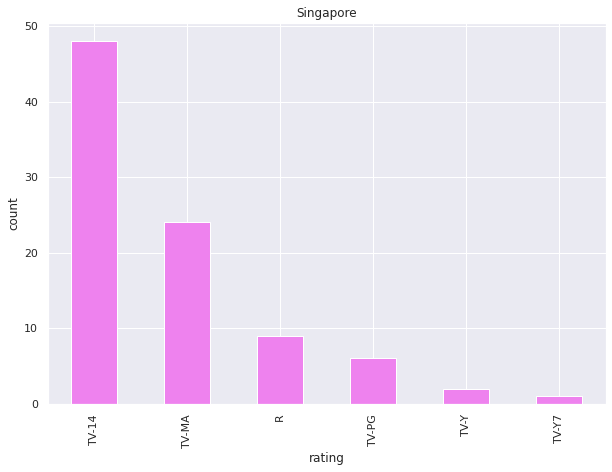

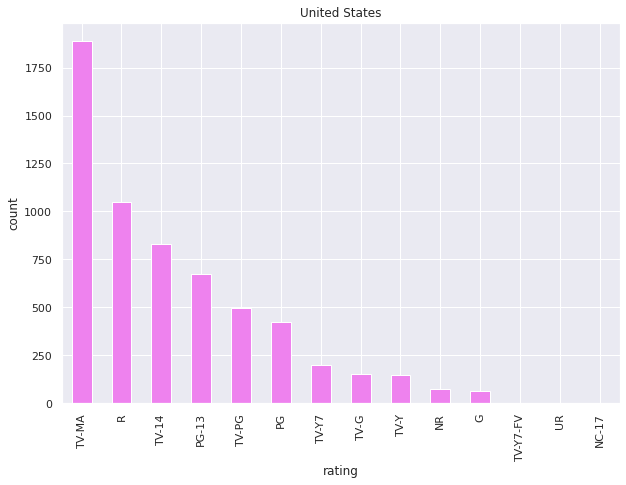

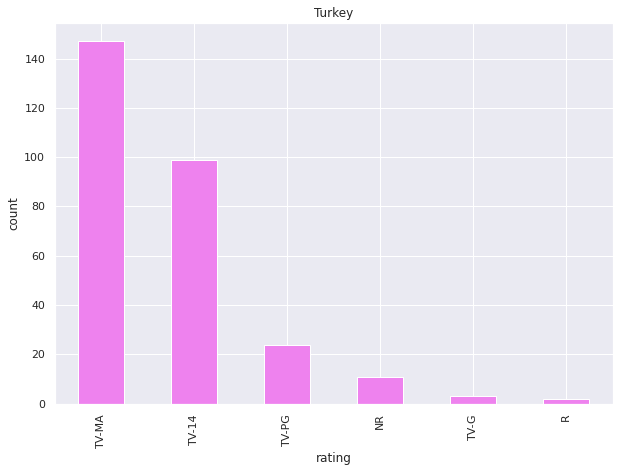

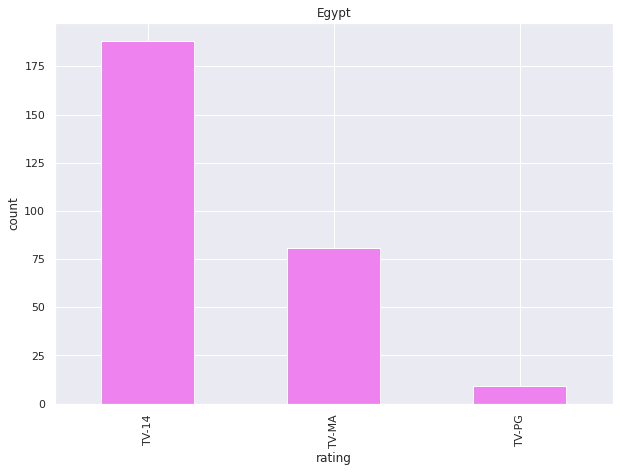

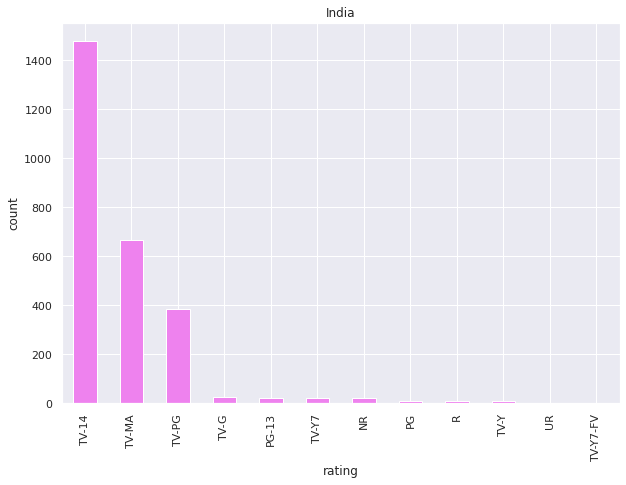

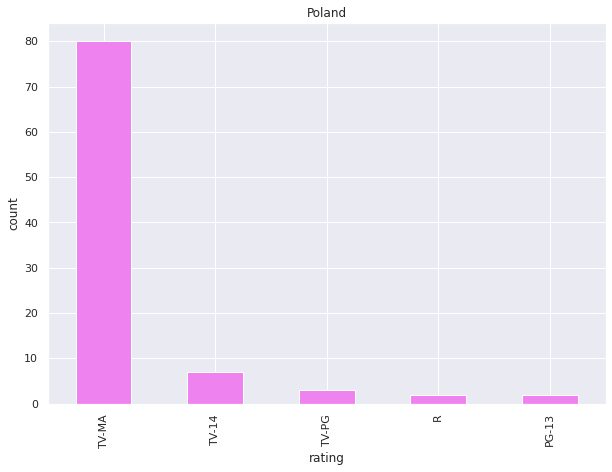

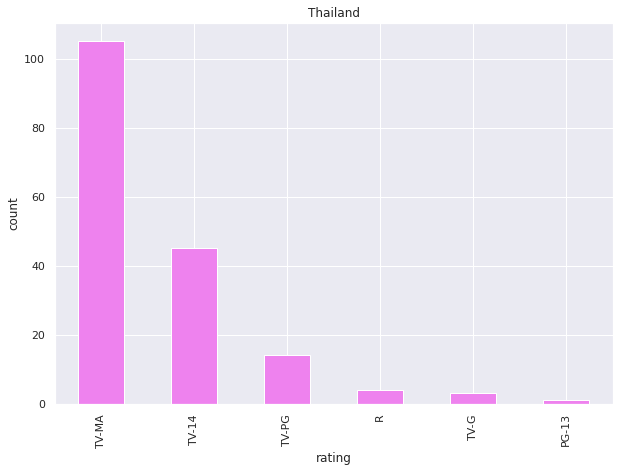

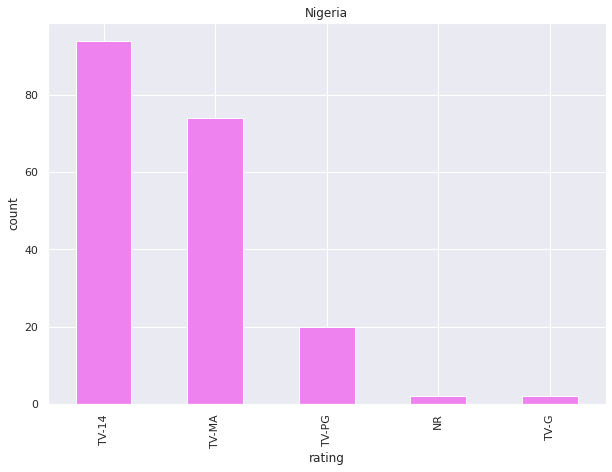

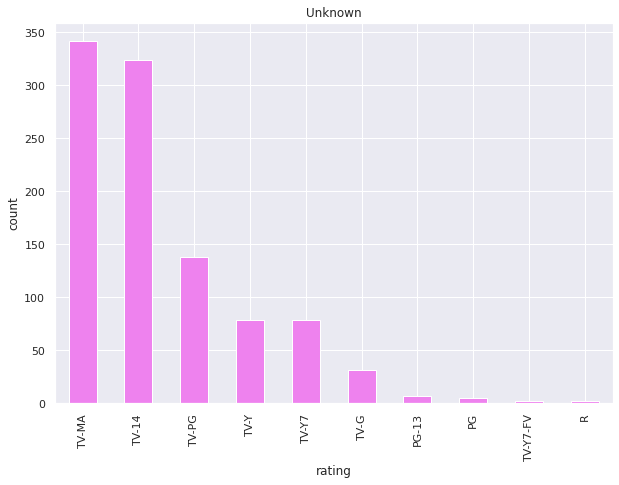

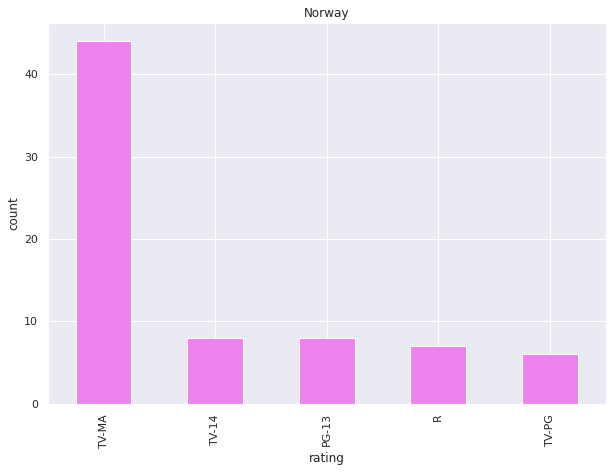

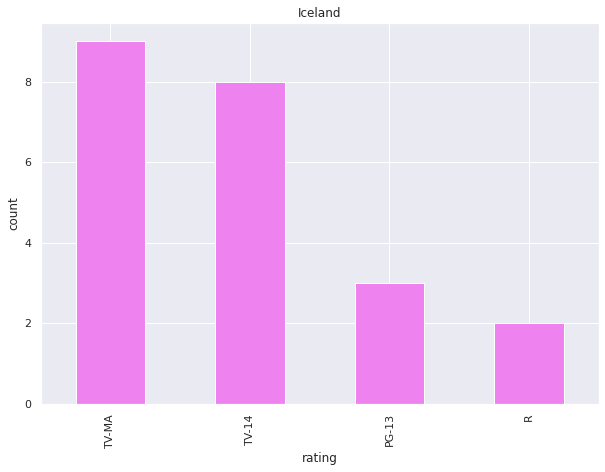

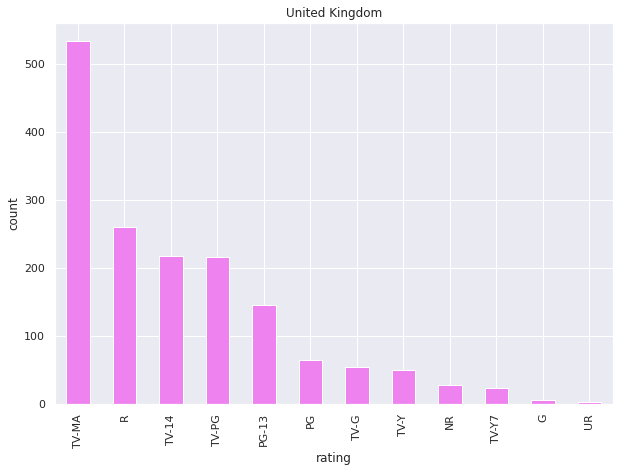

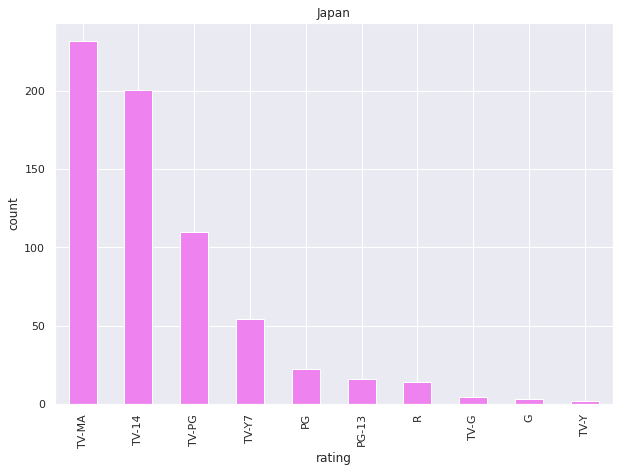

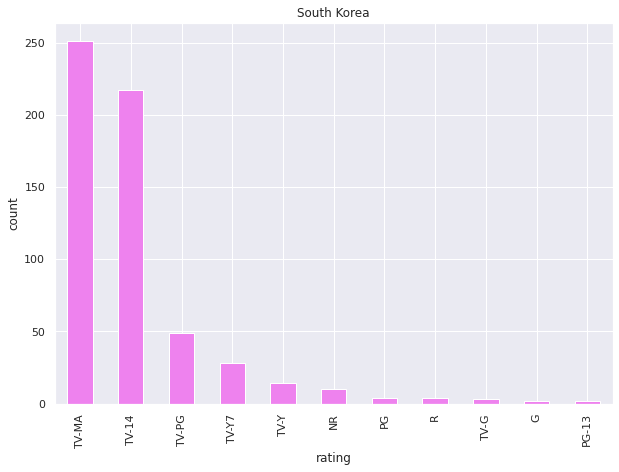

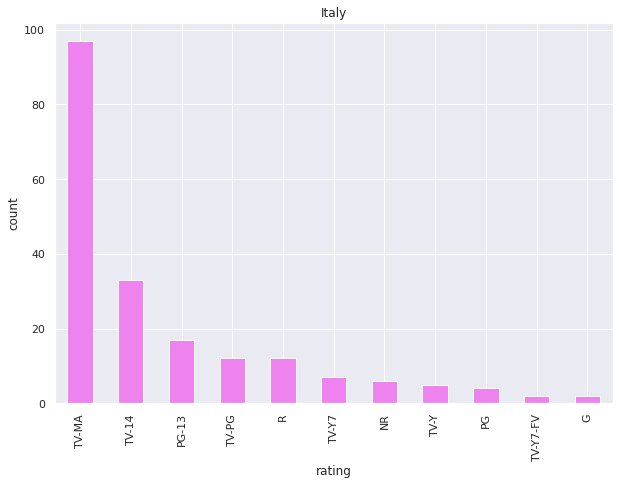

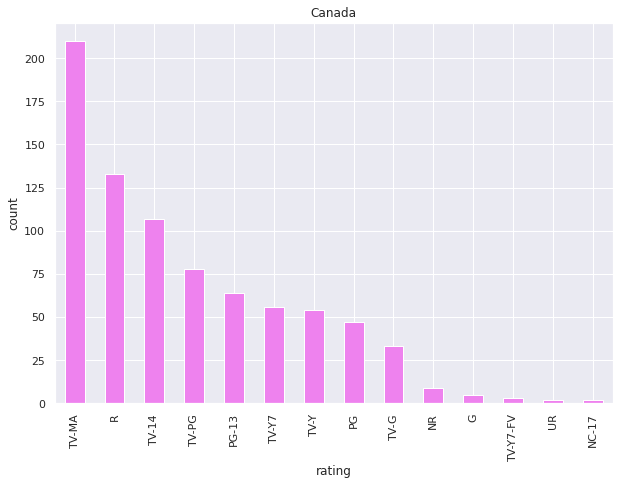

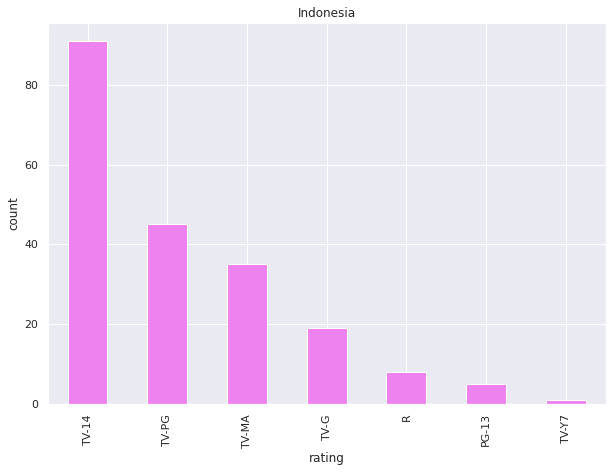

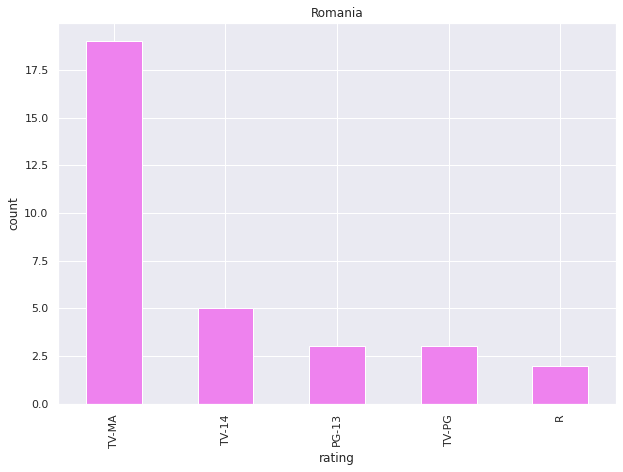

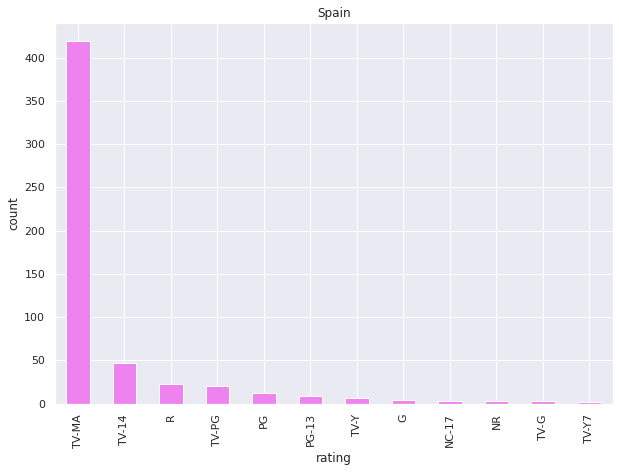

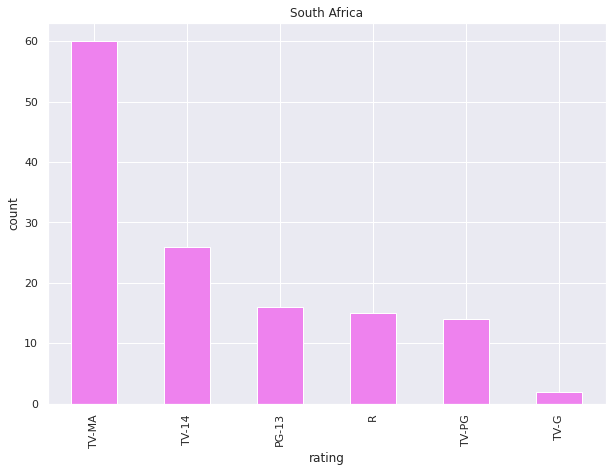

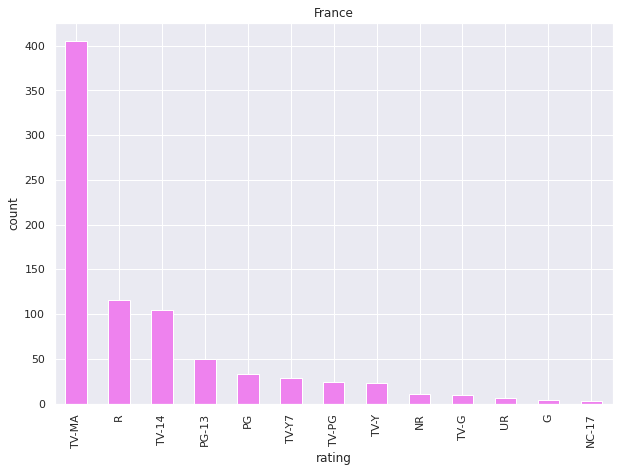

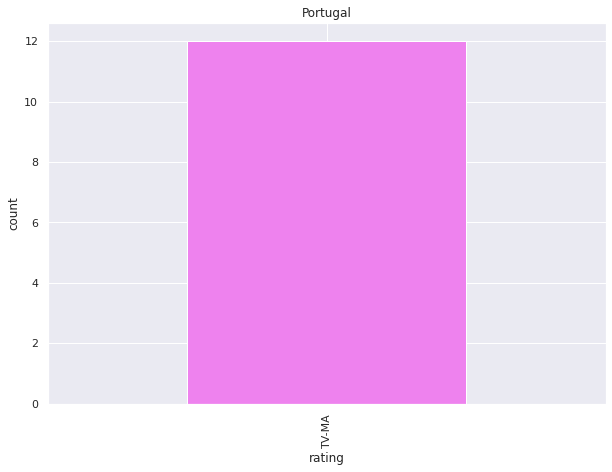

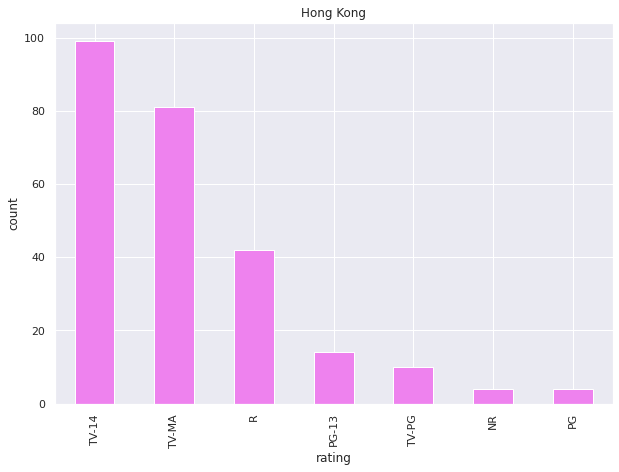

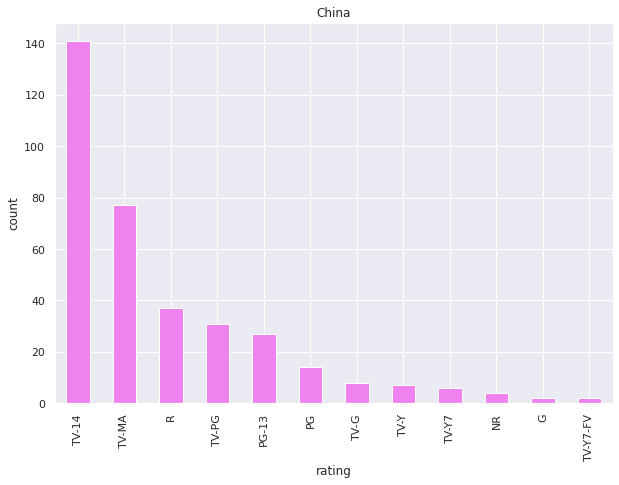

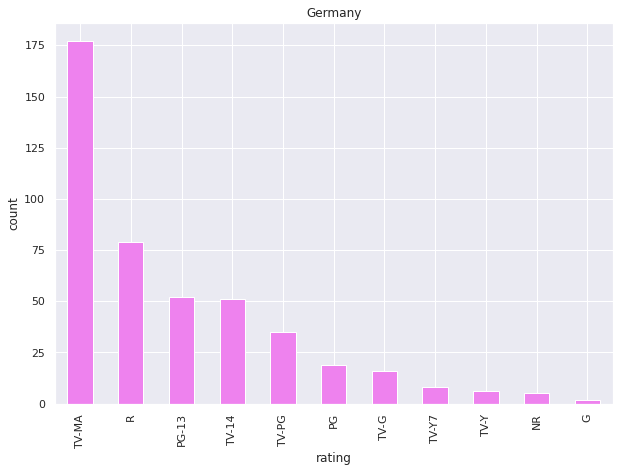

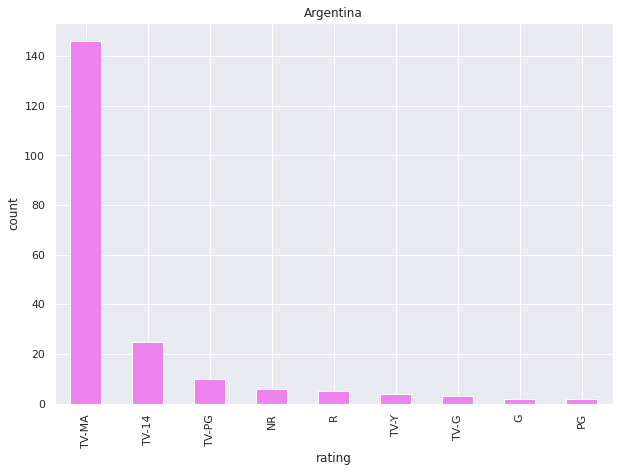

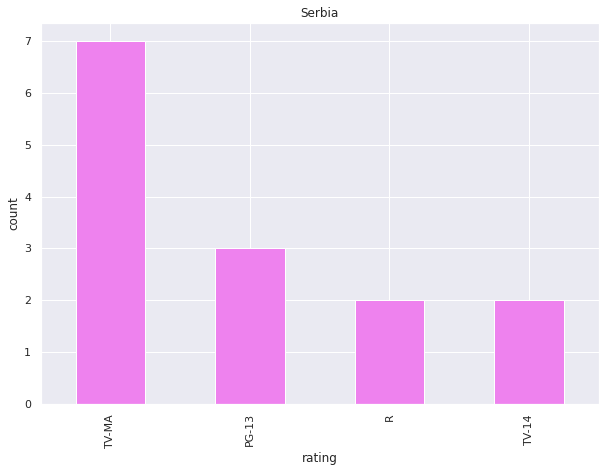

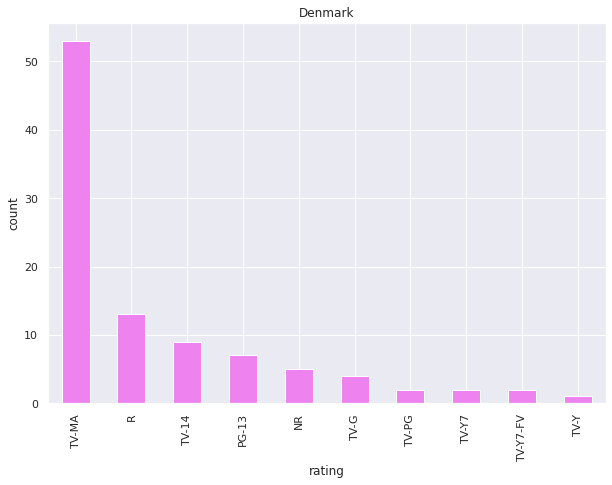

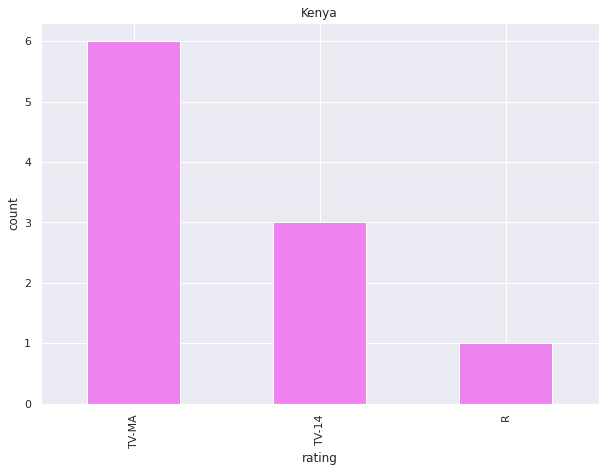

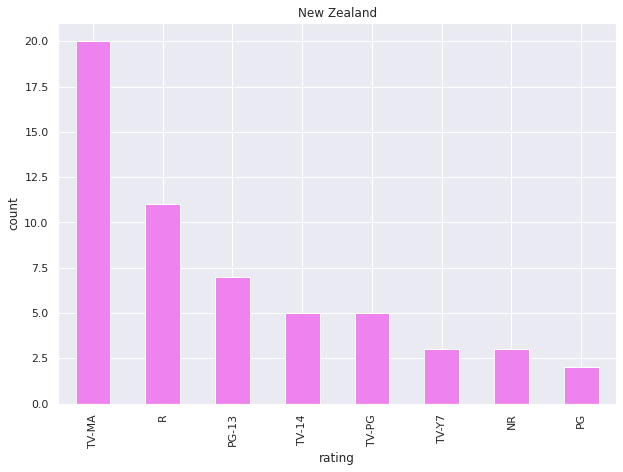

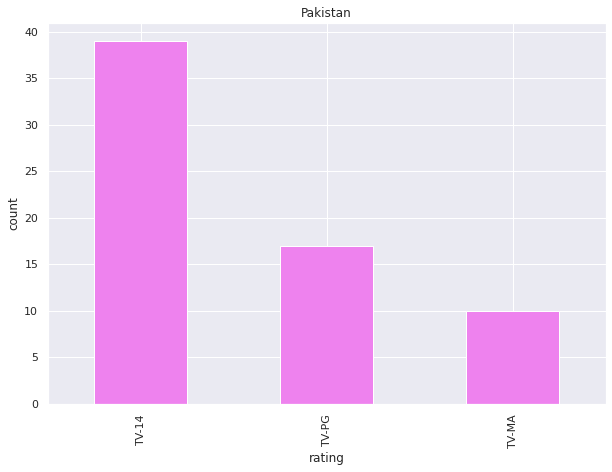

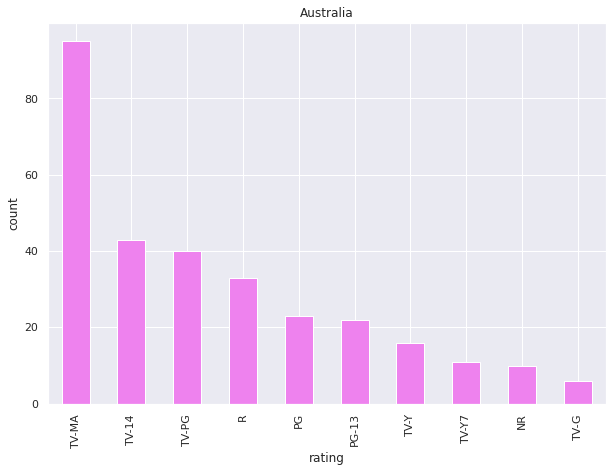

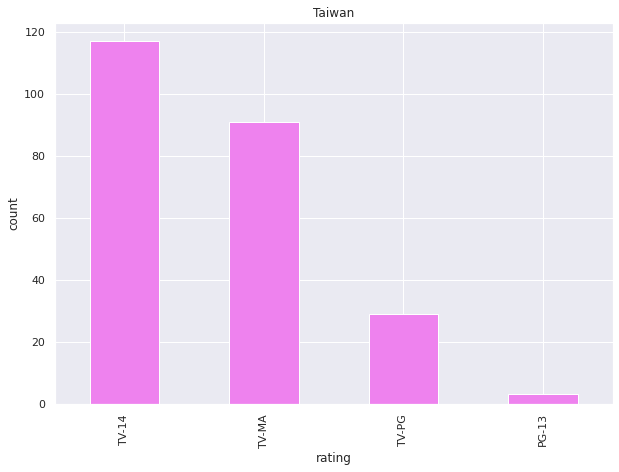

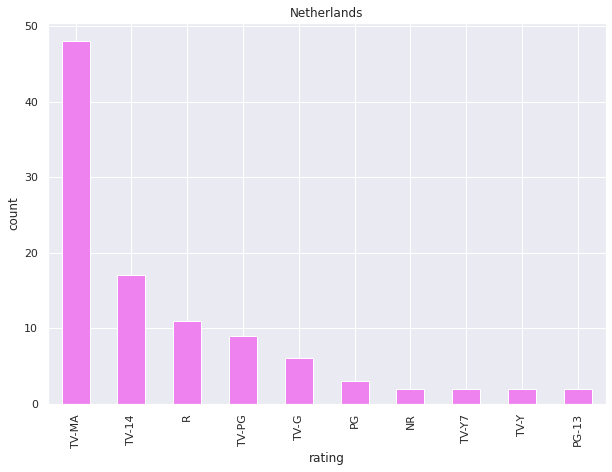

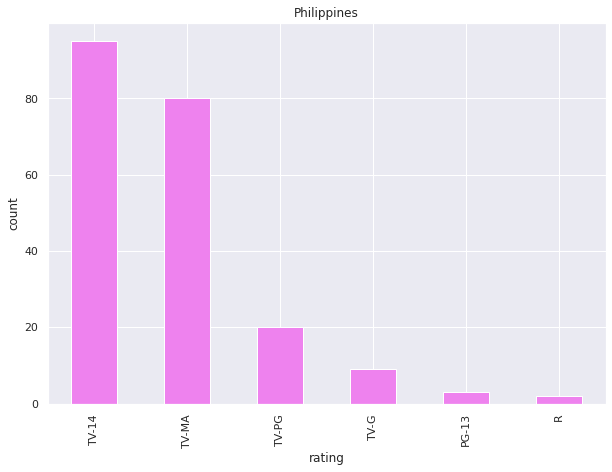

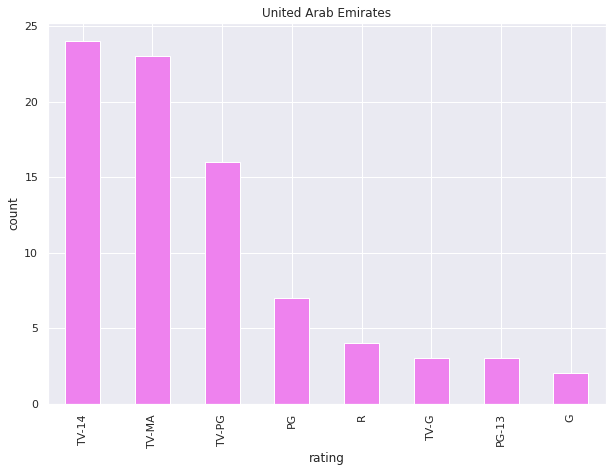

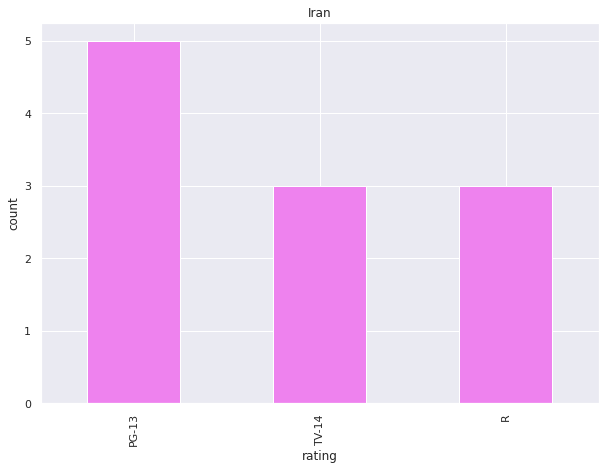

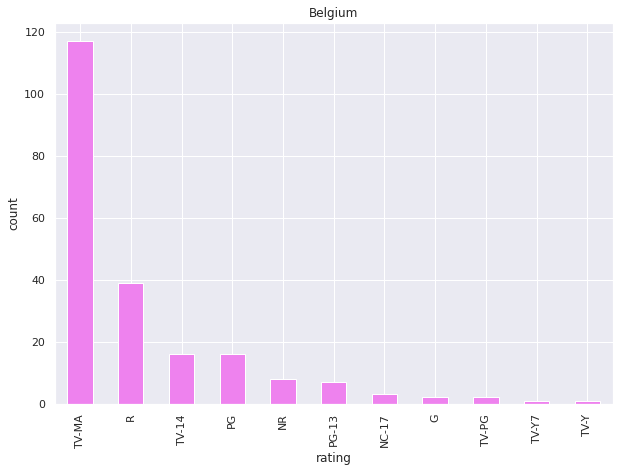

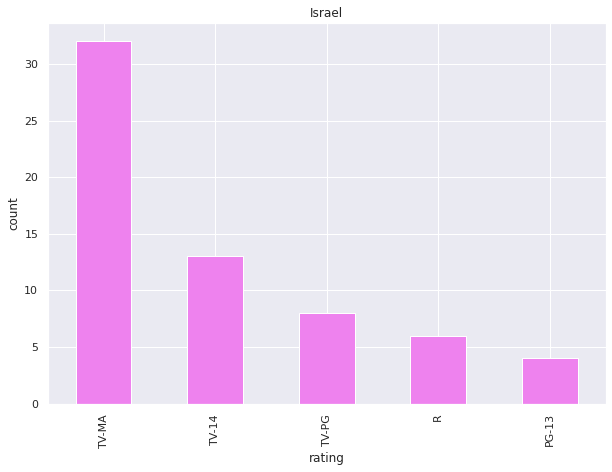

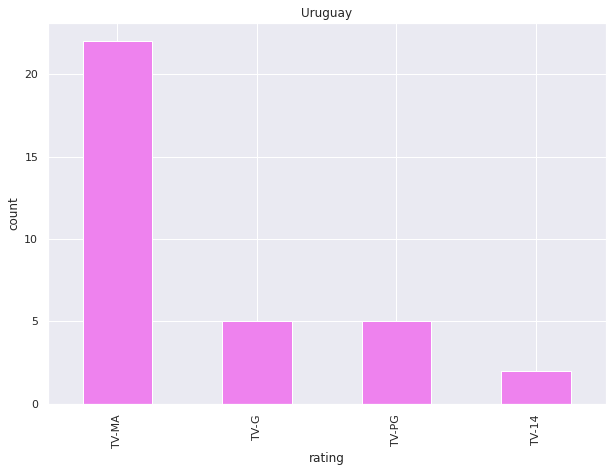

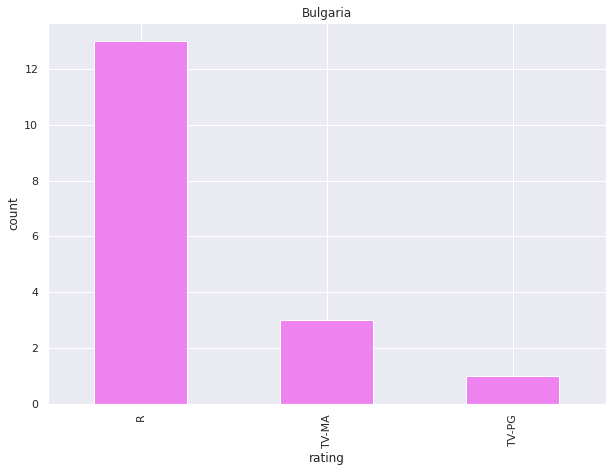

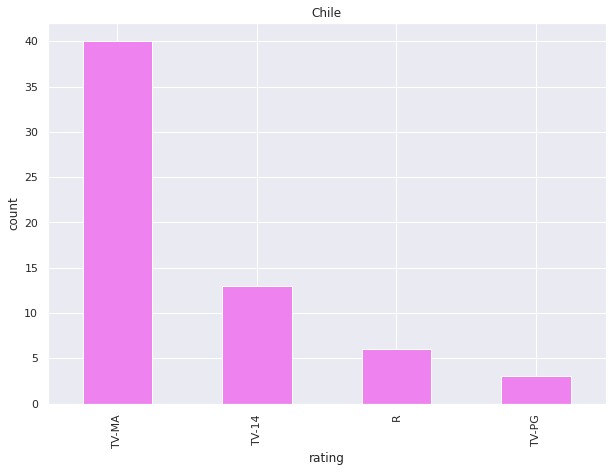

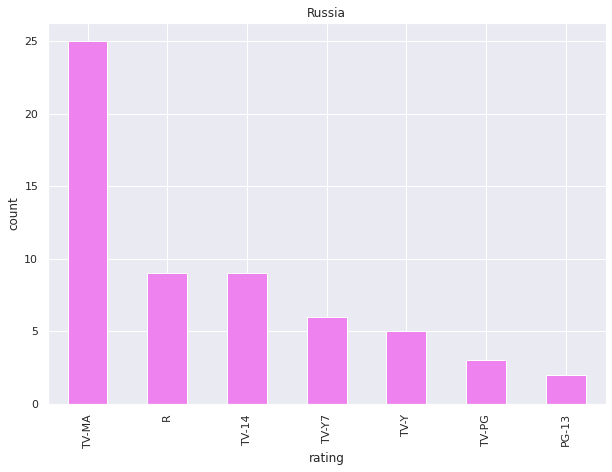

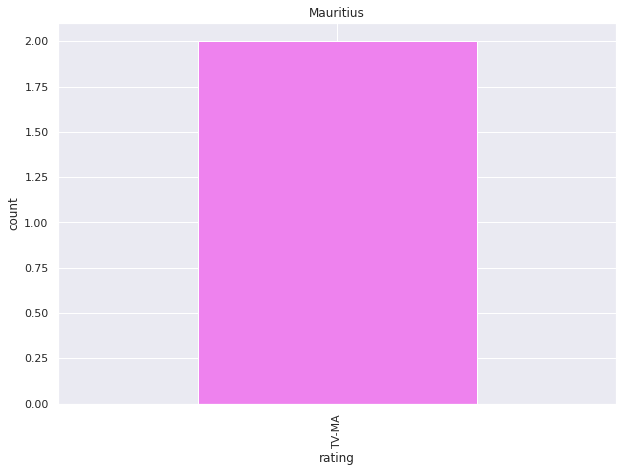

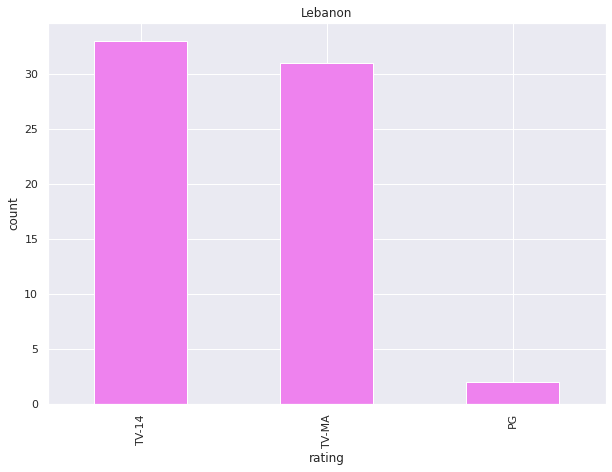

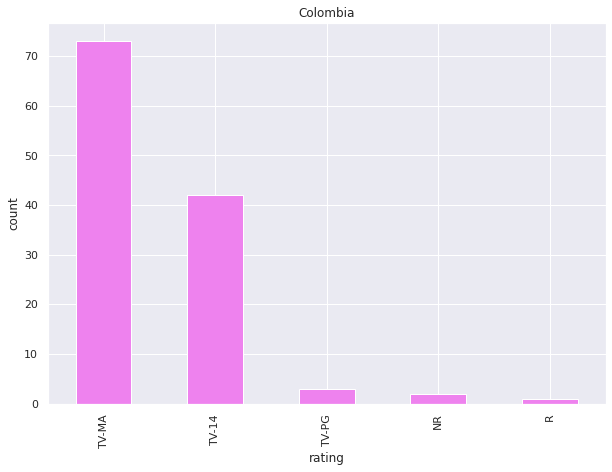

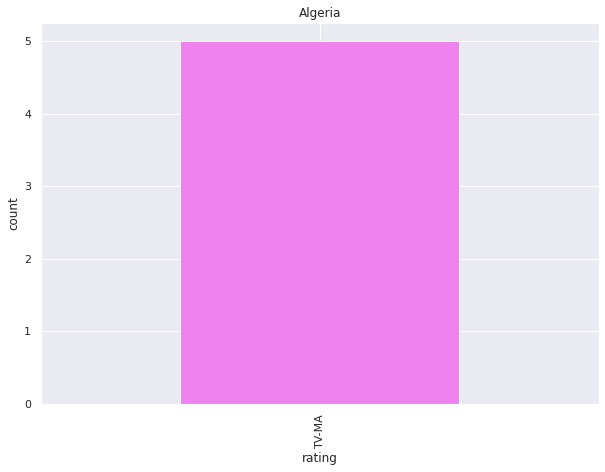

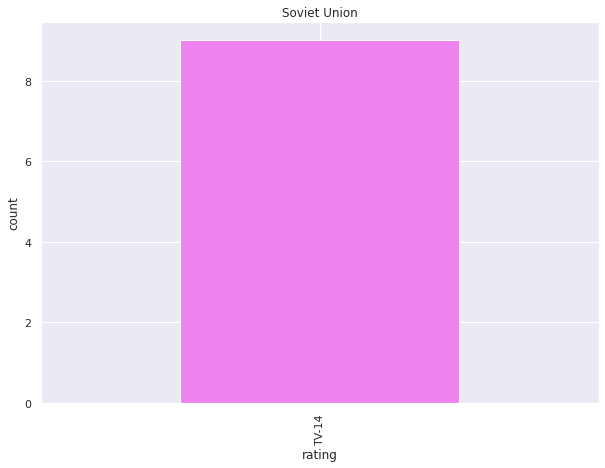

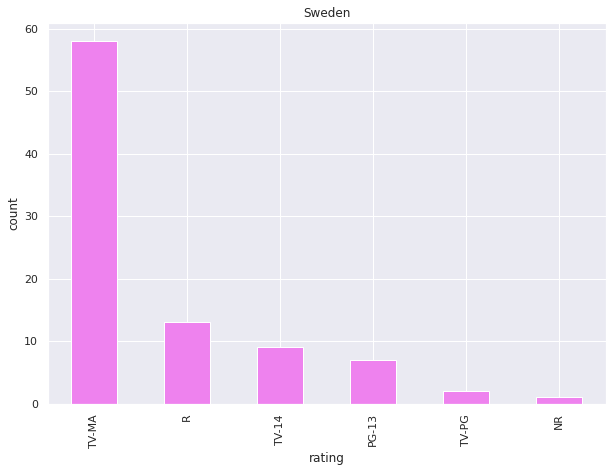

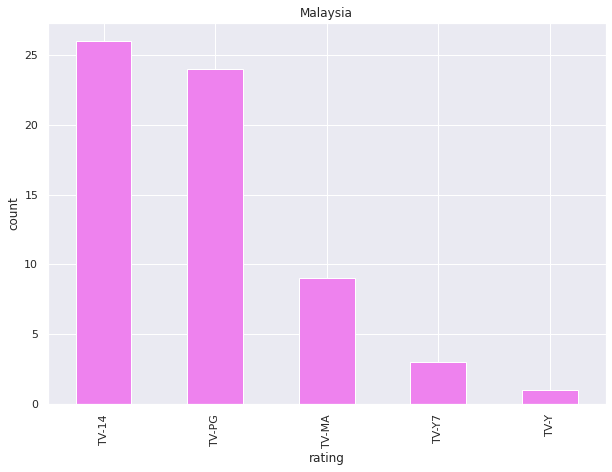

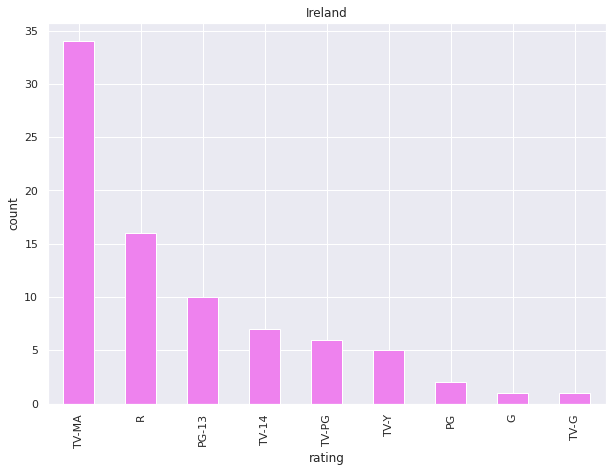

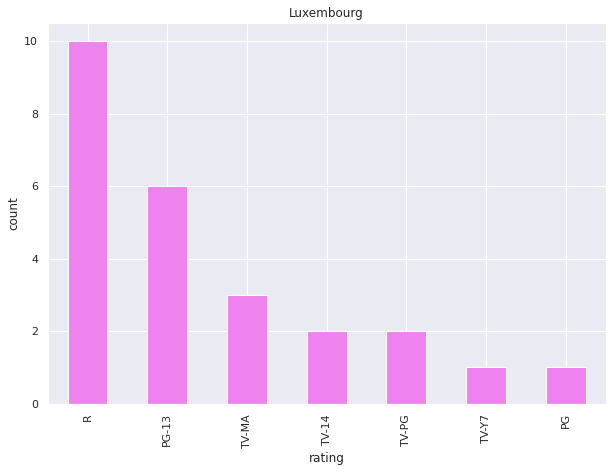

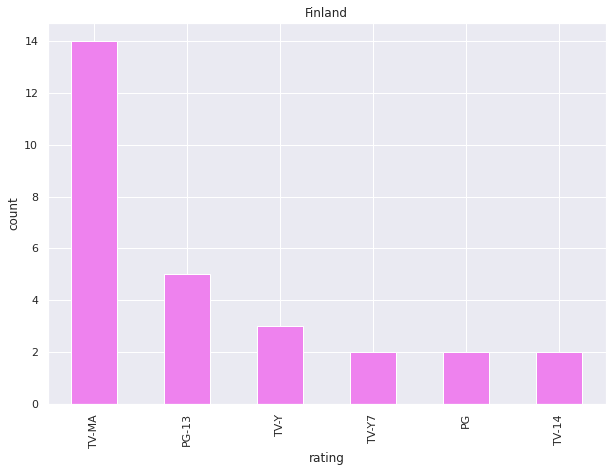

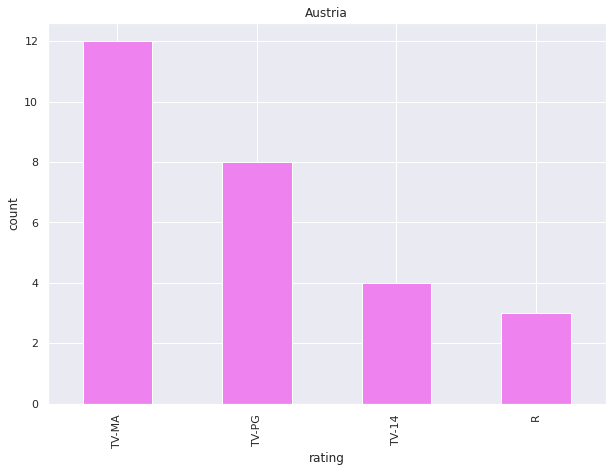

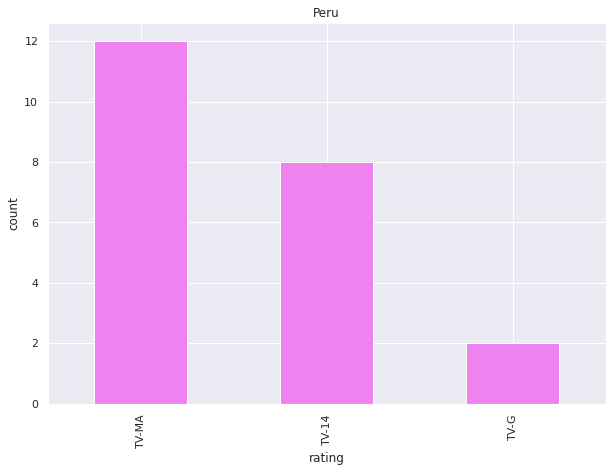

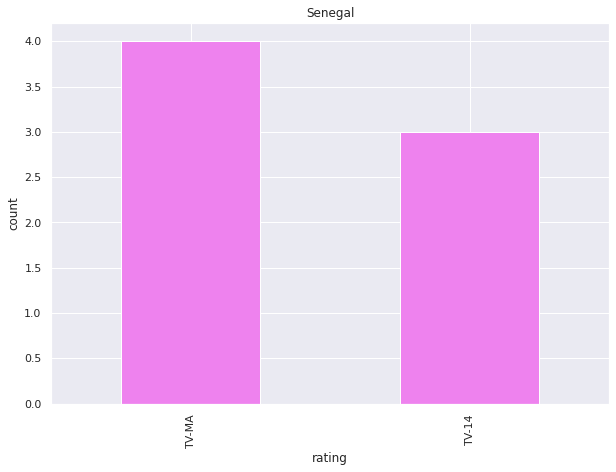

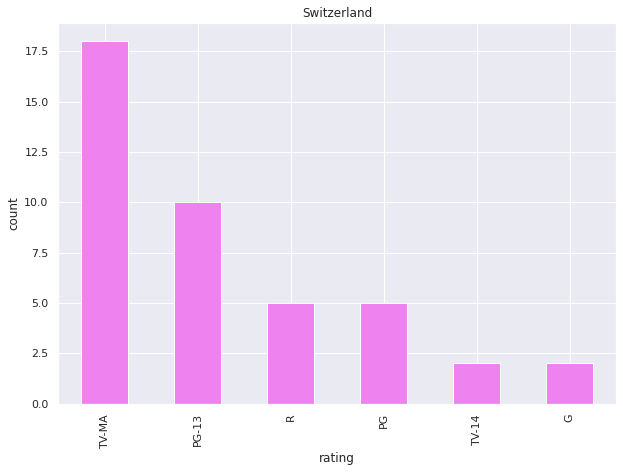

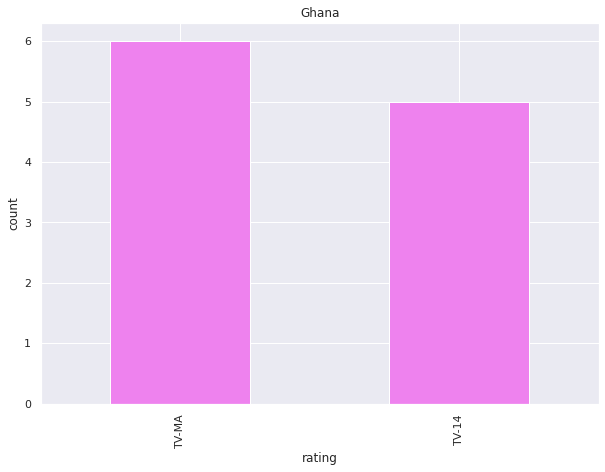

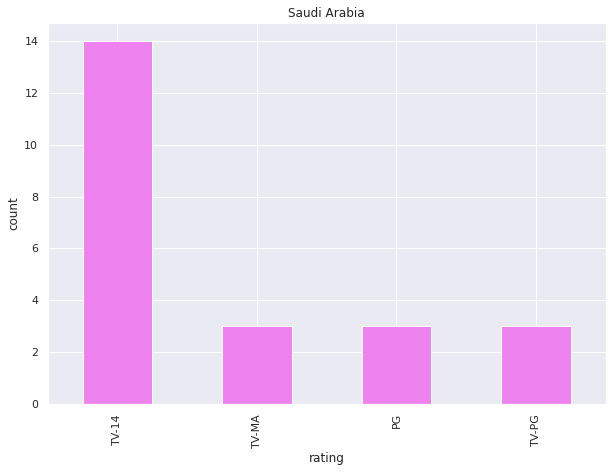

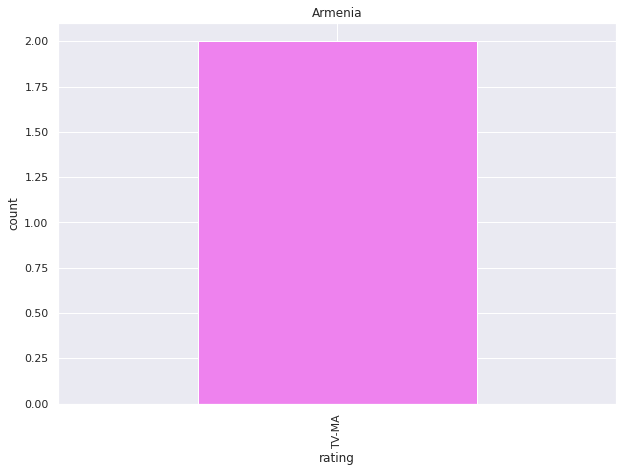

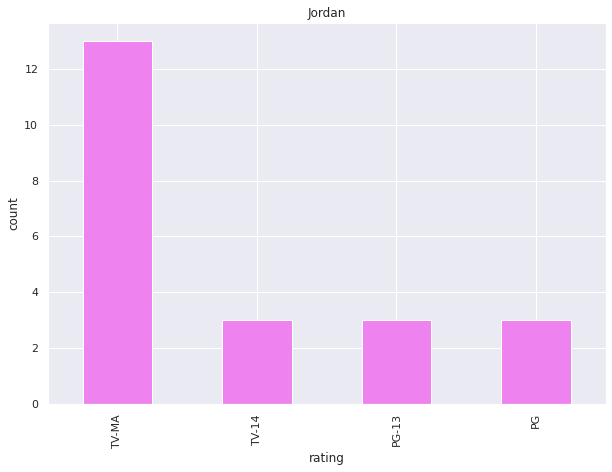

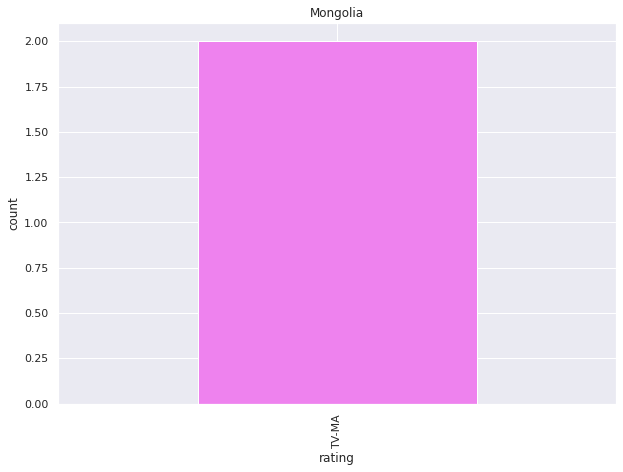

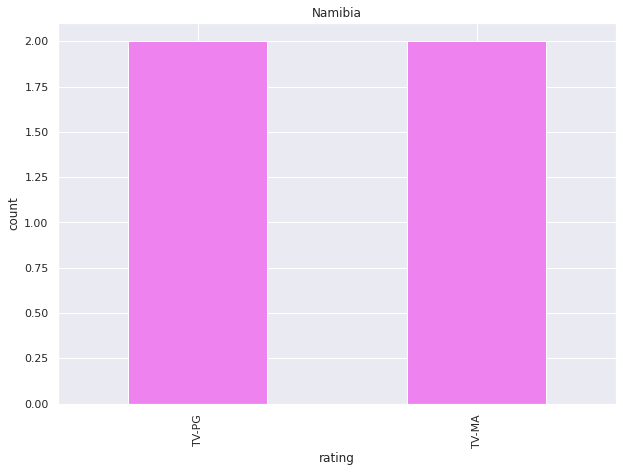

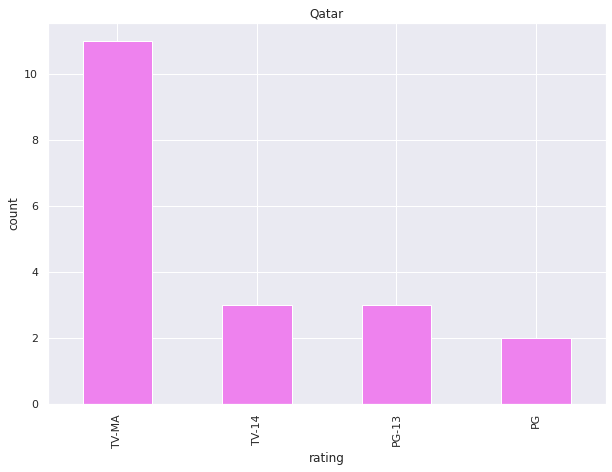

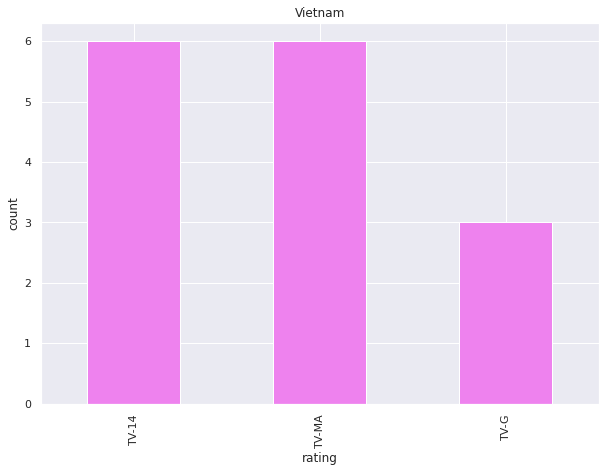

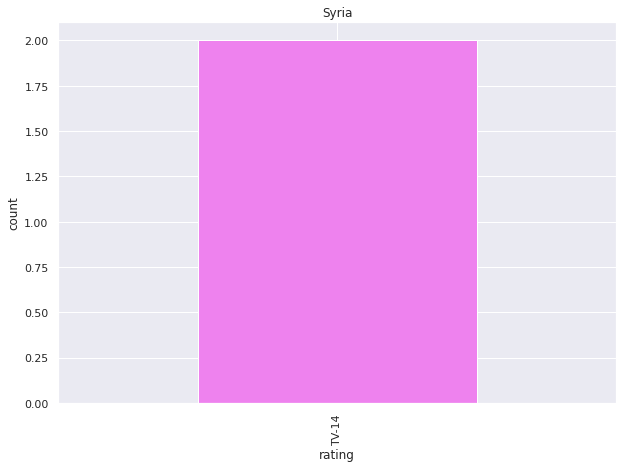

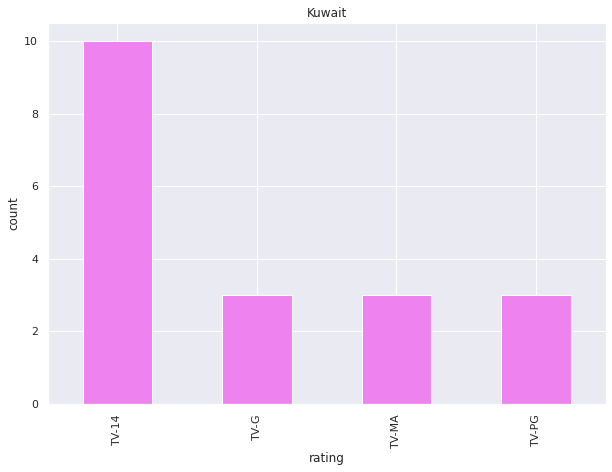

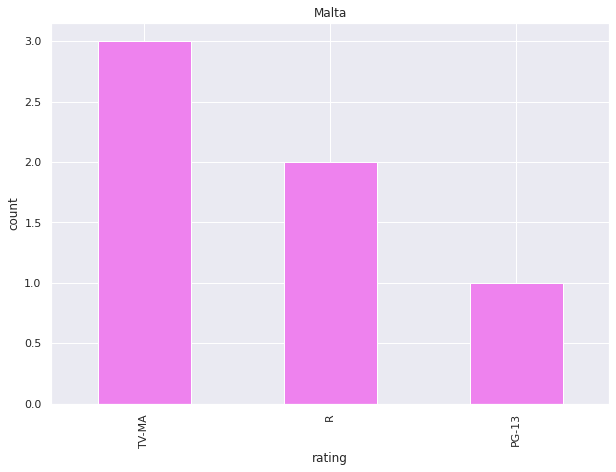

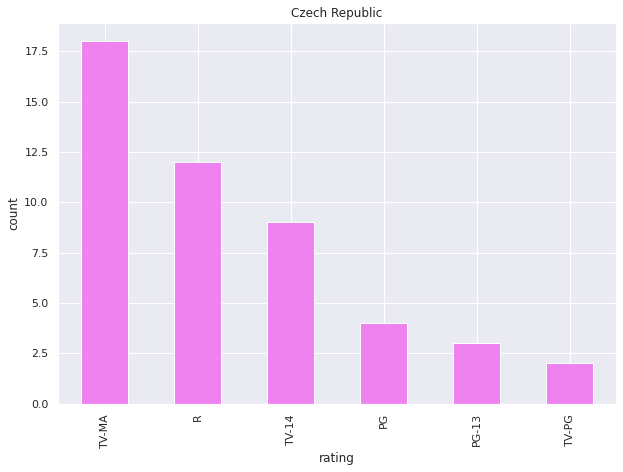

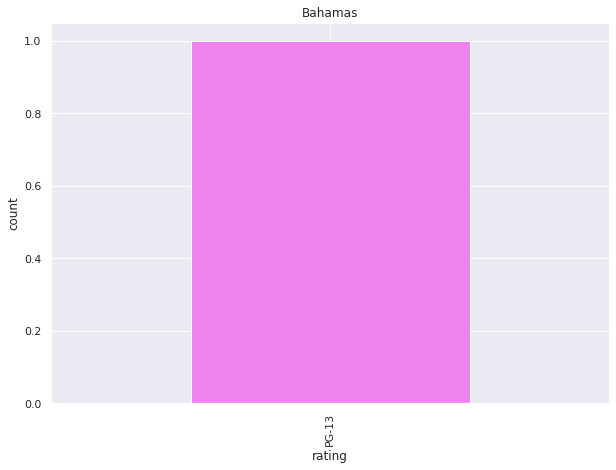

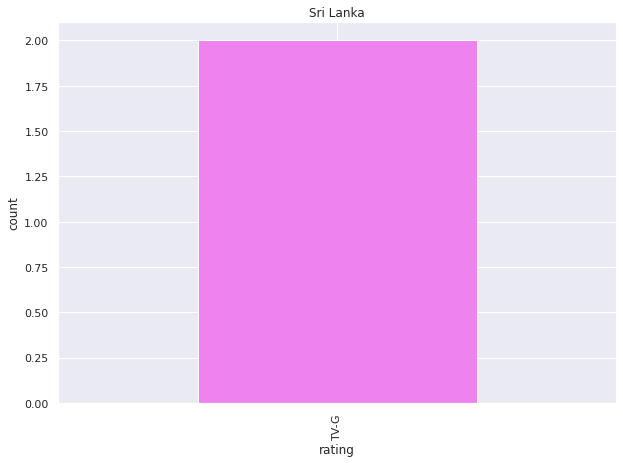

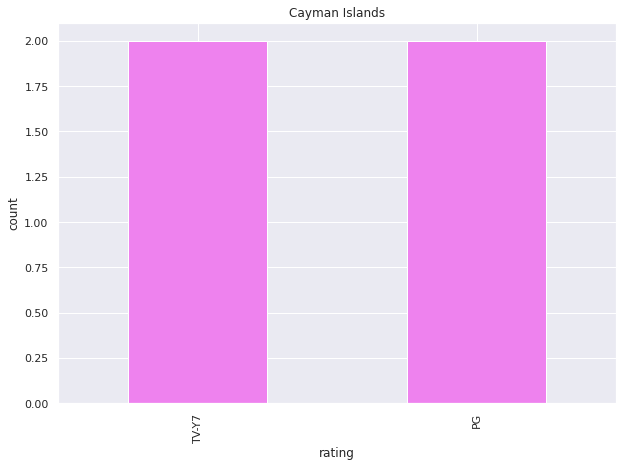

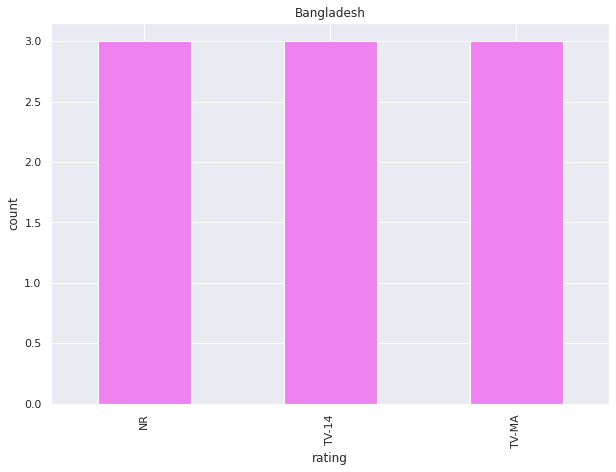

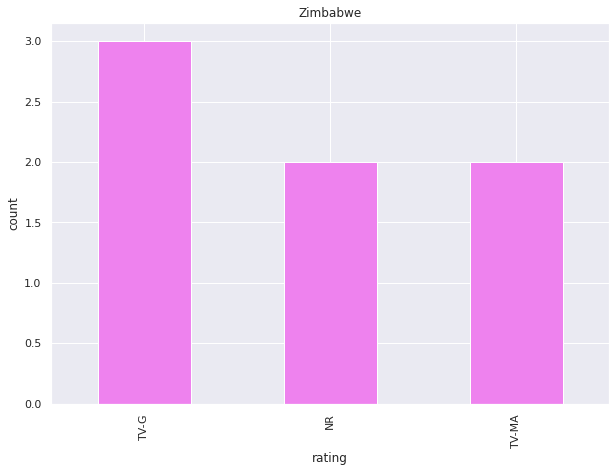

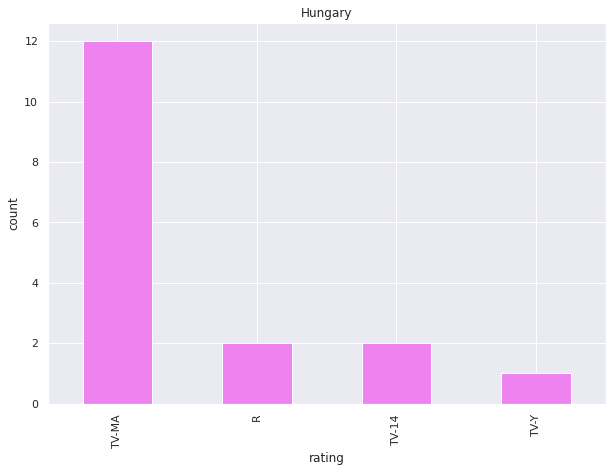

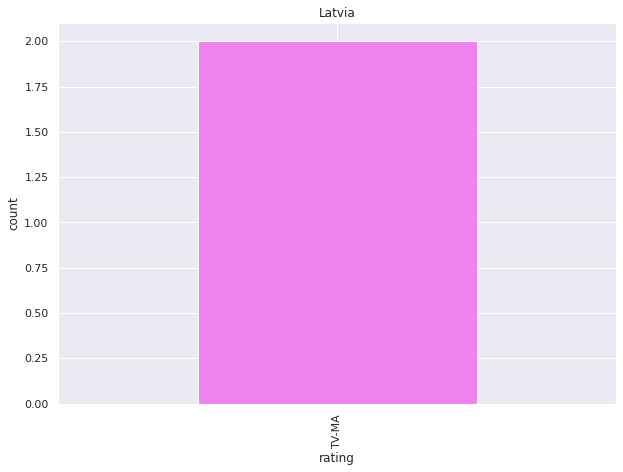

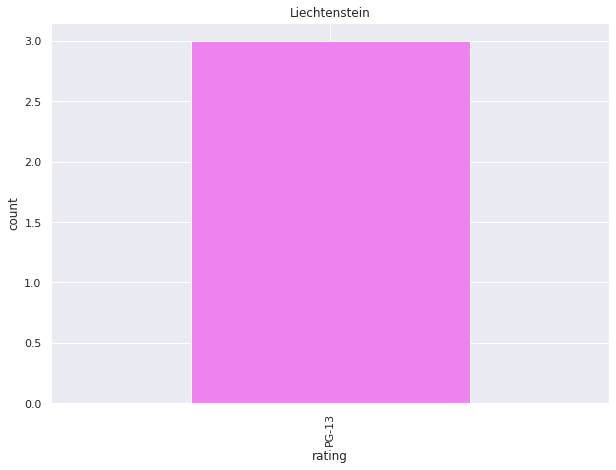

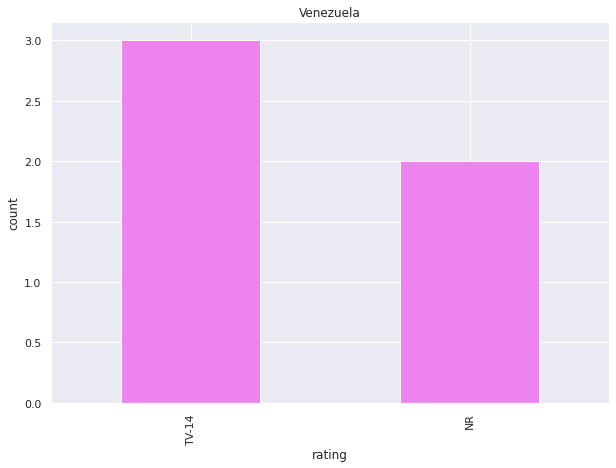

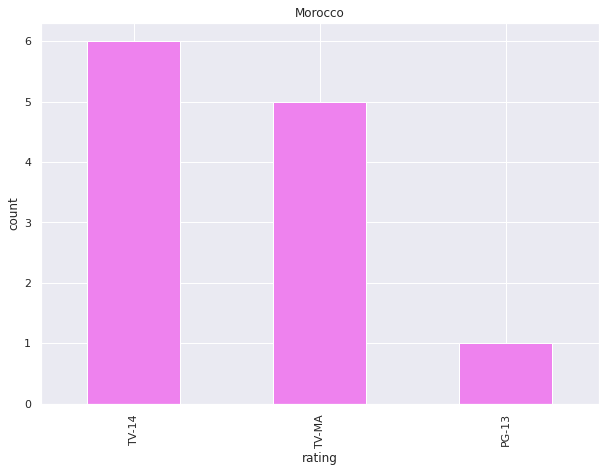

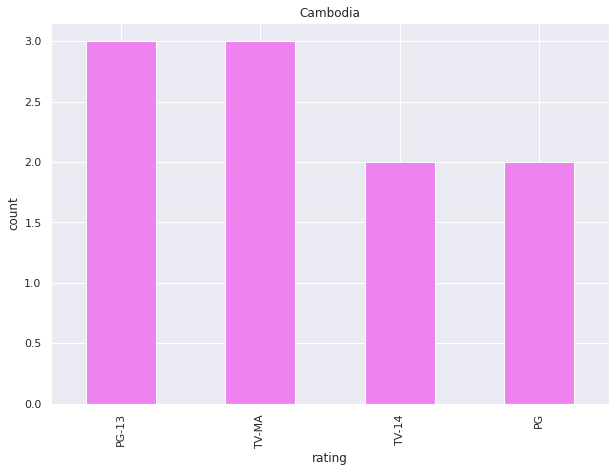

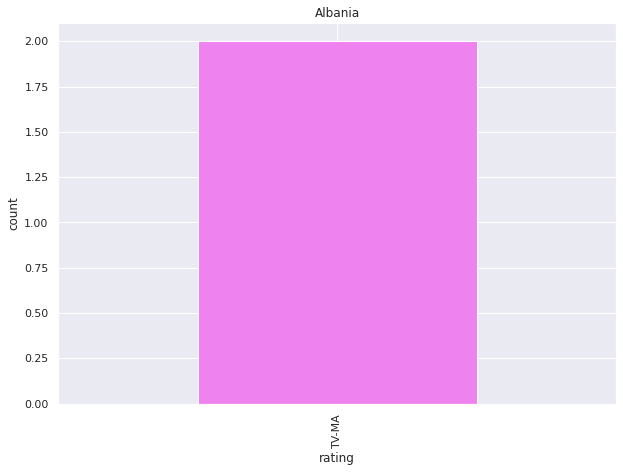

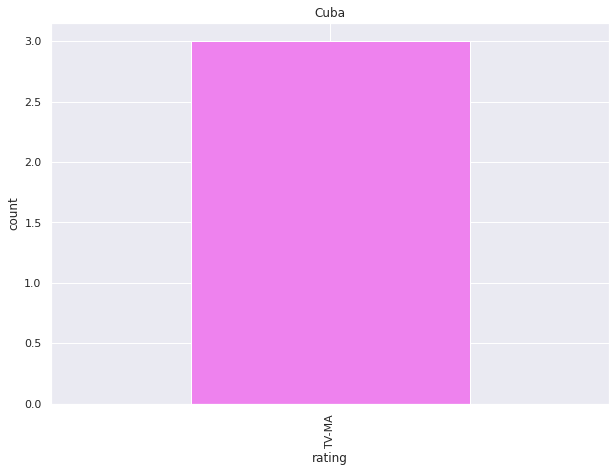

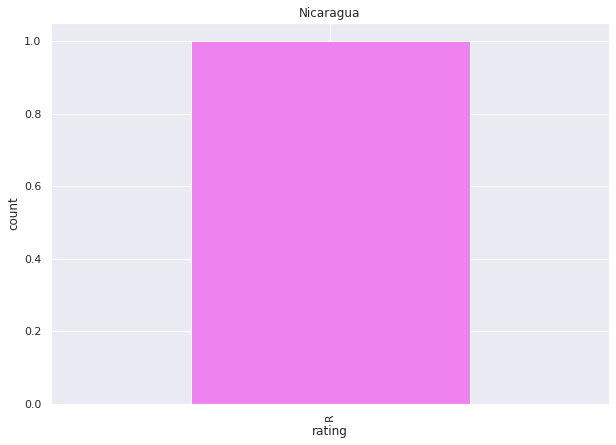

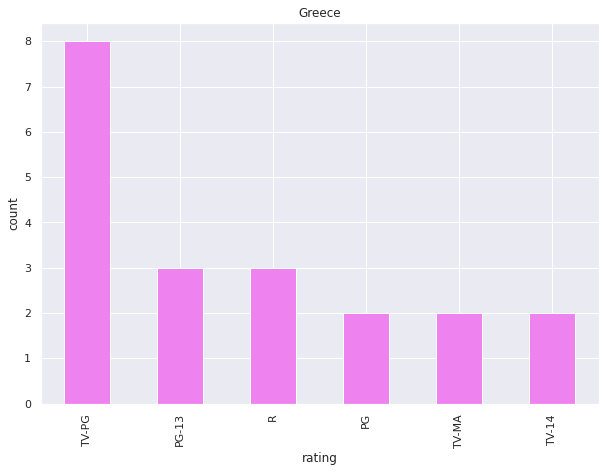

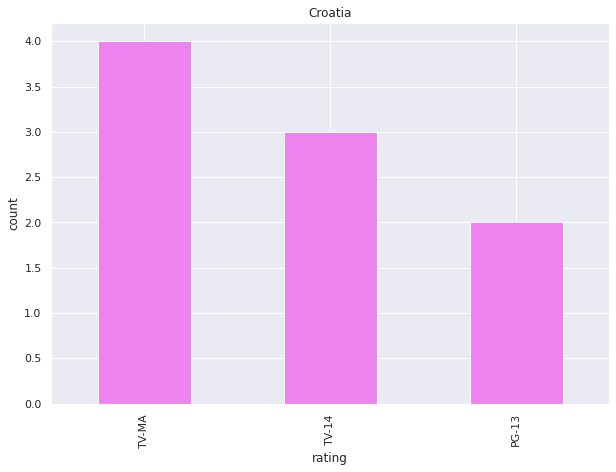

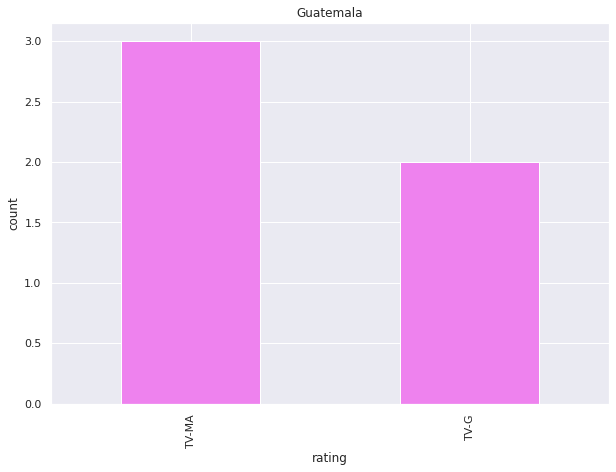

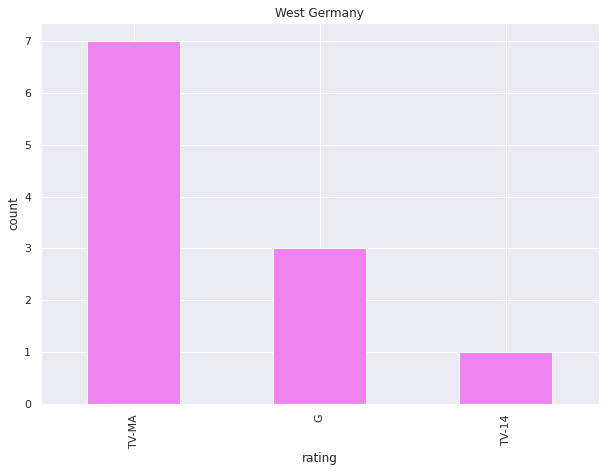

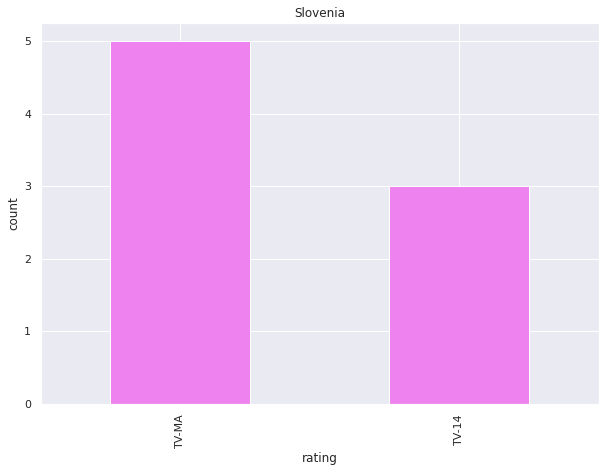

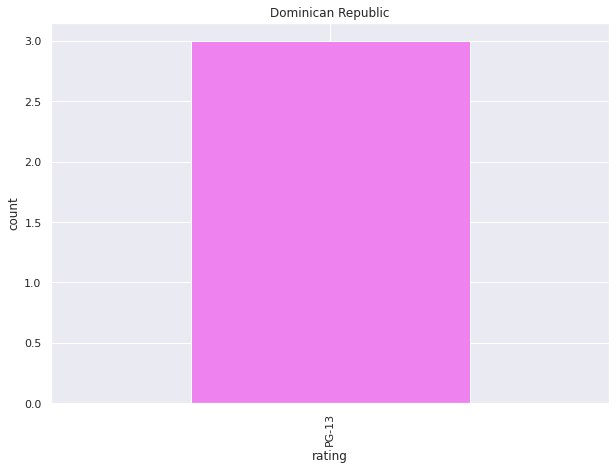

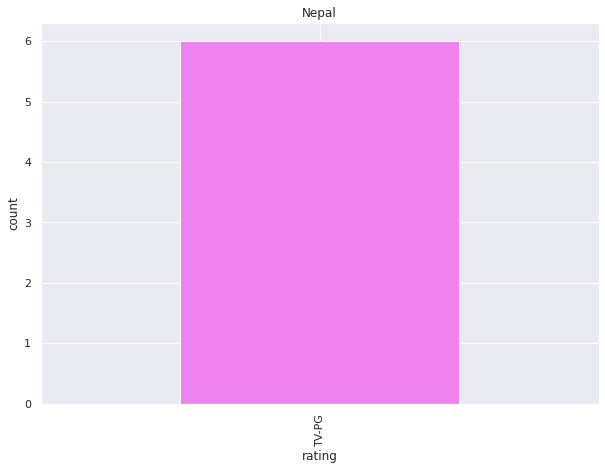

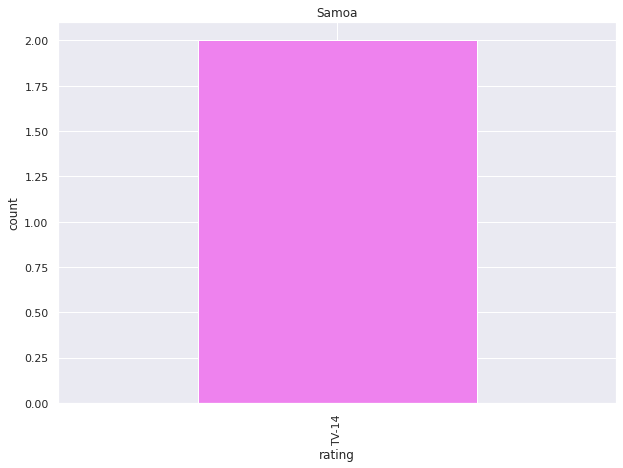

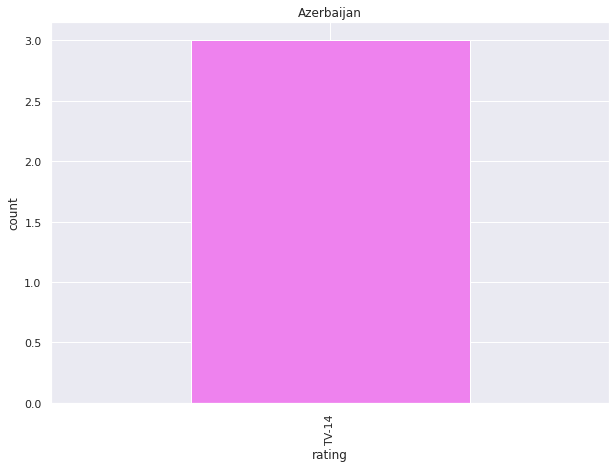

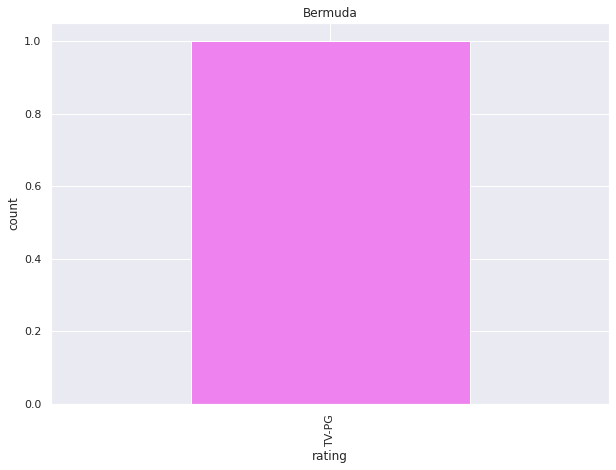

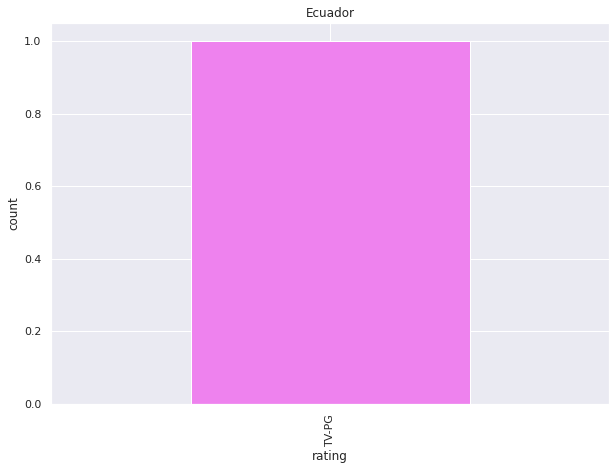

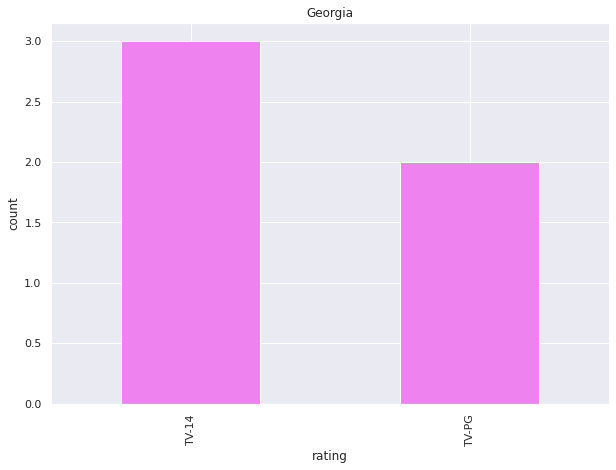

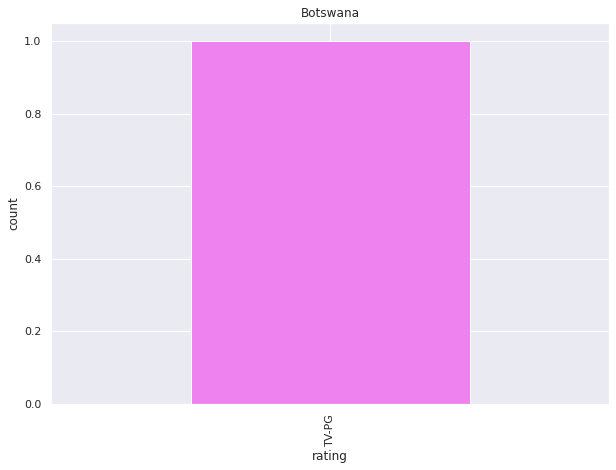

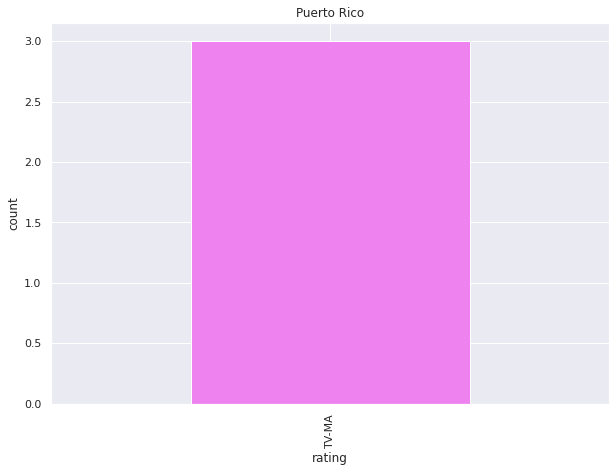

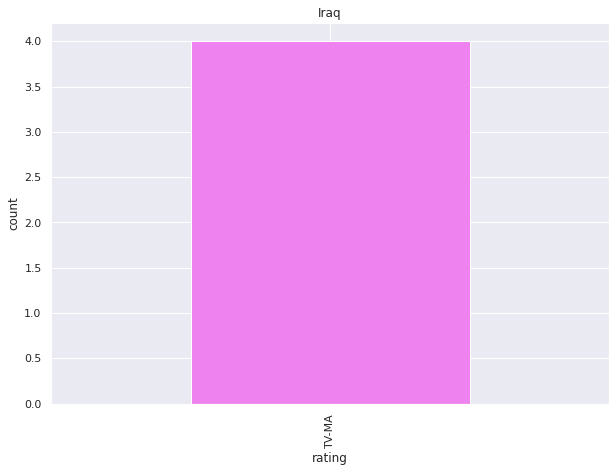

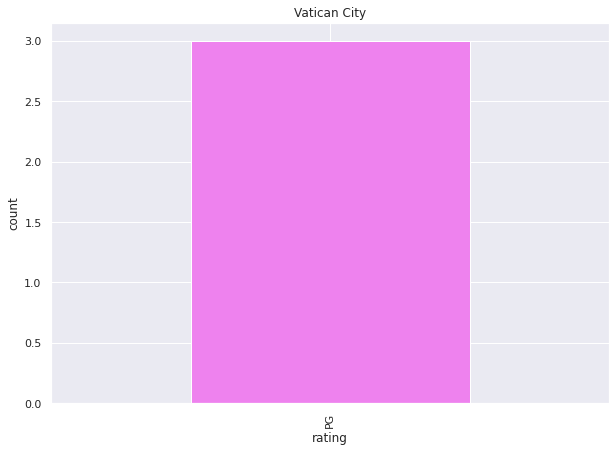

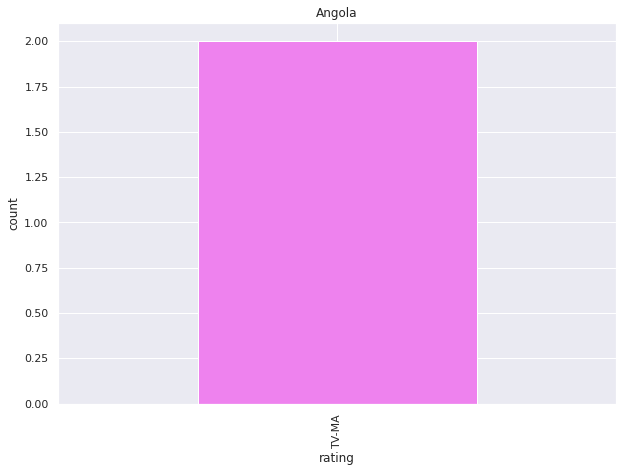

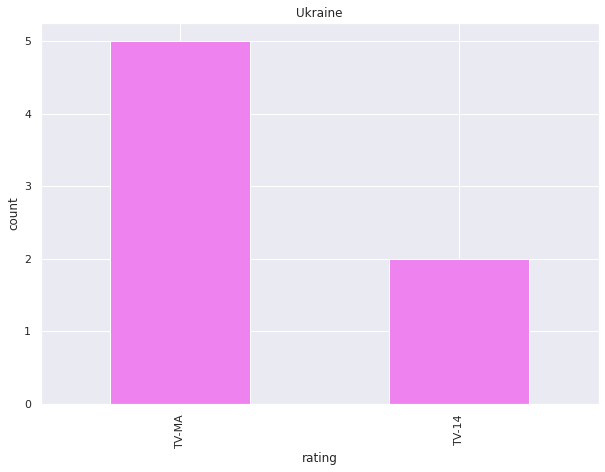

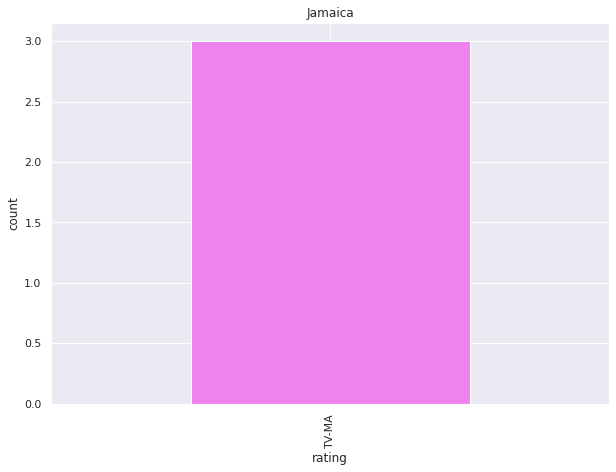

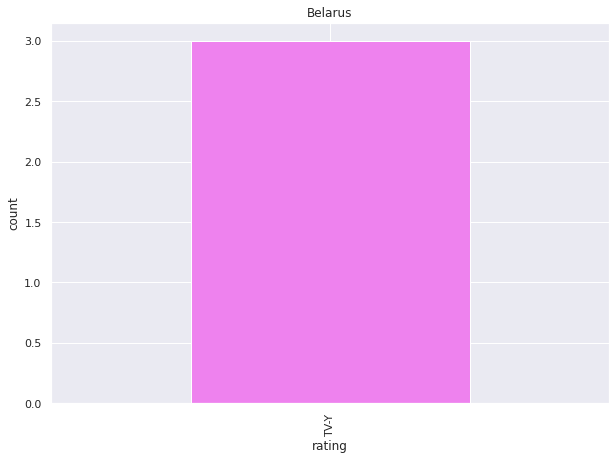

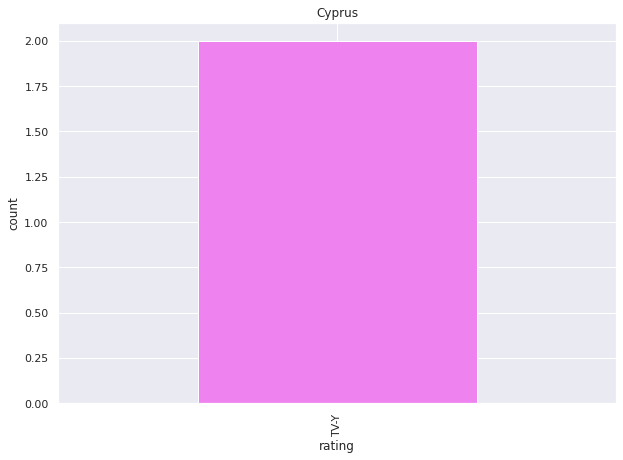

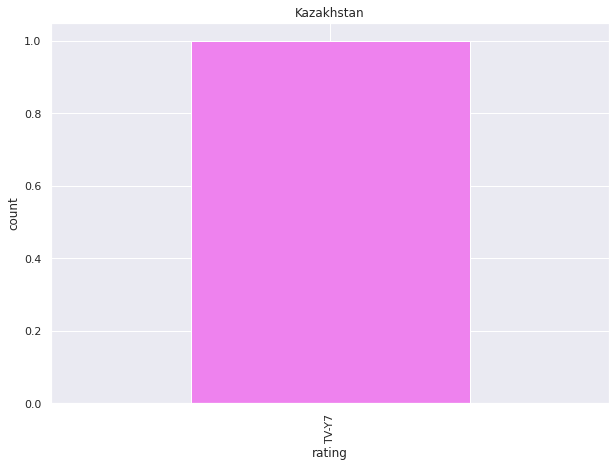

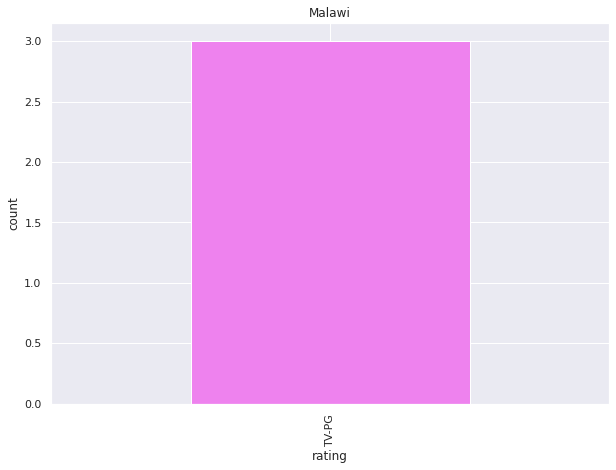

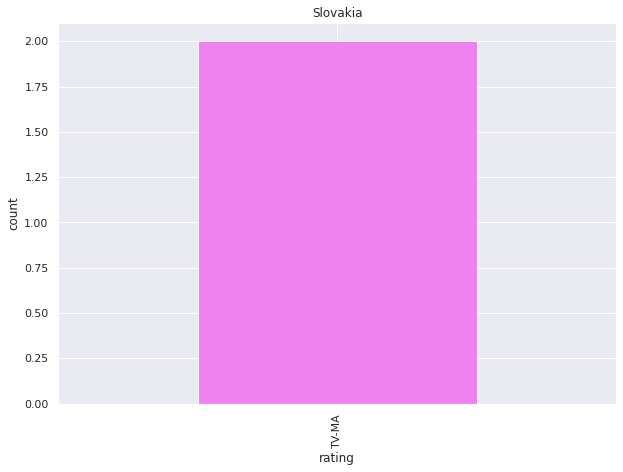

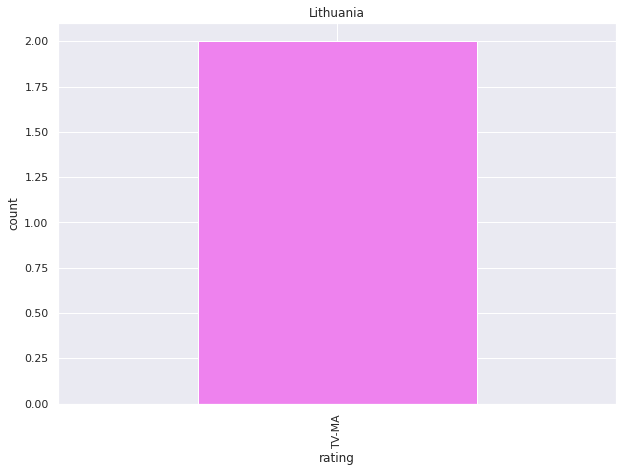

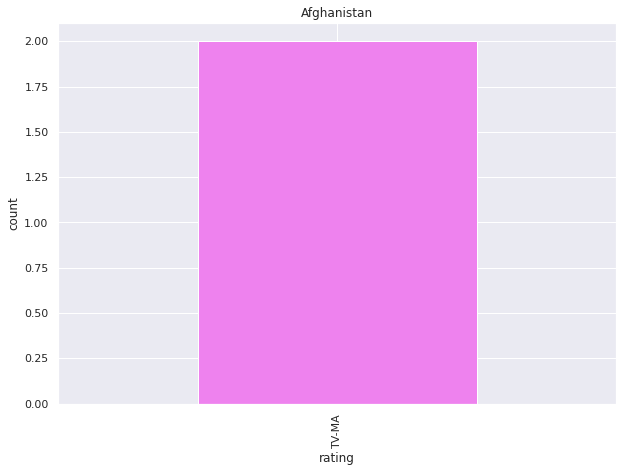

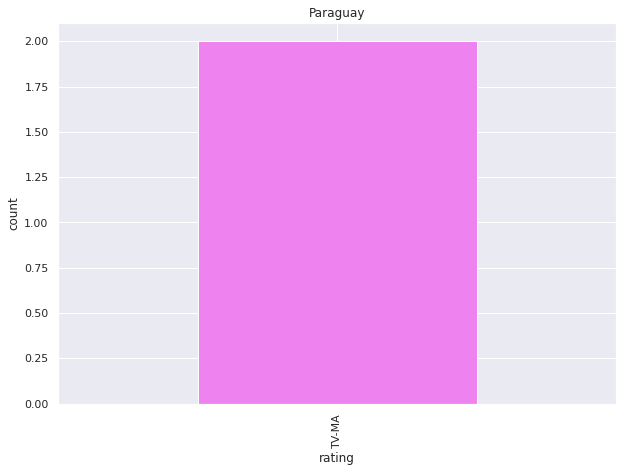

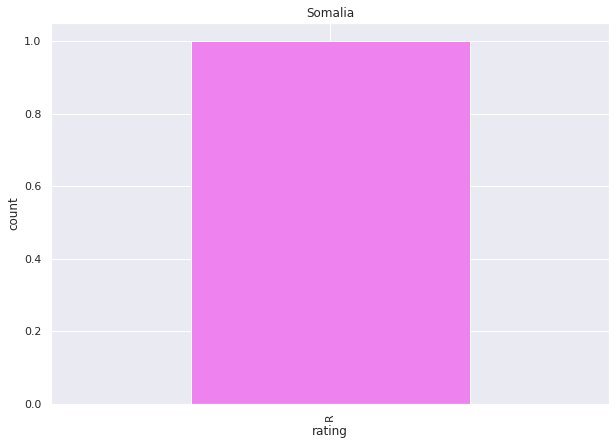

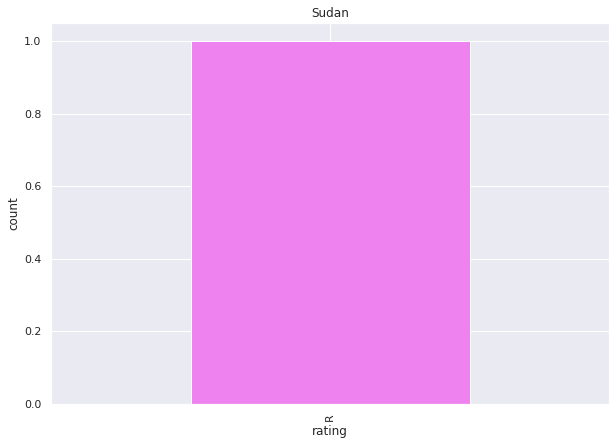

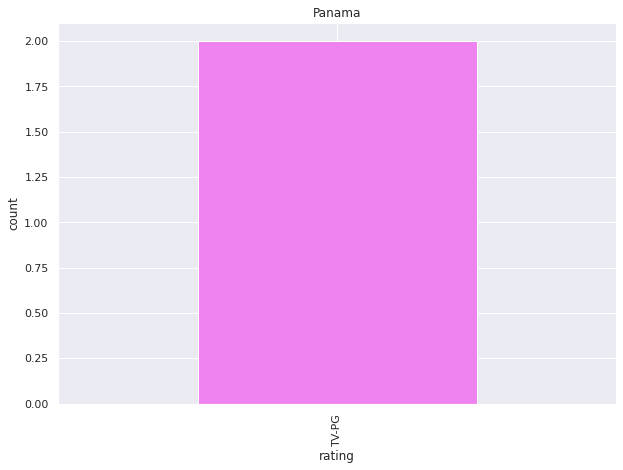

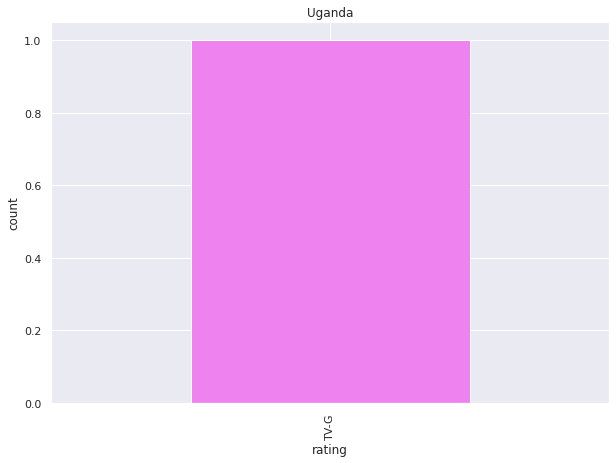

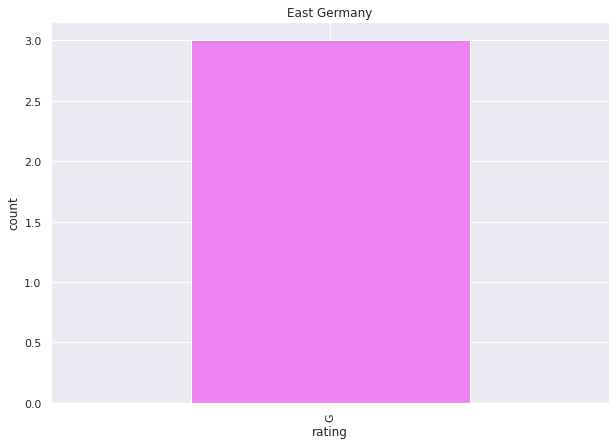

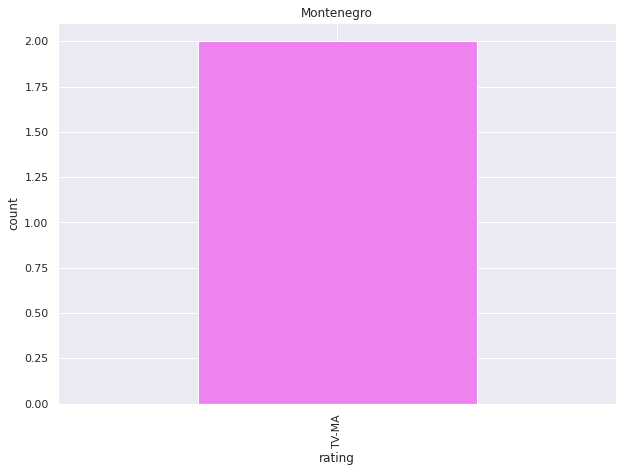

In [123]:
#Plotting each contriwise content rating distribution.
for cont in distinct_country:
  cg_df[cg_df['country_list'].str.replace(",","") == cont]['rating'].value_counts().plot(kind = "bar", figsize = (10,7), color = 'violet')
  plt.title(cont)
  plt.xlabel('rating')
  plt.ylabel('count')
  plt.show()
  print("\n")

Above list of graphs clearly shows the country wise listing in each content rating.
We can draw lots of useful insights from the above graphs -
*  Countries like Brazil, Mexico, United States, Turkey, Egypt, Poland, United Kingdom, Canada etc have produced more number of adult content movie/shows.
*   Countries like India, Singapore, Egypt, Nigeria, Indonesia, Hong Kong etc. are producing more contents which can be consumed by children above 14yrs age.



#### 3. country wise the type of content available

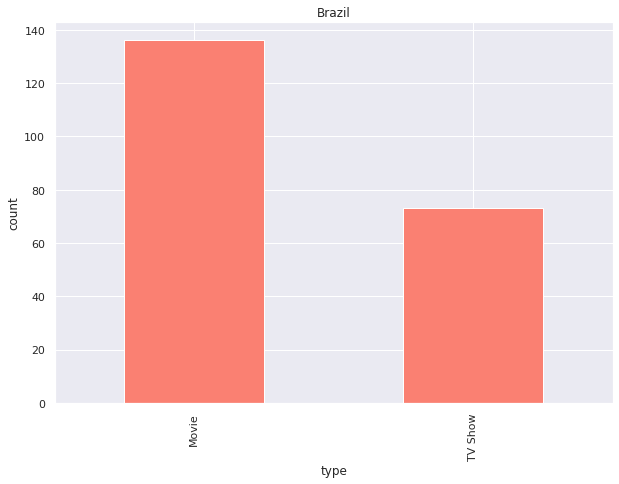

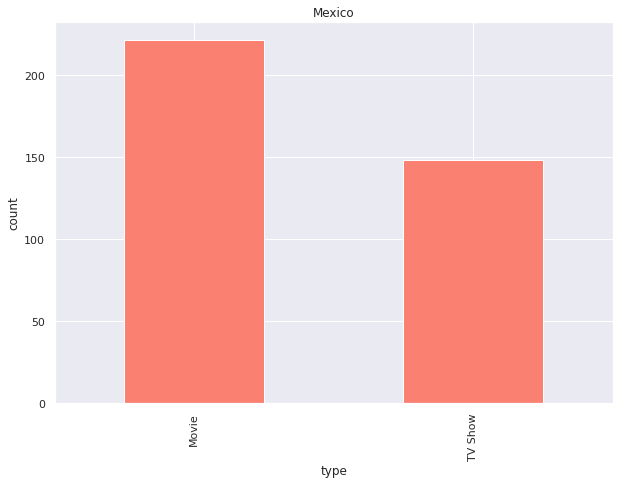

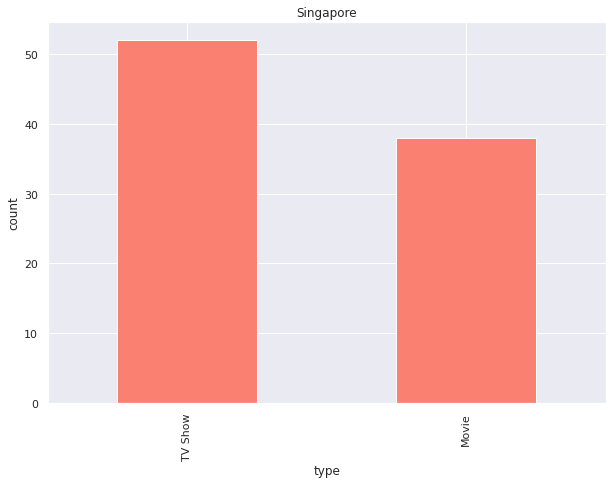

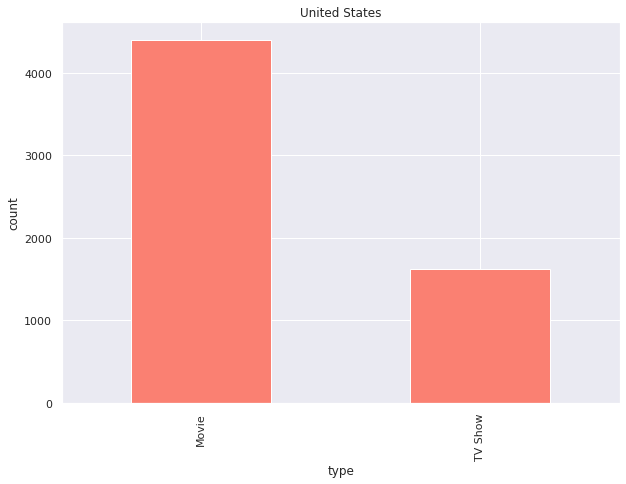

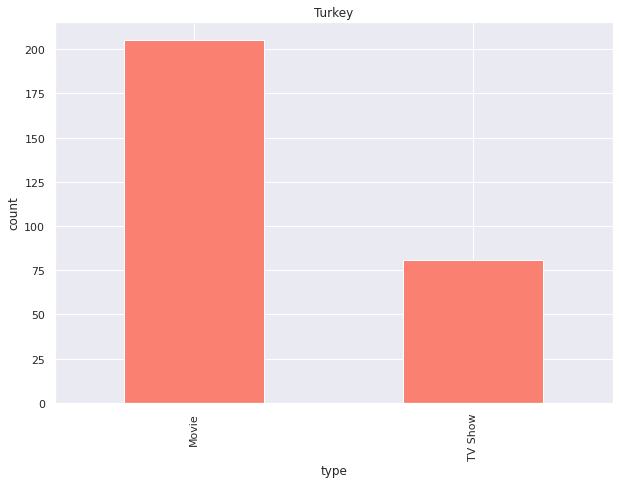

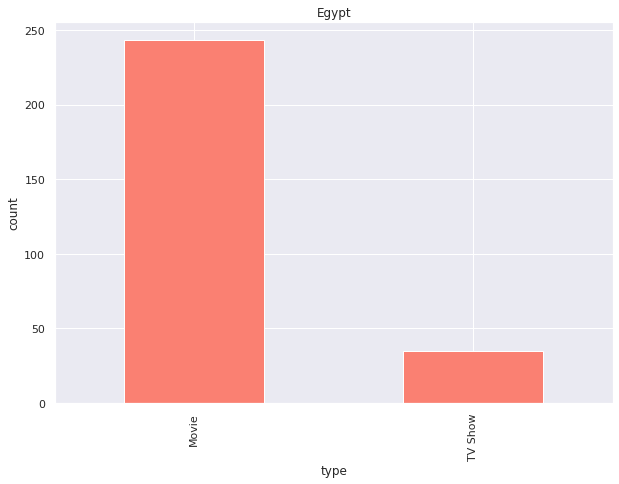

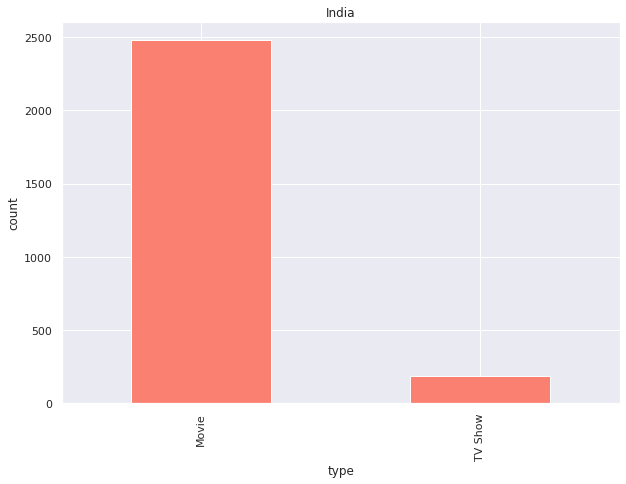

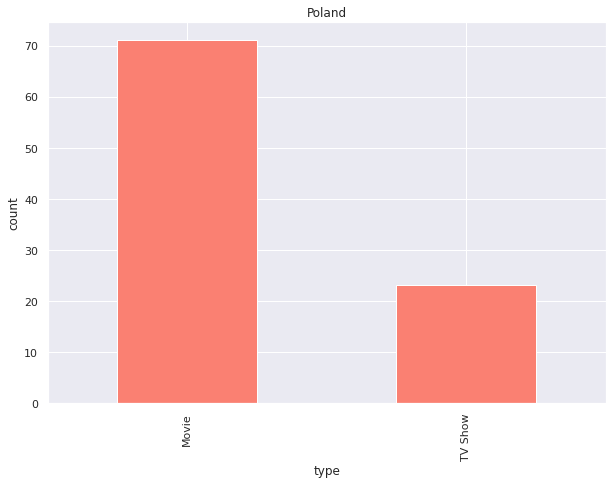

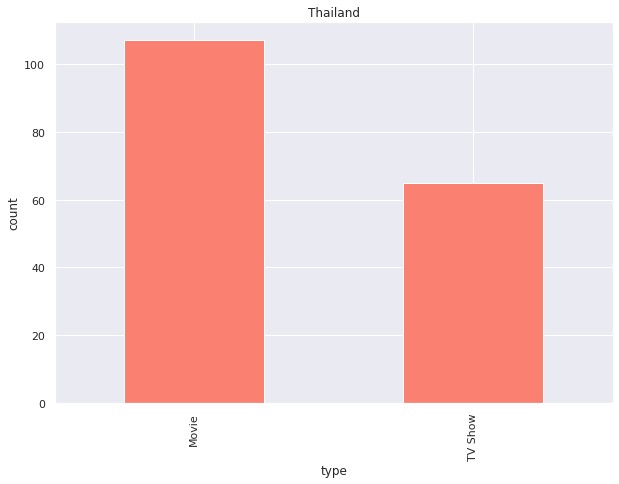

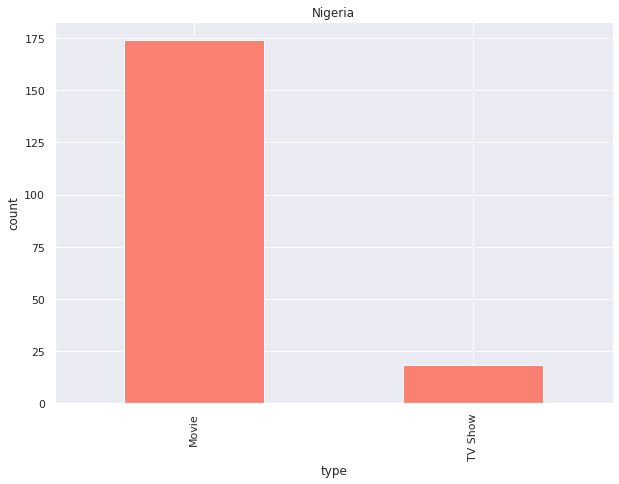

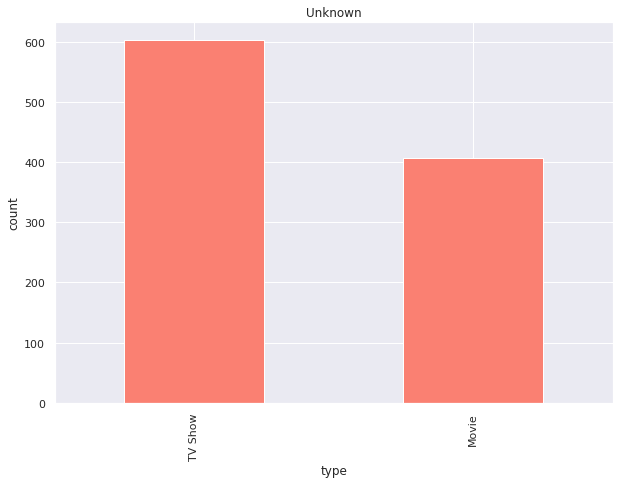

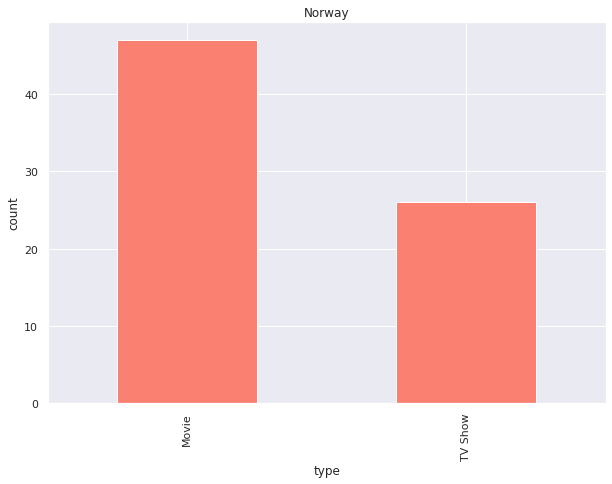

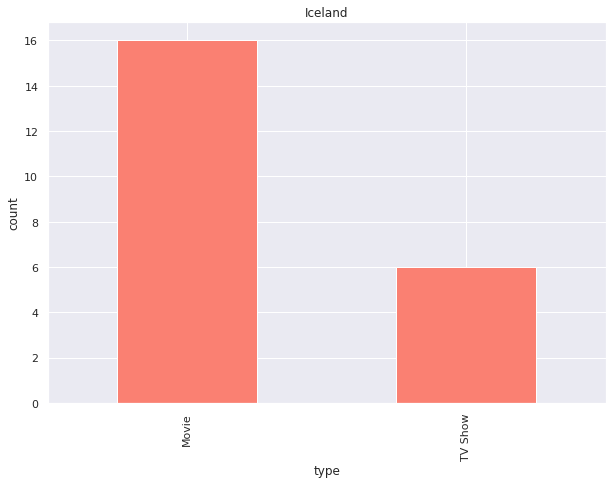

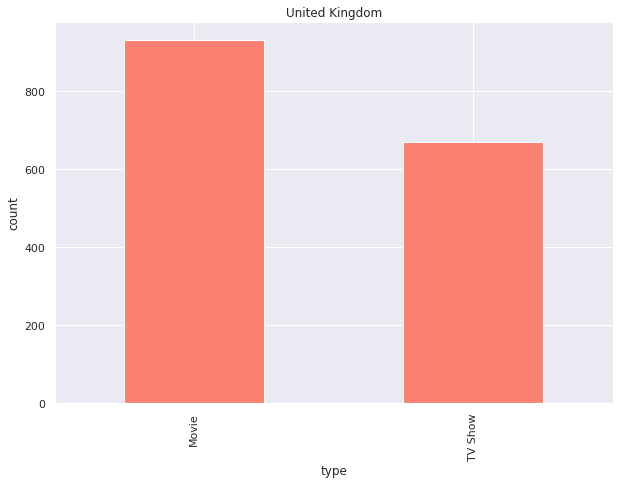

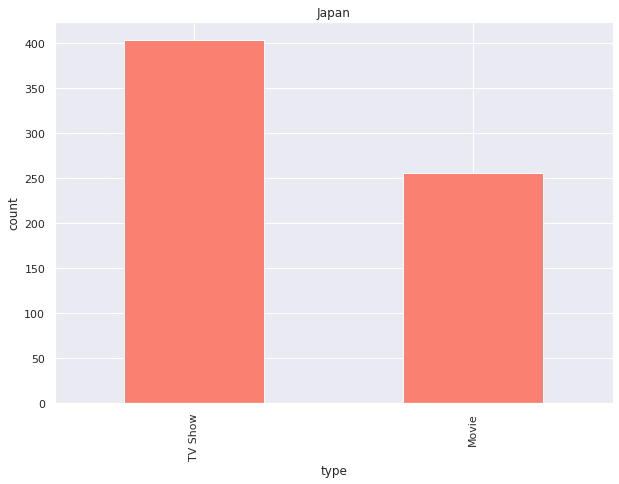

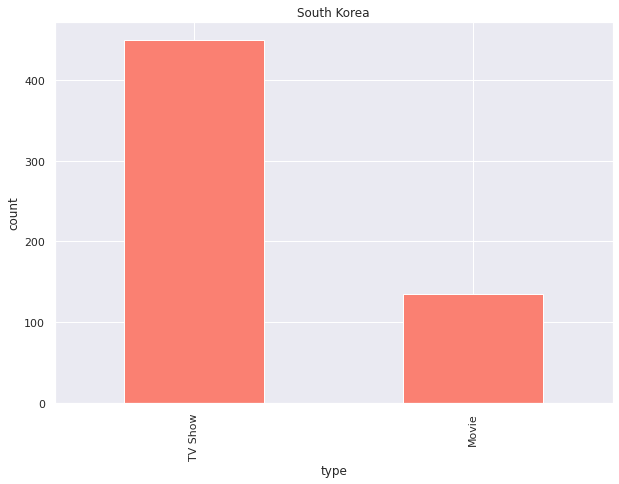

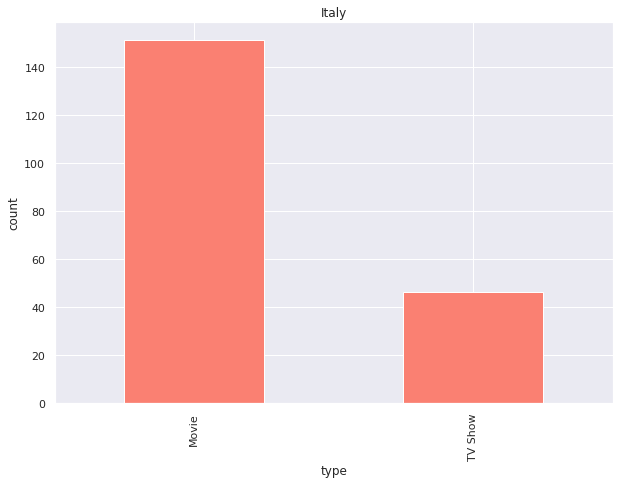

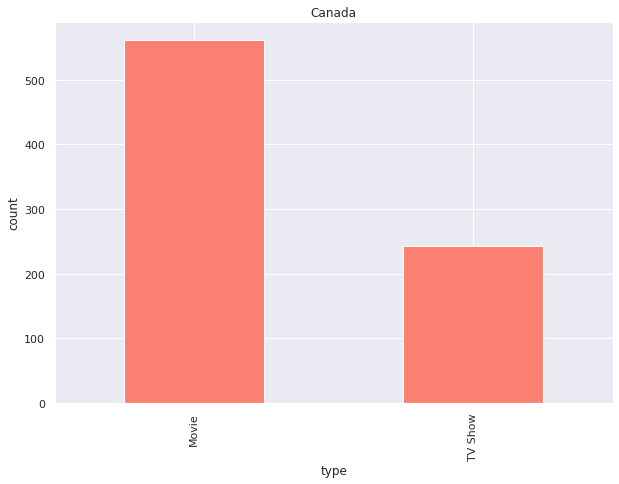

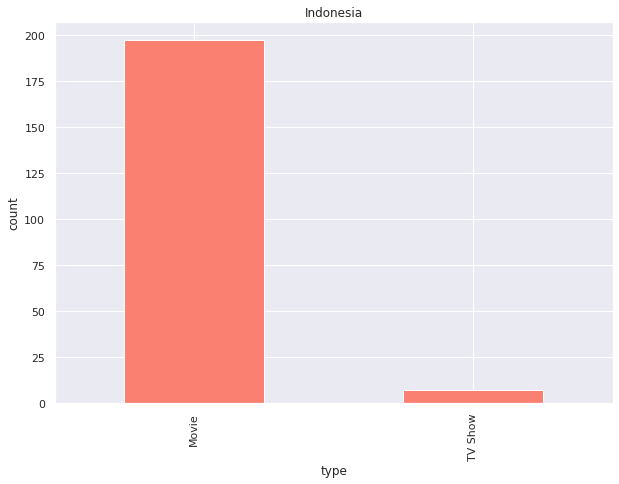

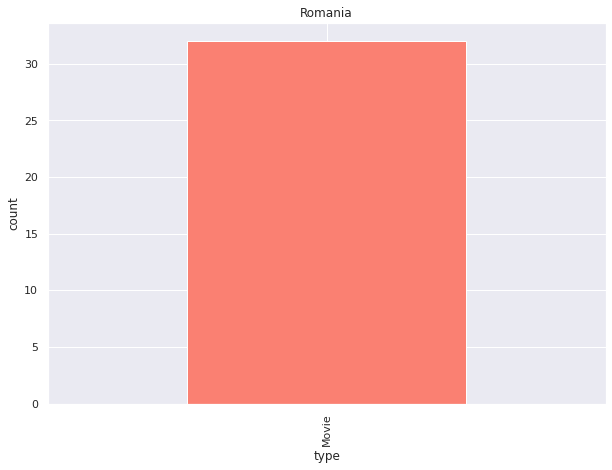

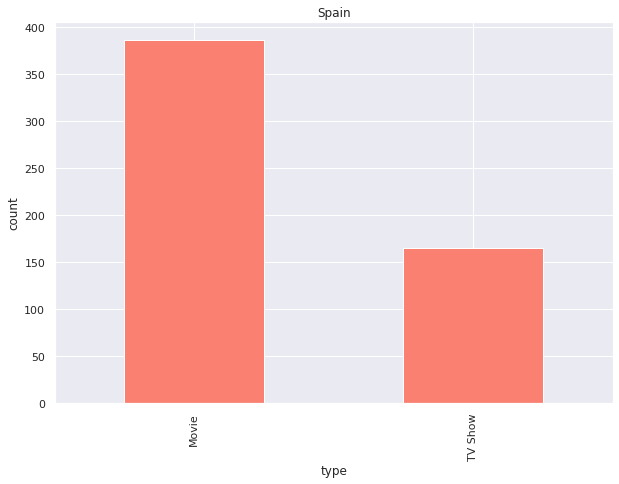

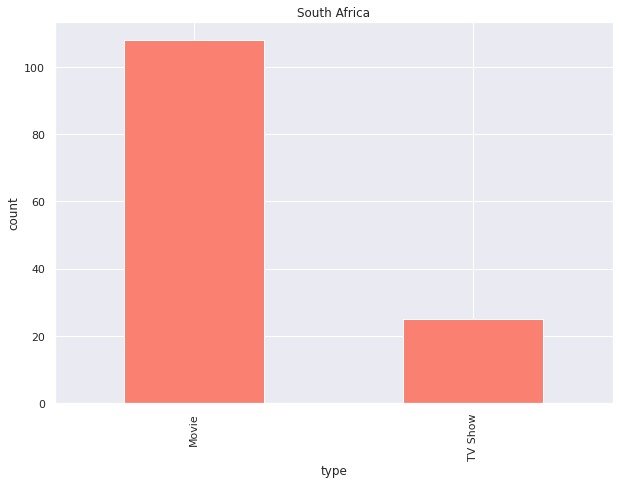

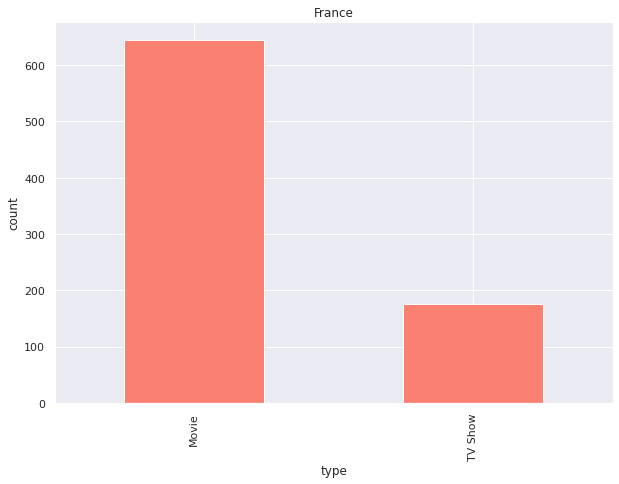

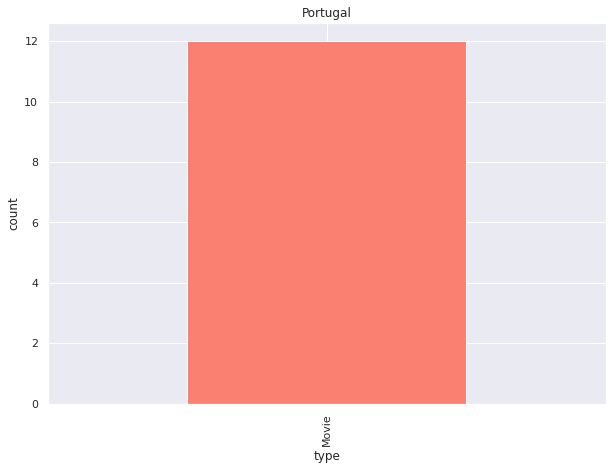

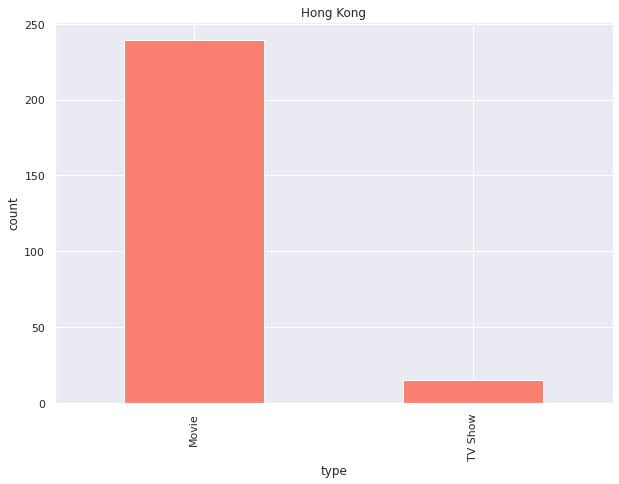

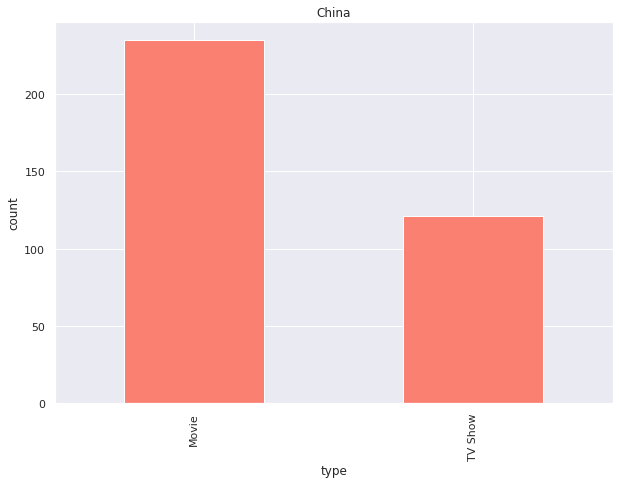

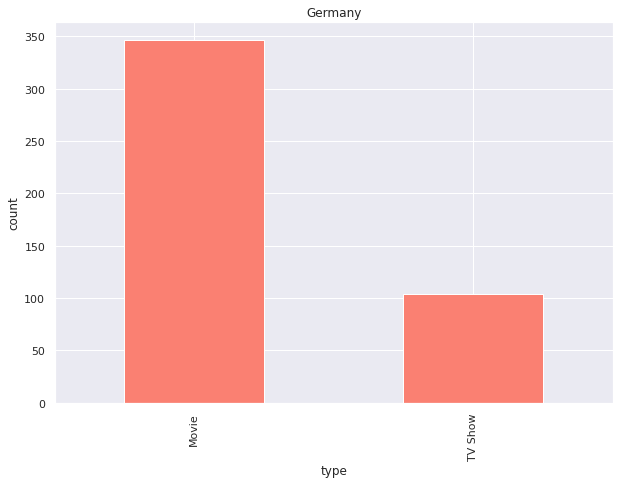

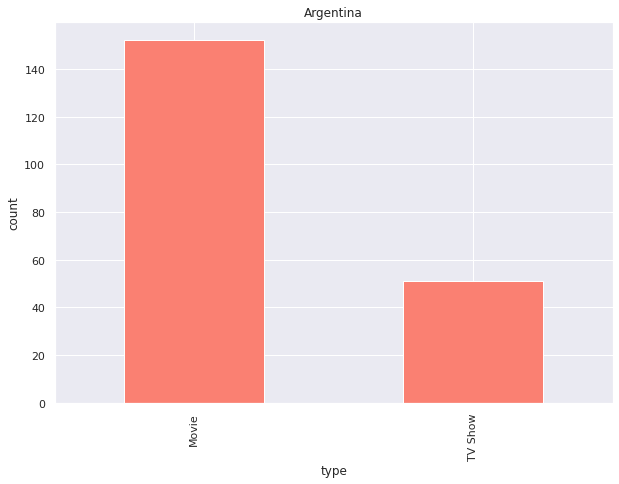

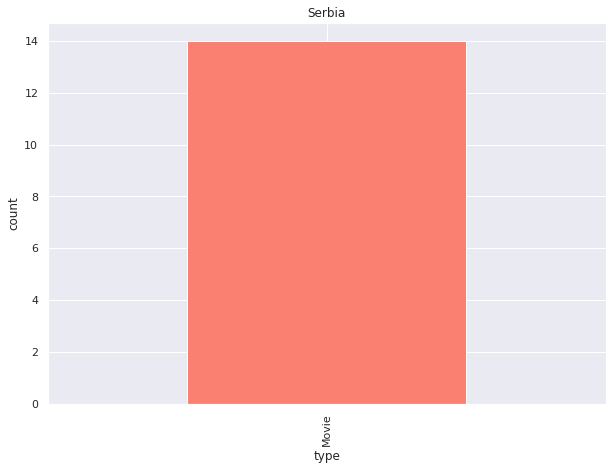

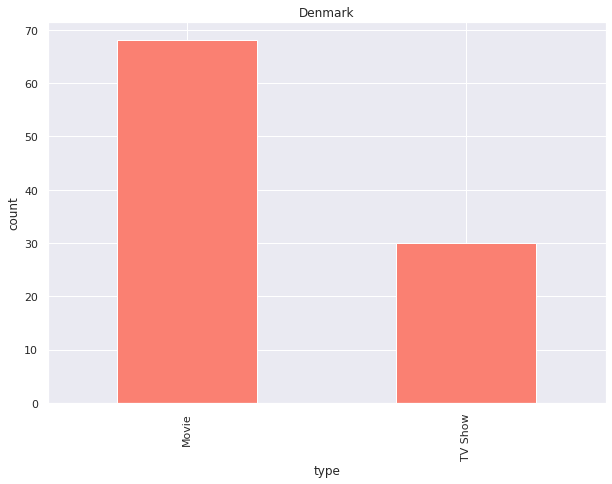

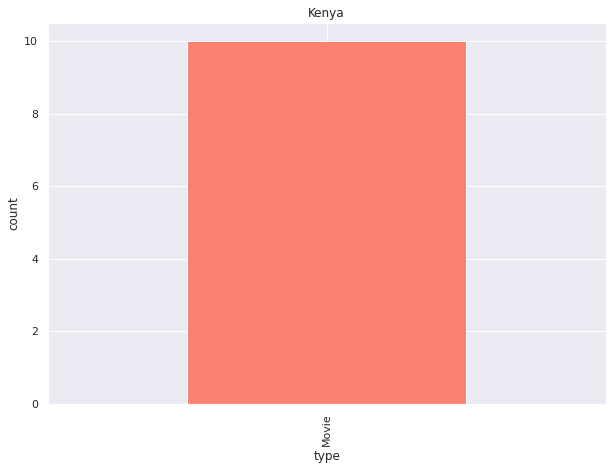

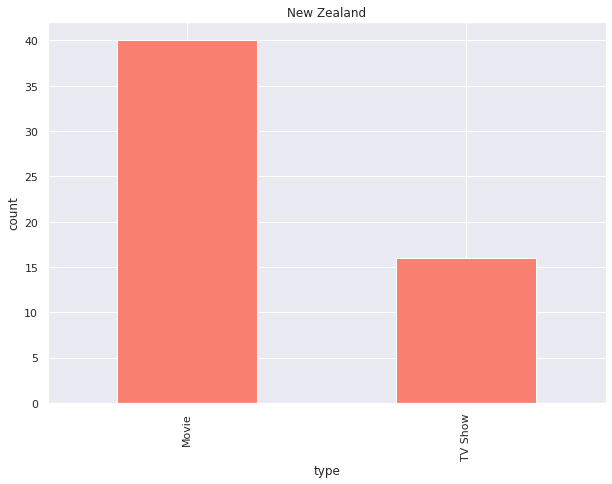

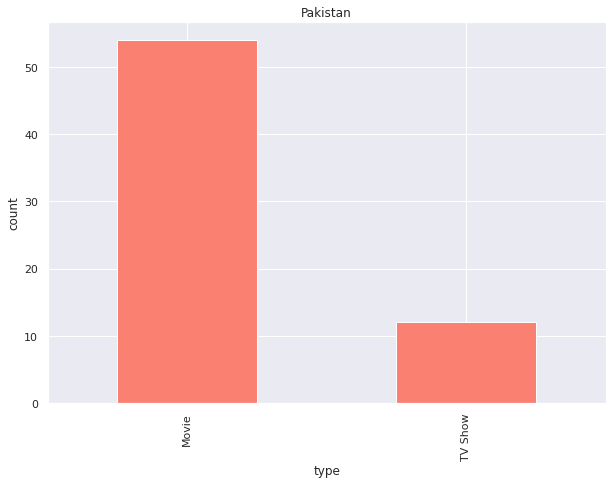

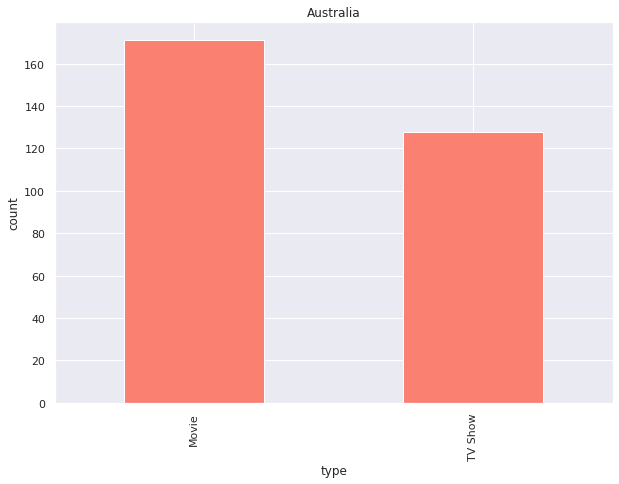

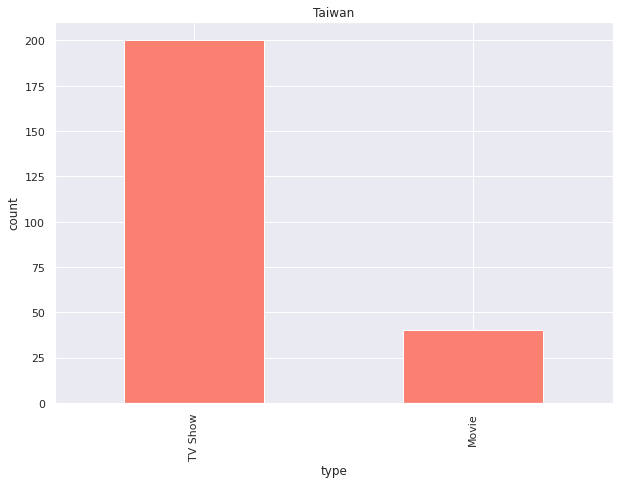

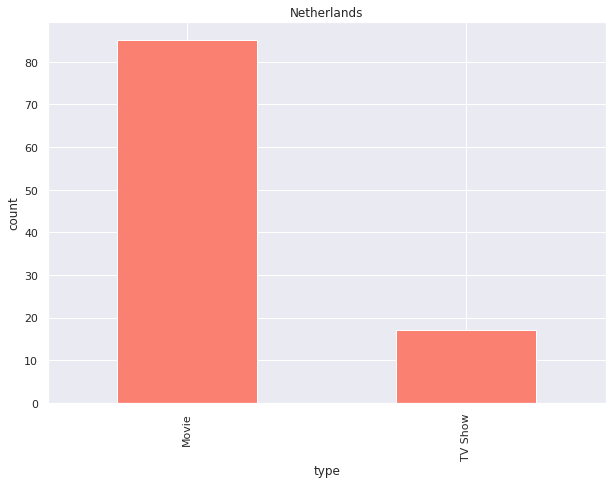

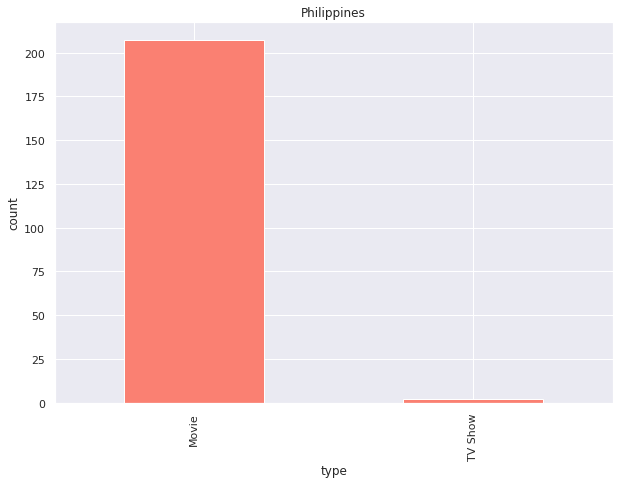

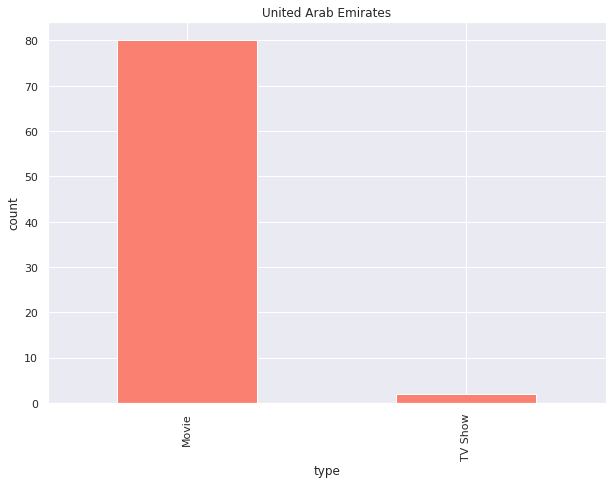

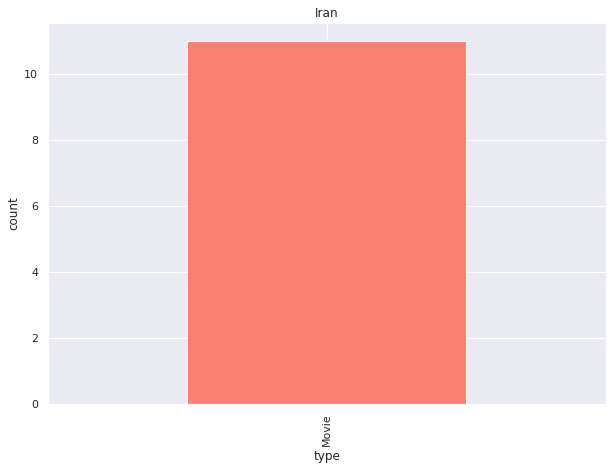

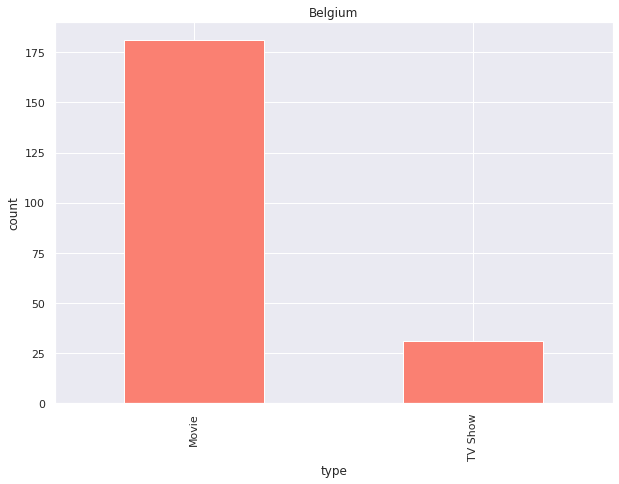

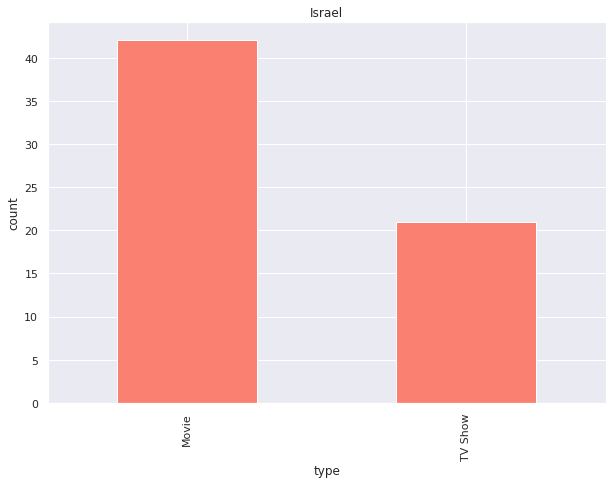

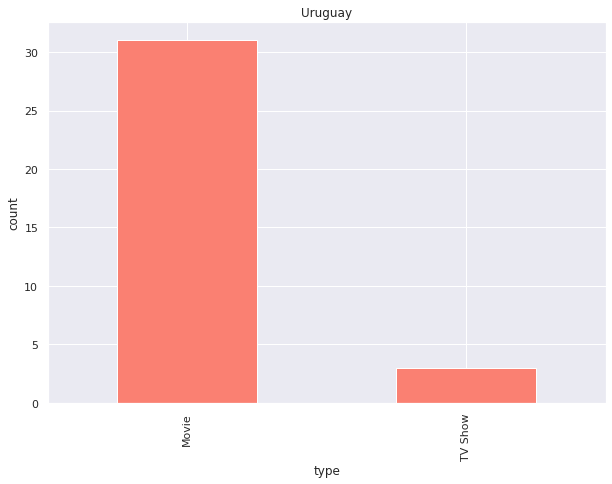

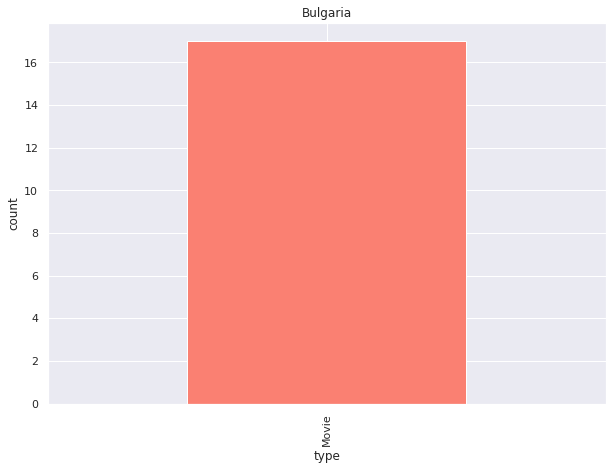

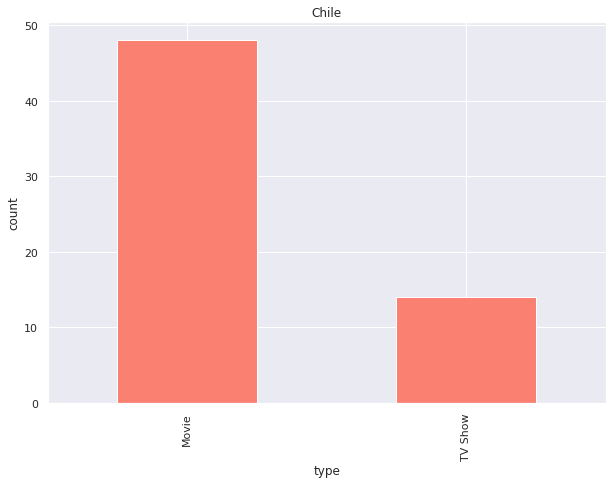

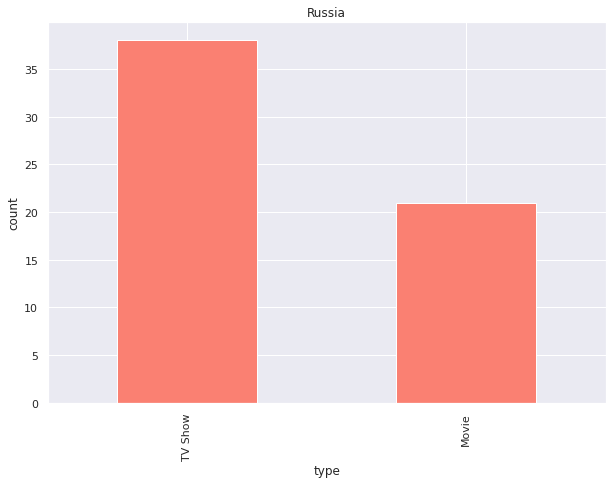

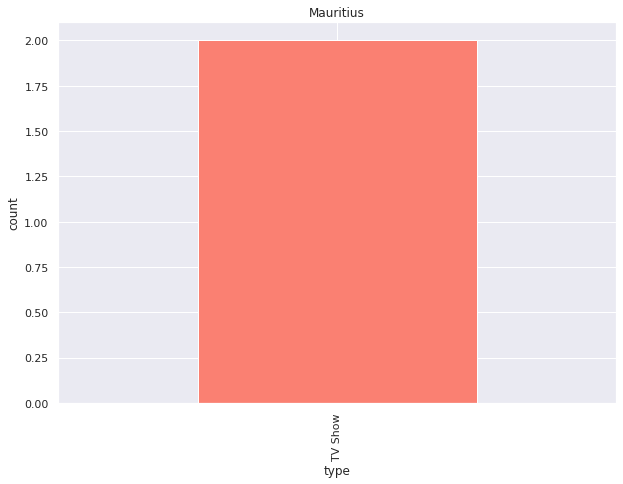

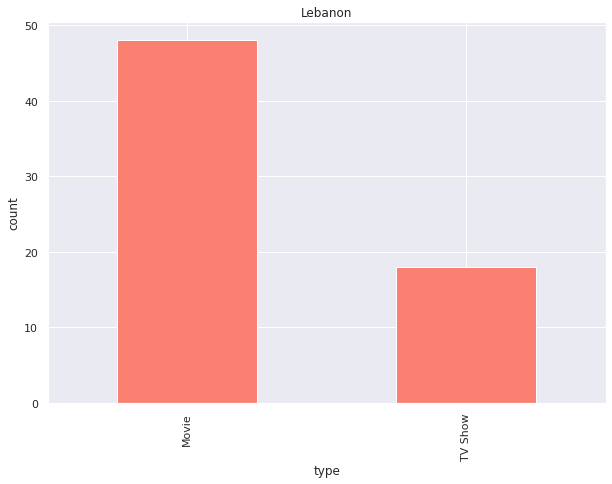

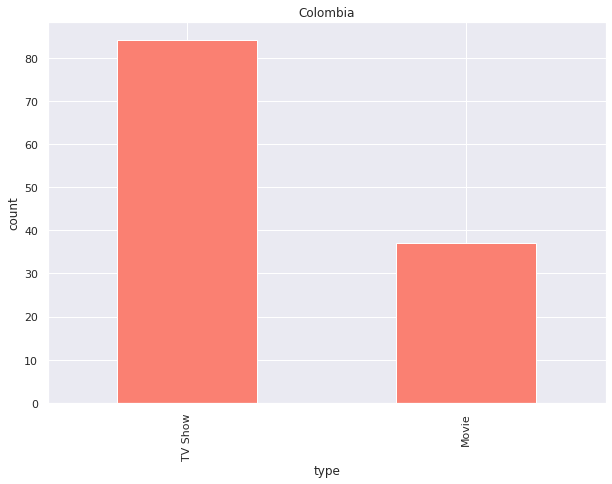

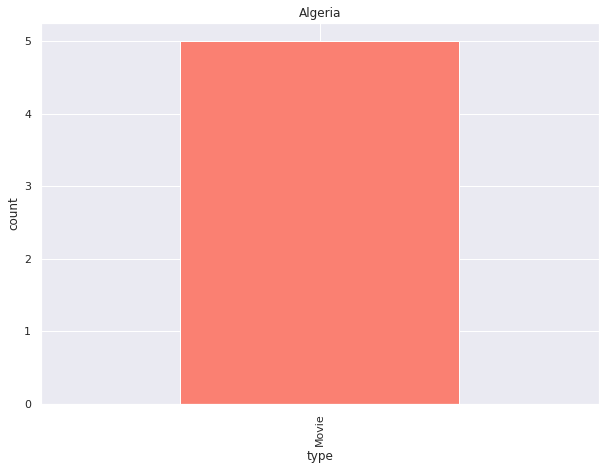

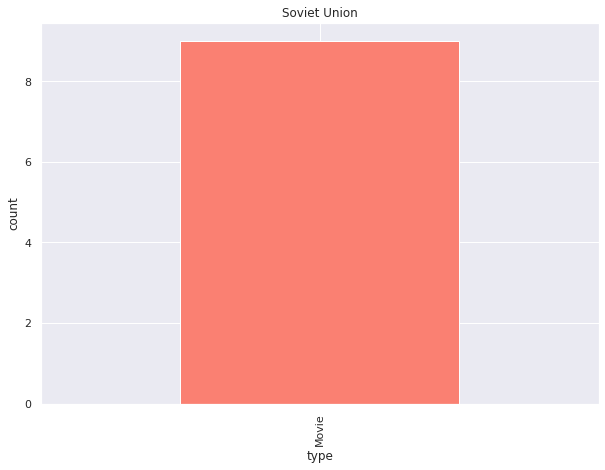

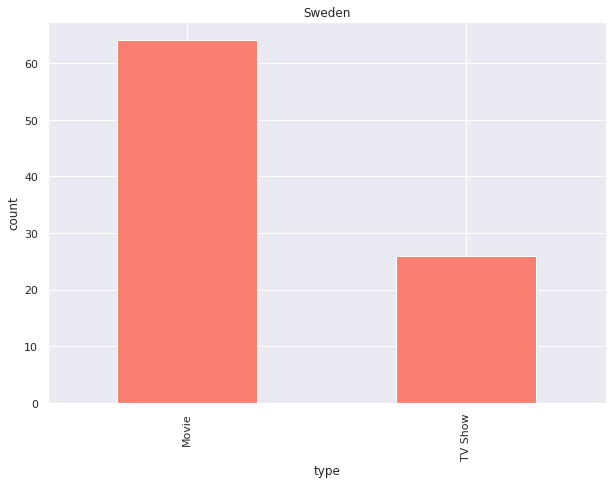

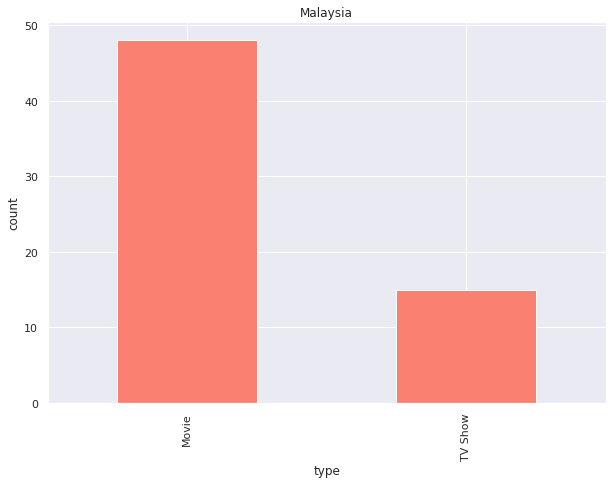

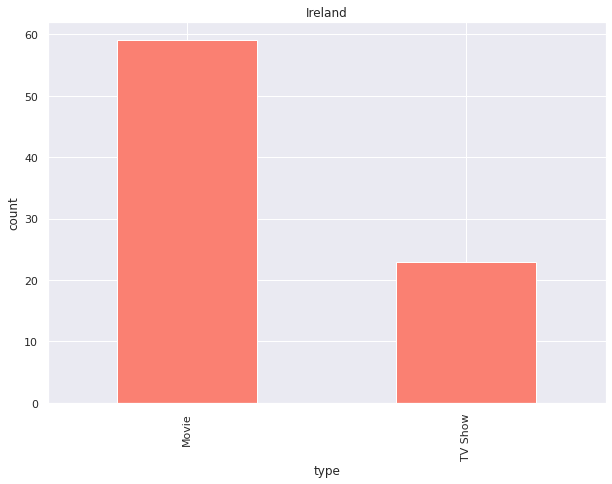

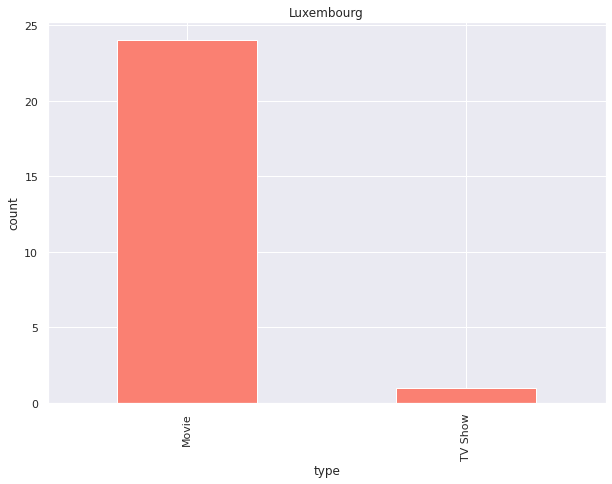

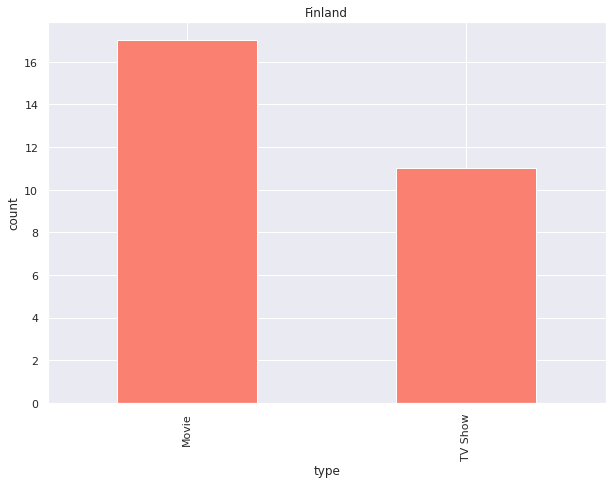

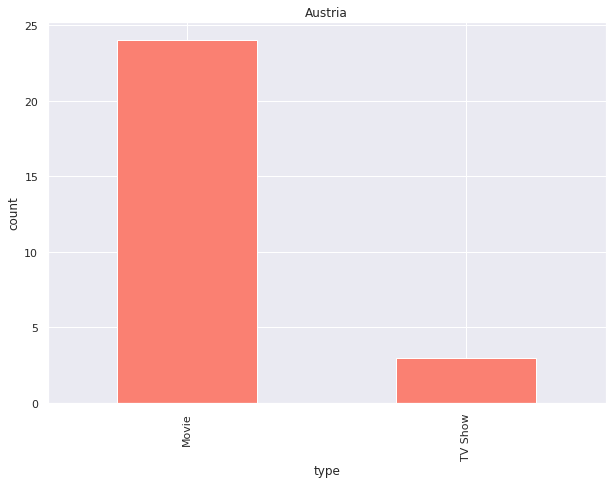

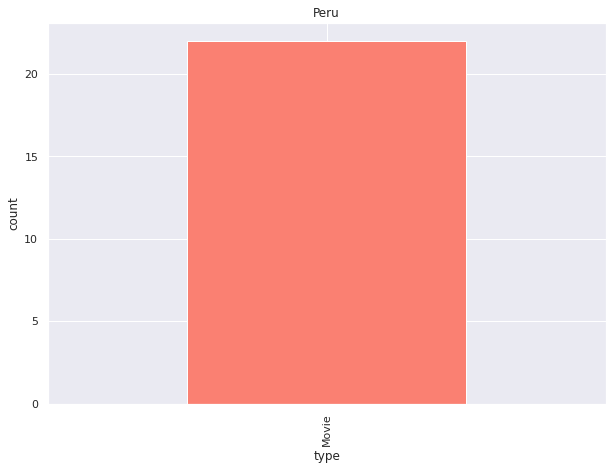

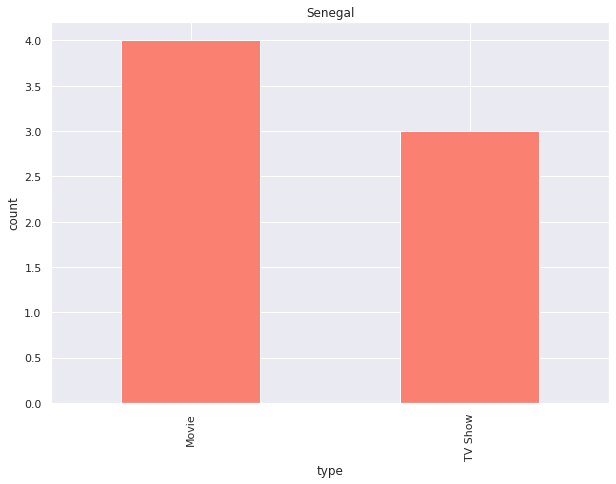

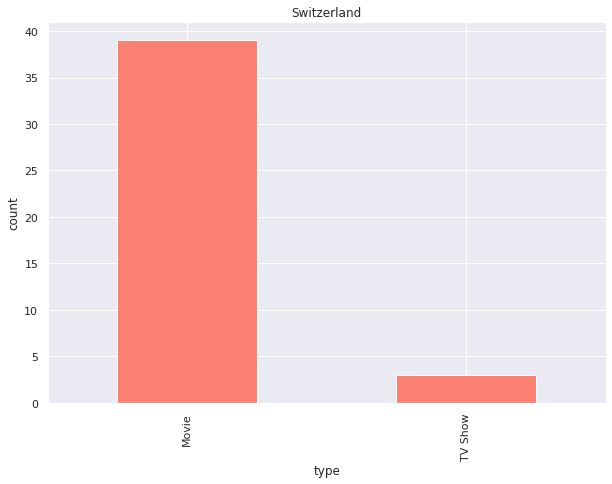

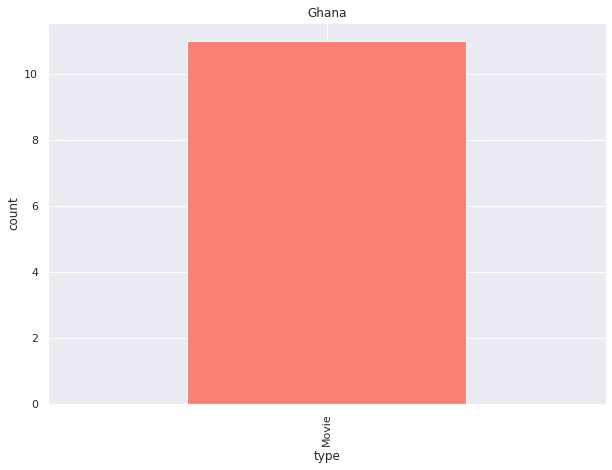

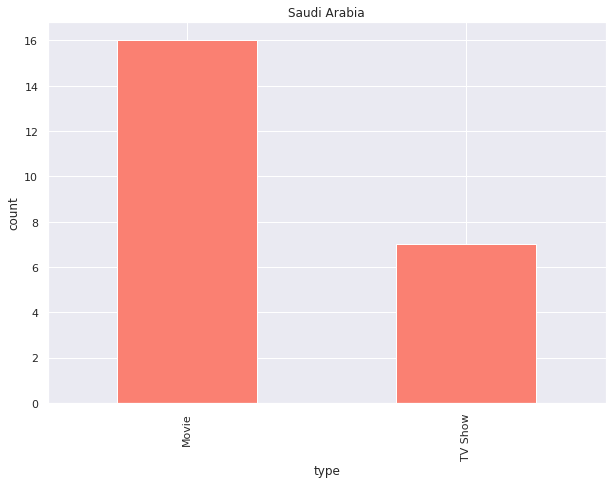

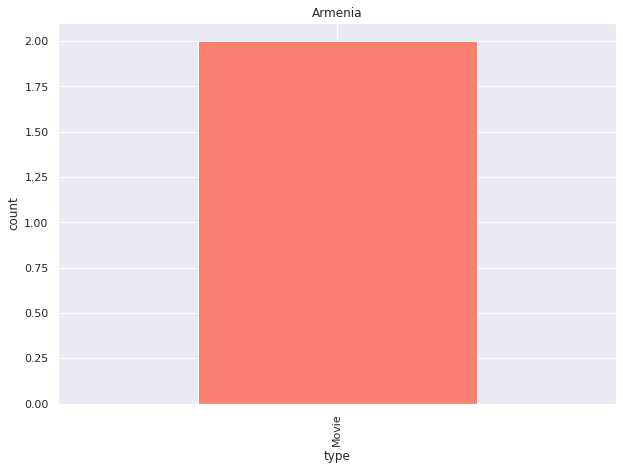

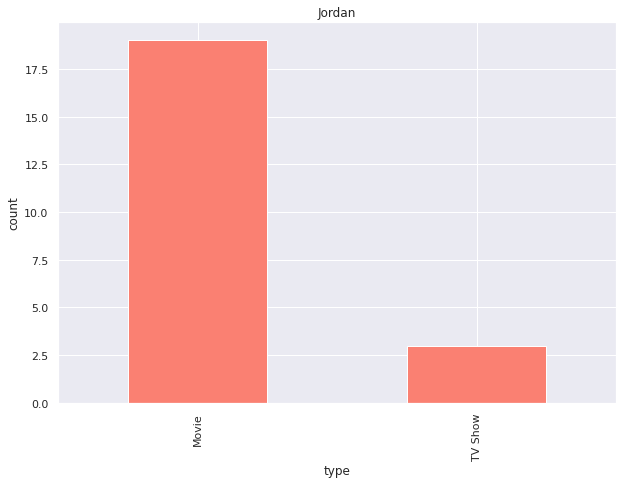

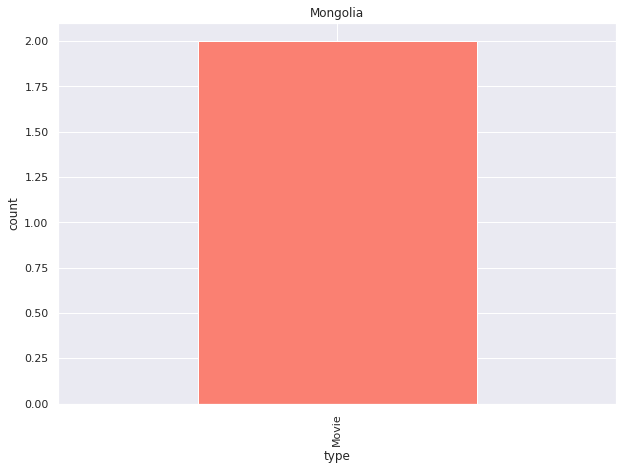

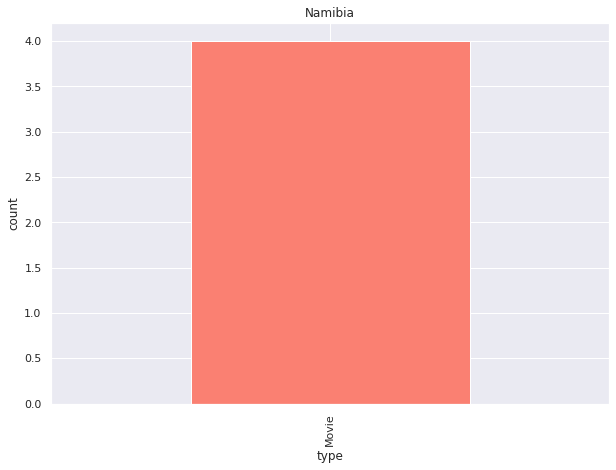

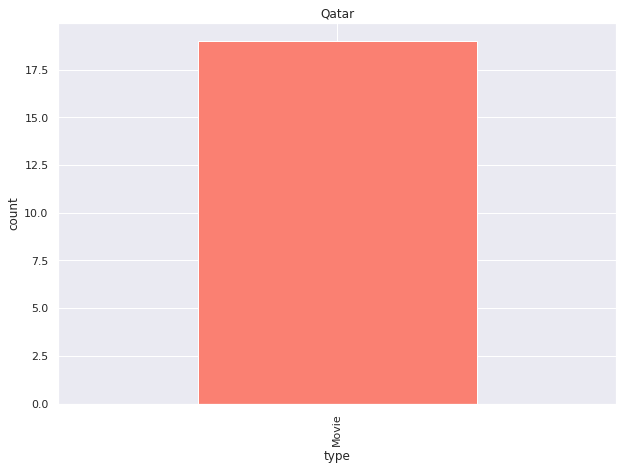

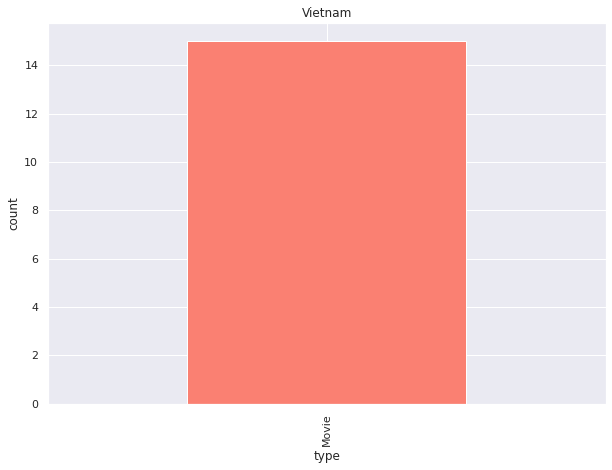

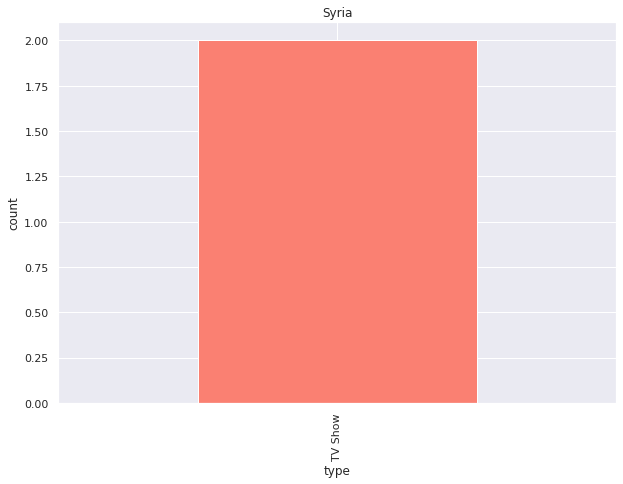

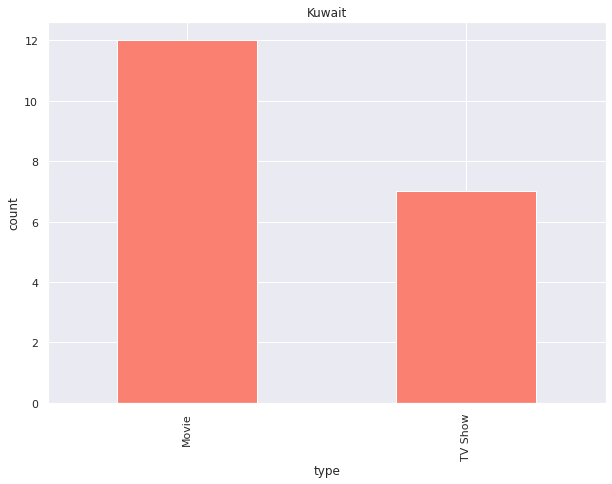

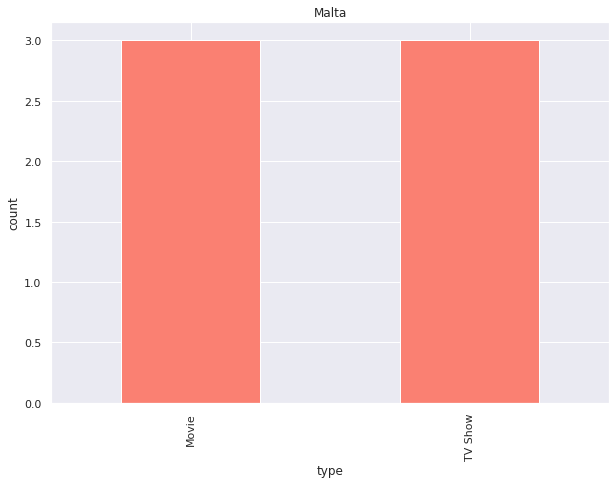

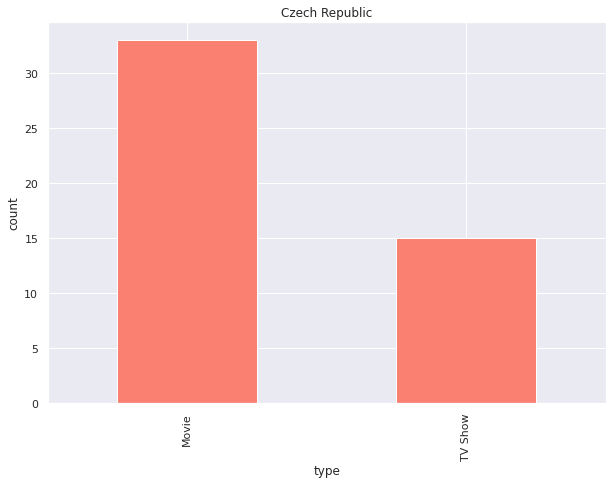

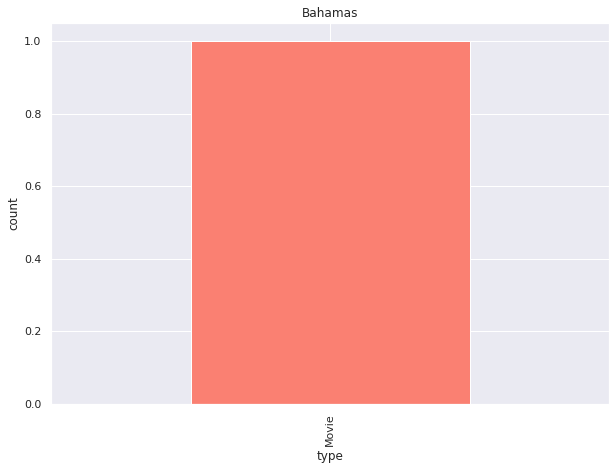

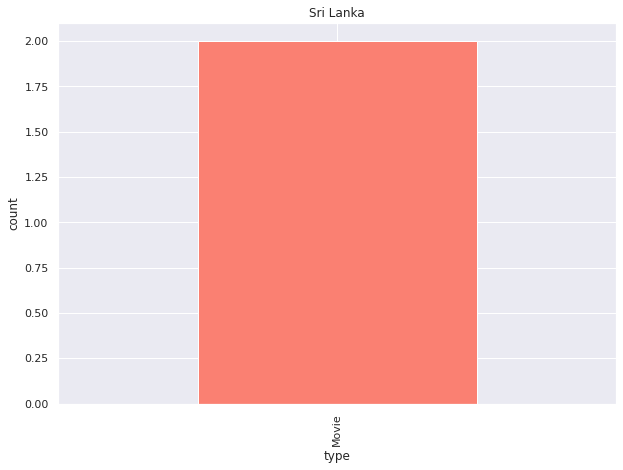

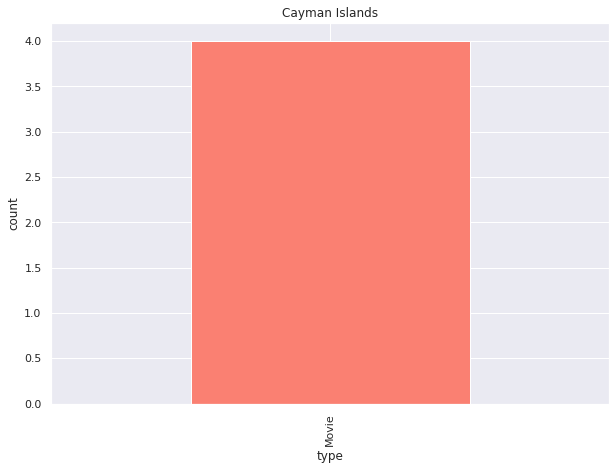

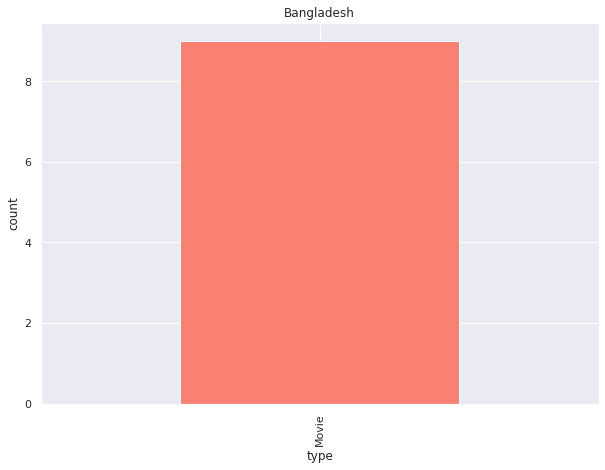

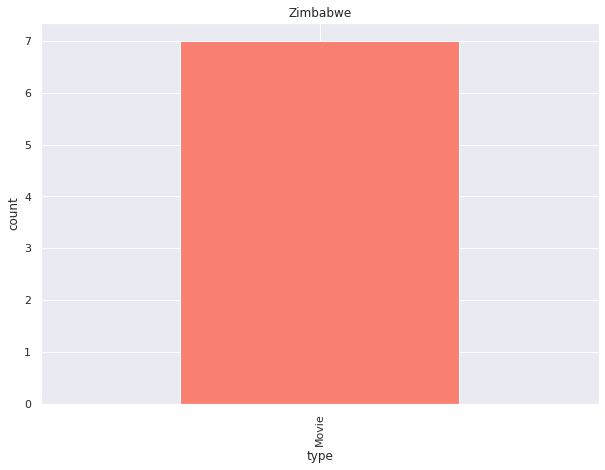

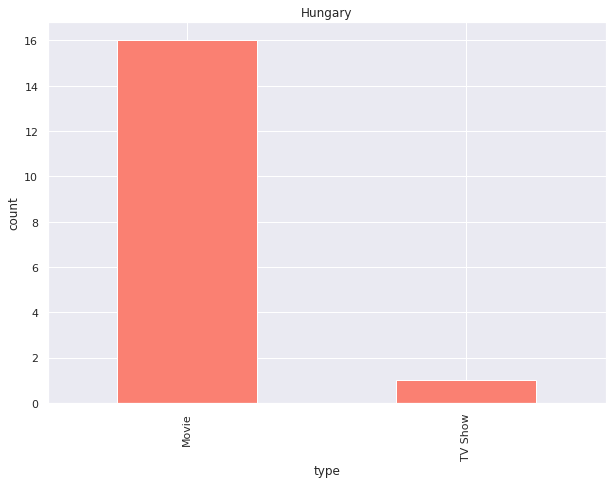

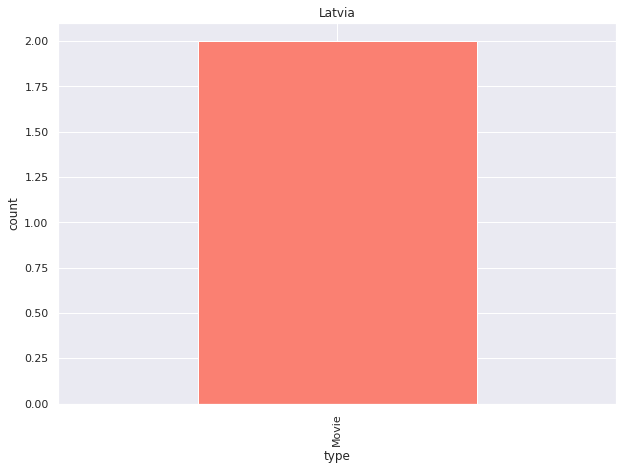

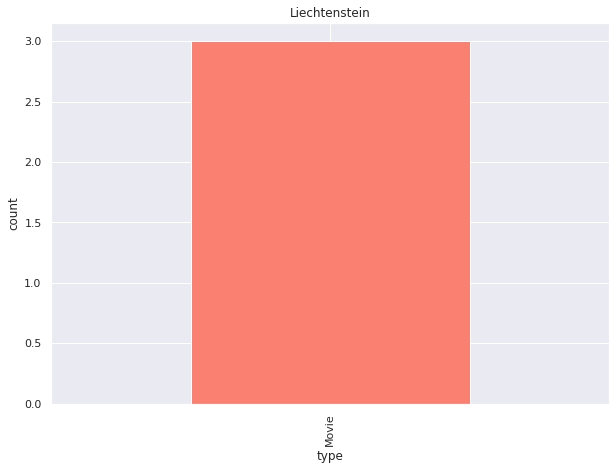

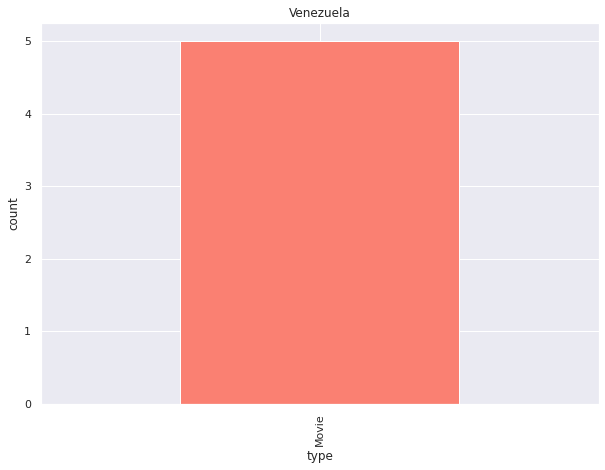

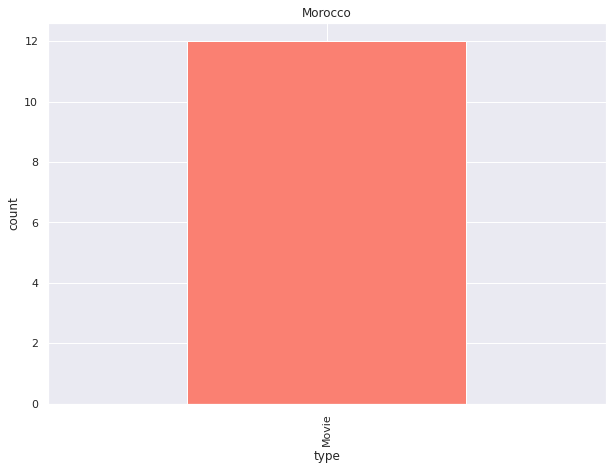

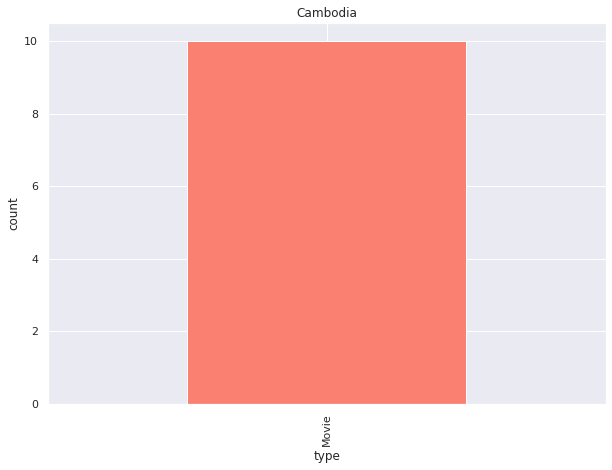

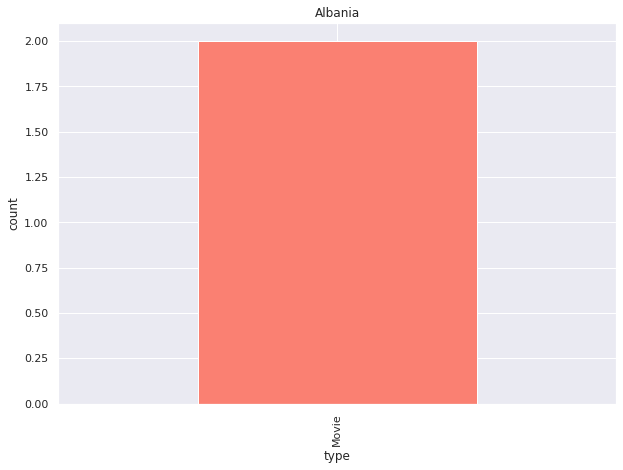

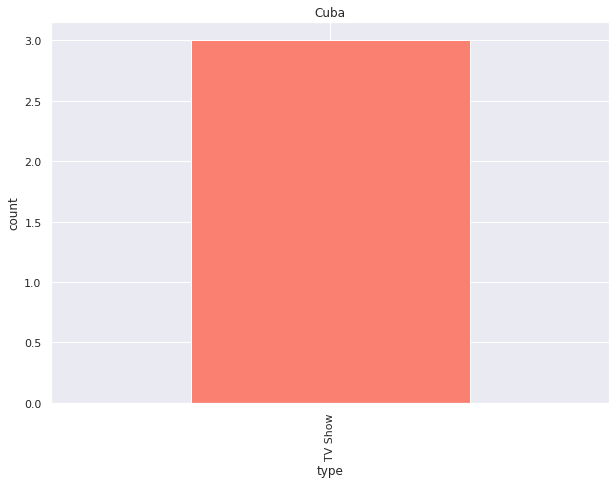

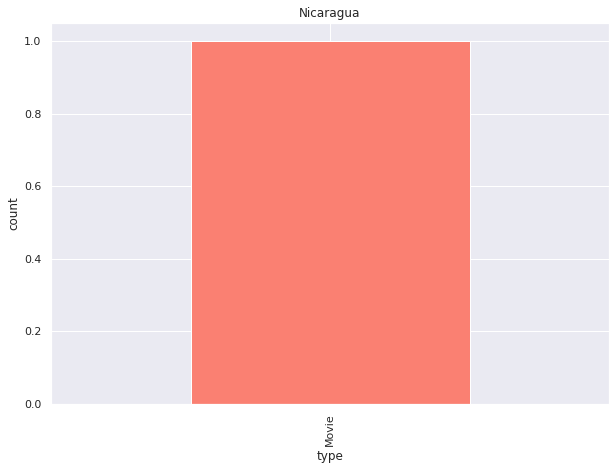

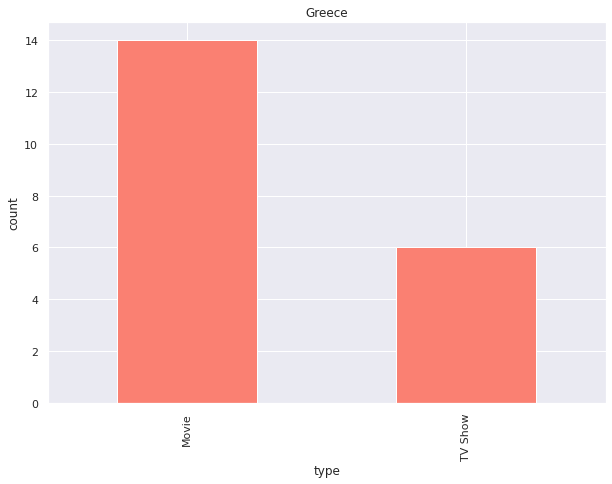

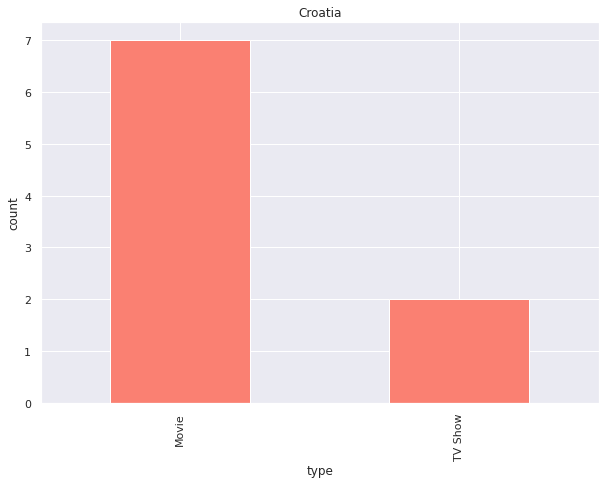

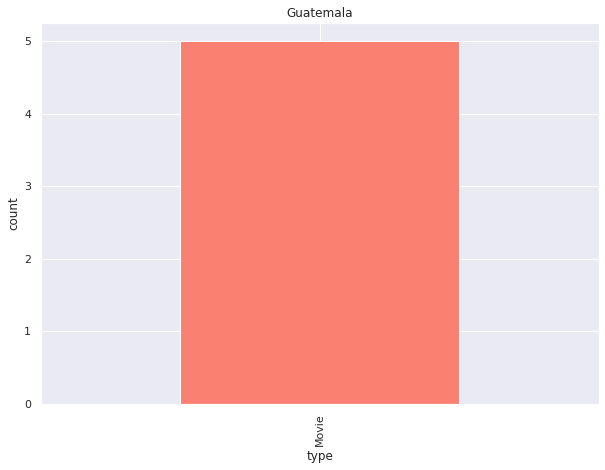

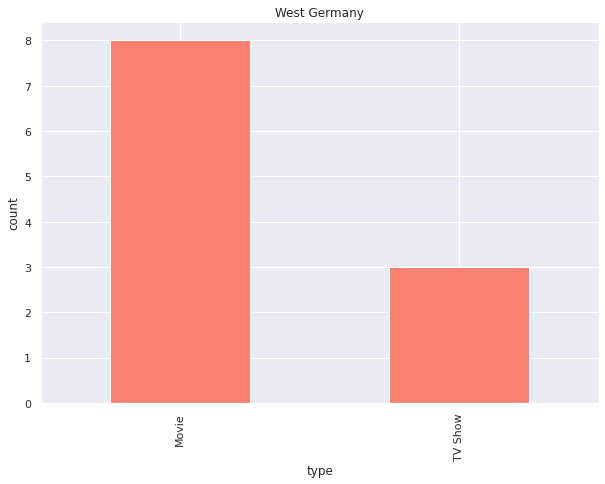

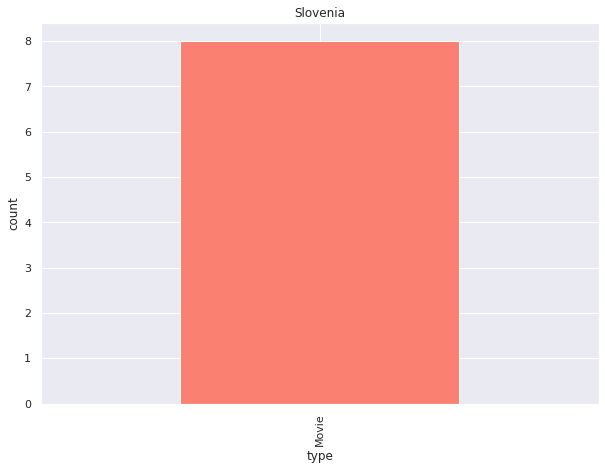

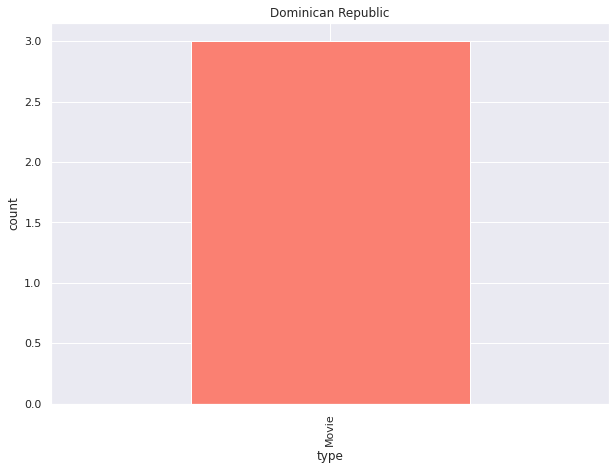

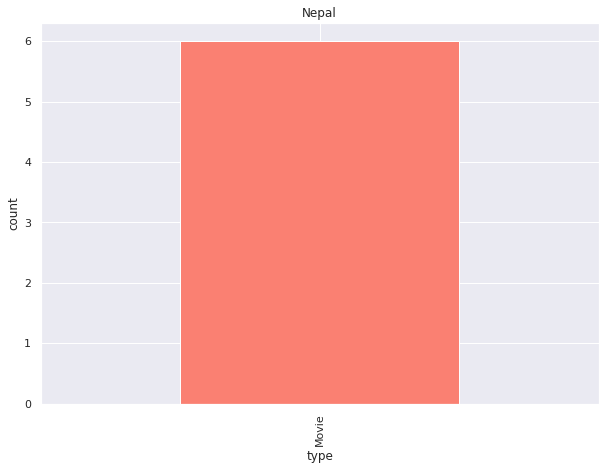

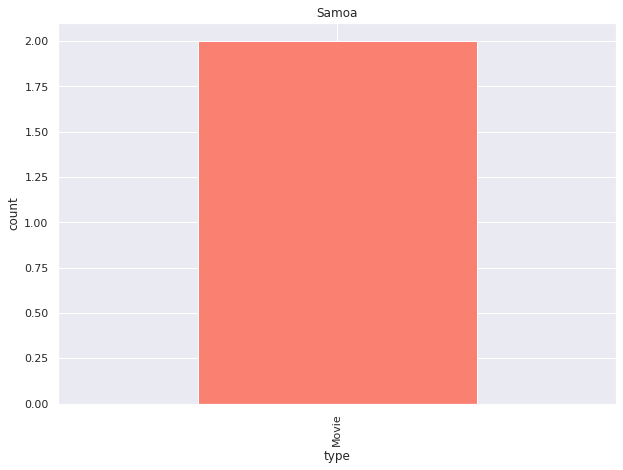

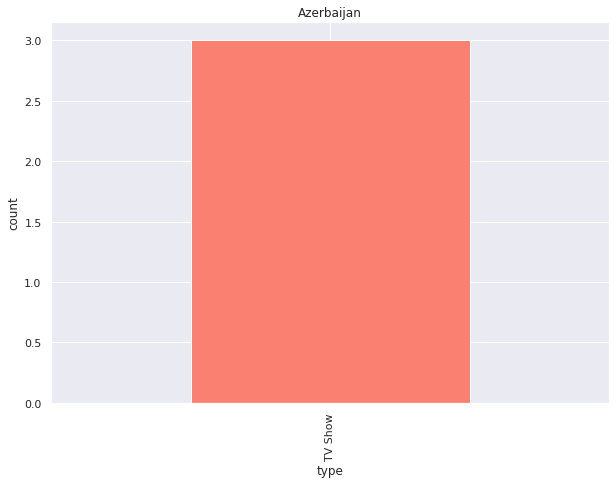

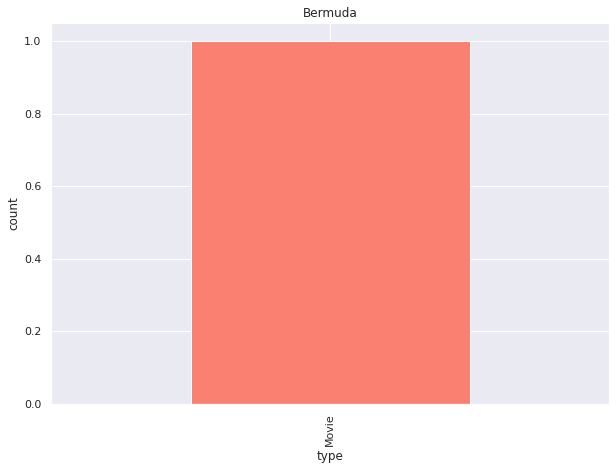

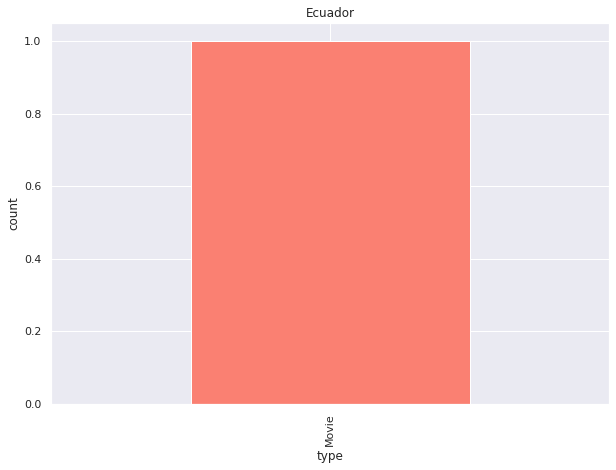

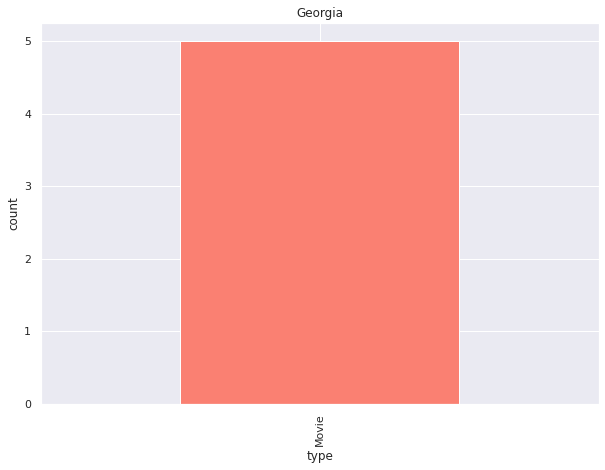

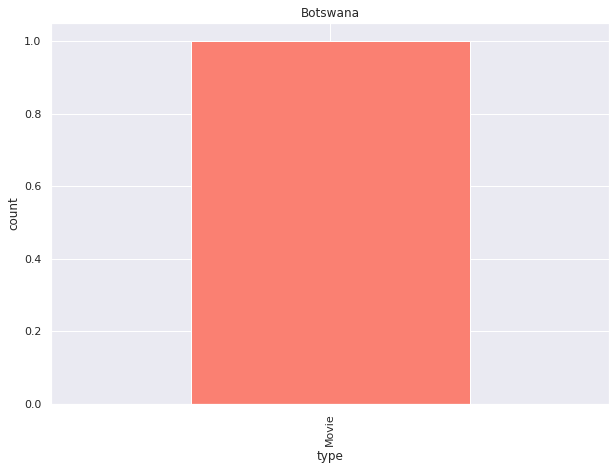

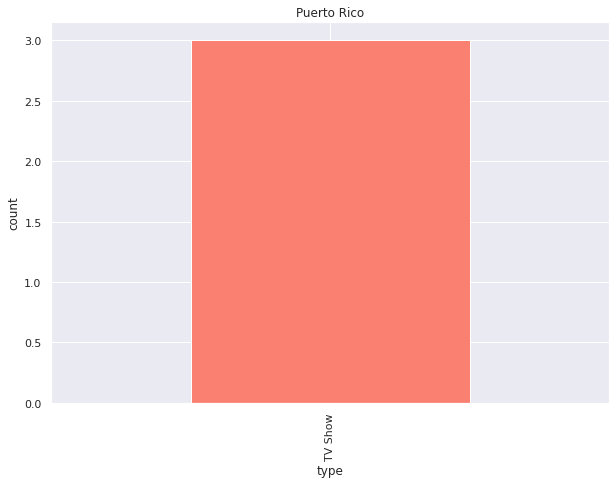

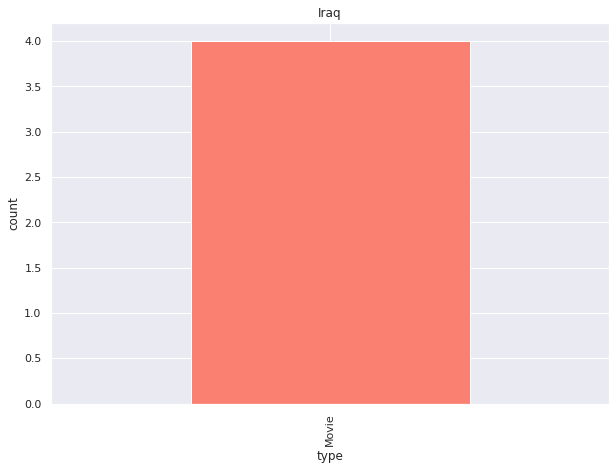

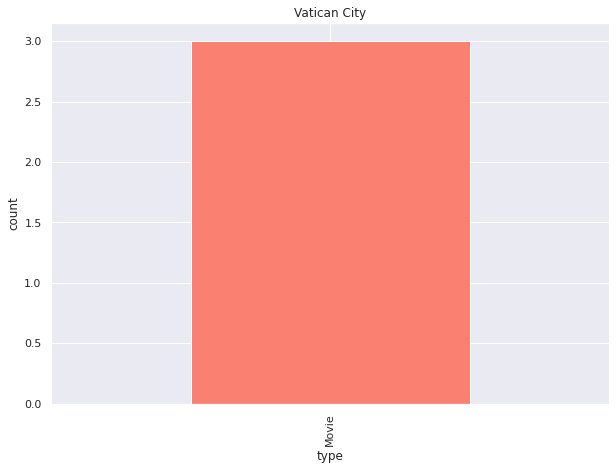

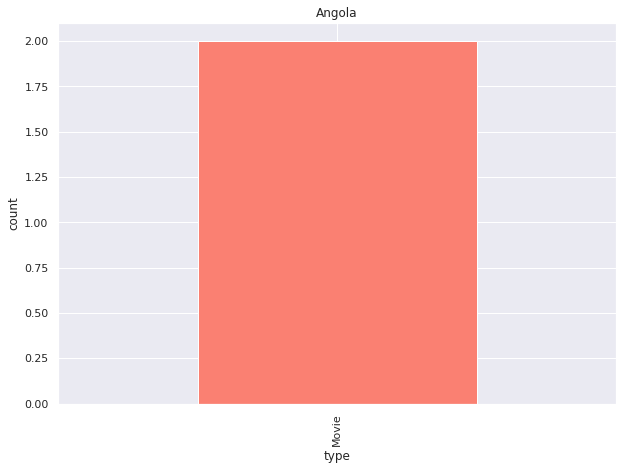

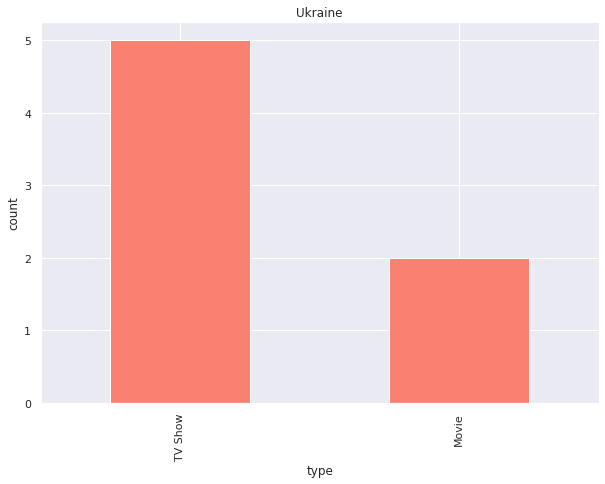

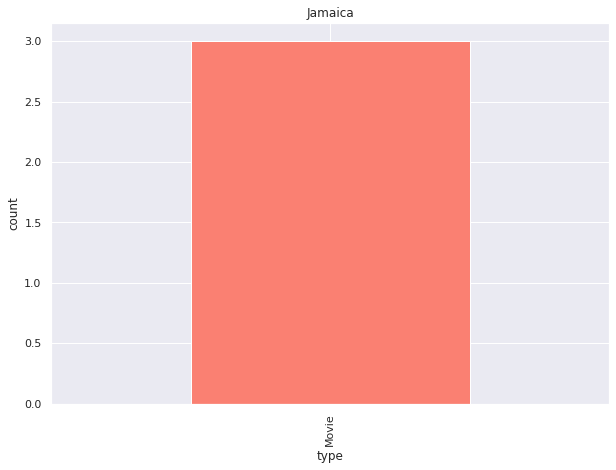

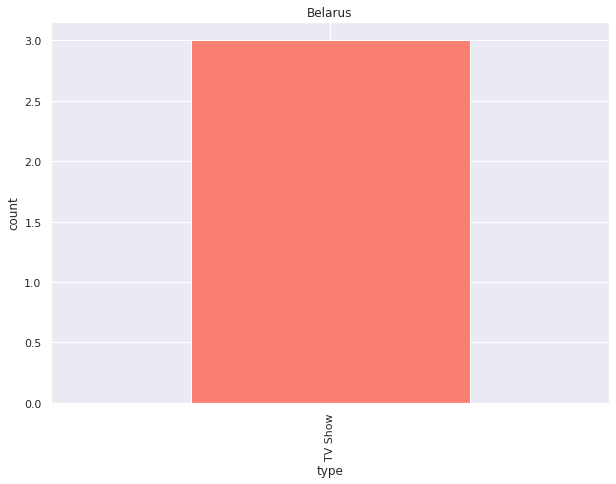

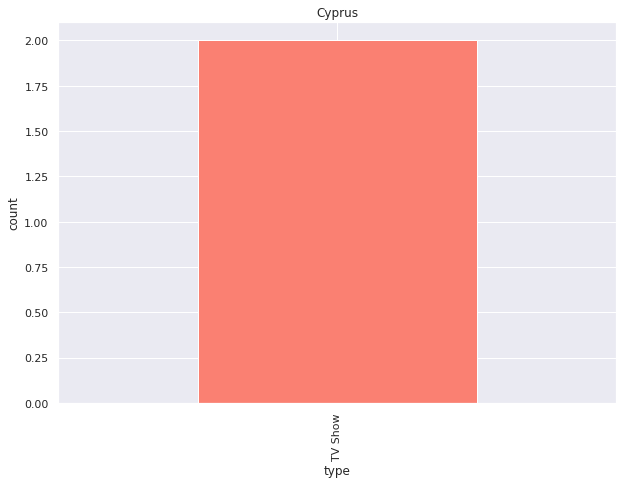

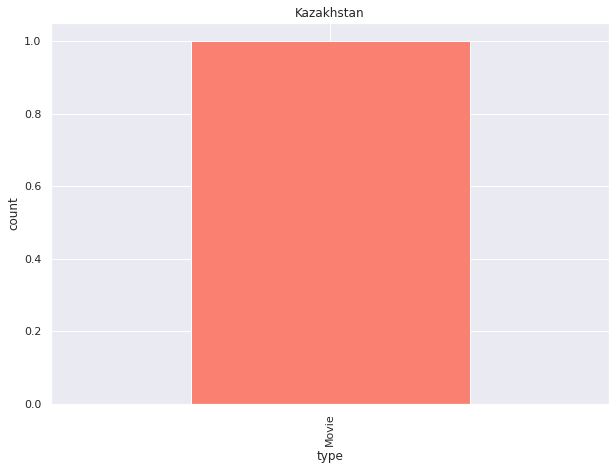

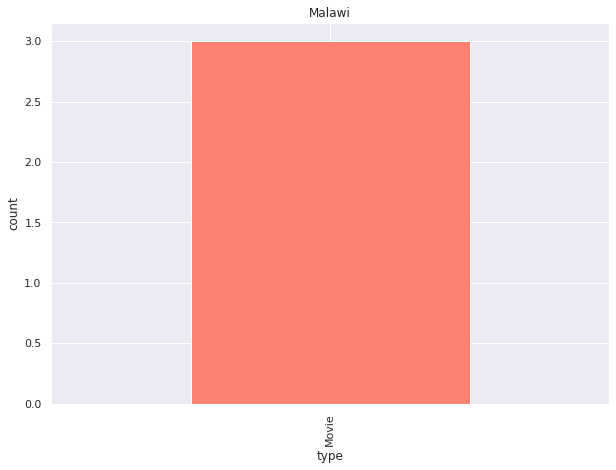

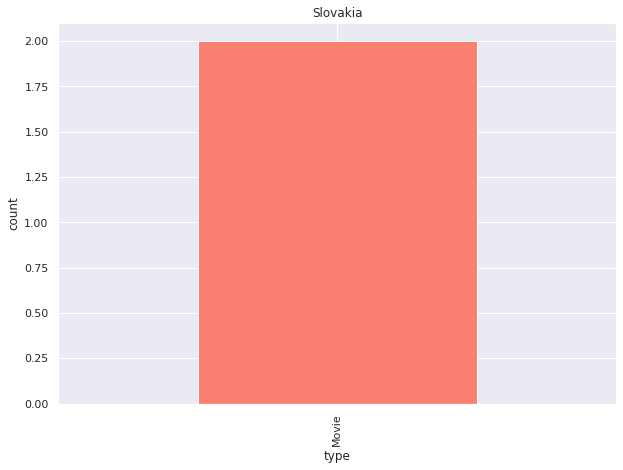

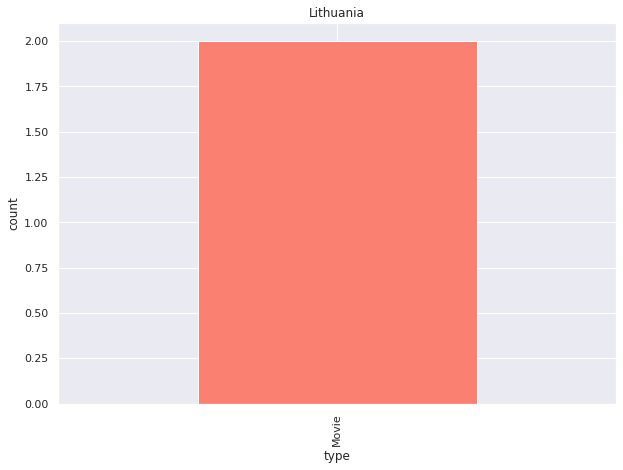

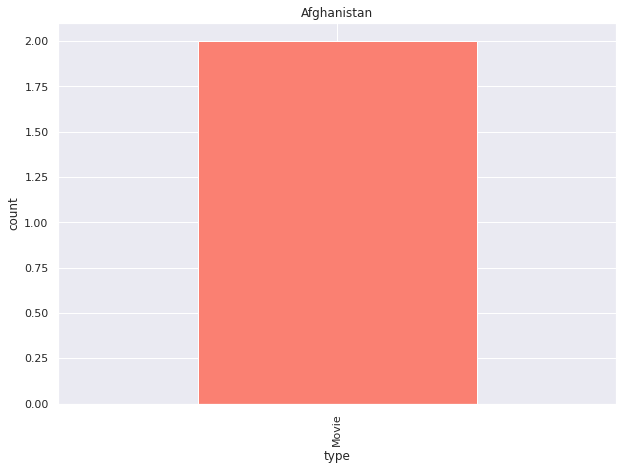

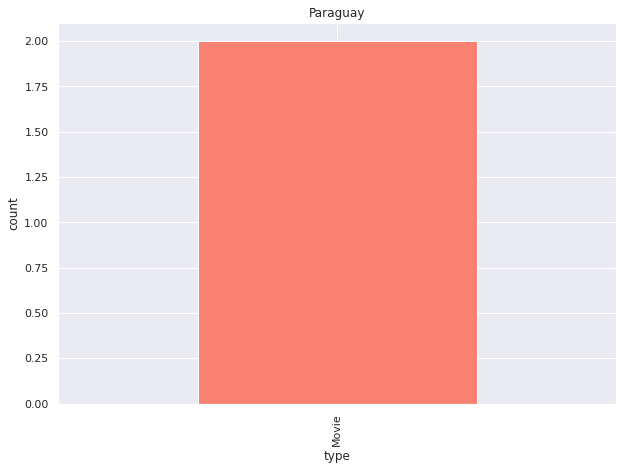

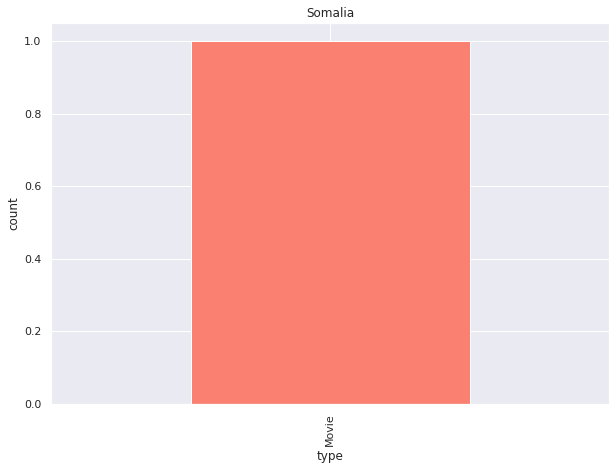

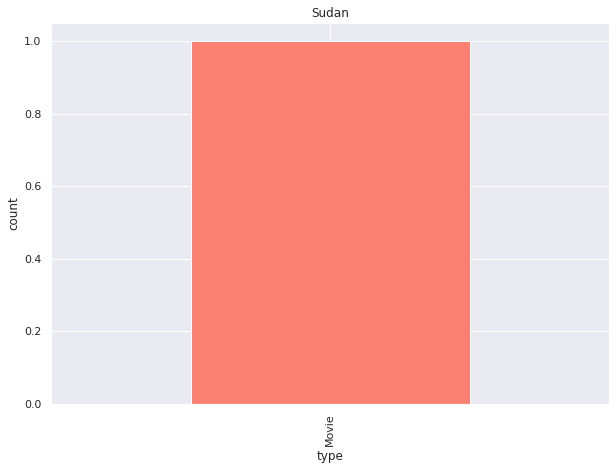

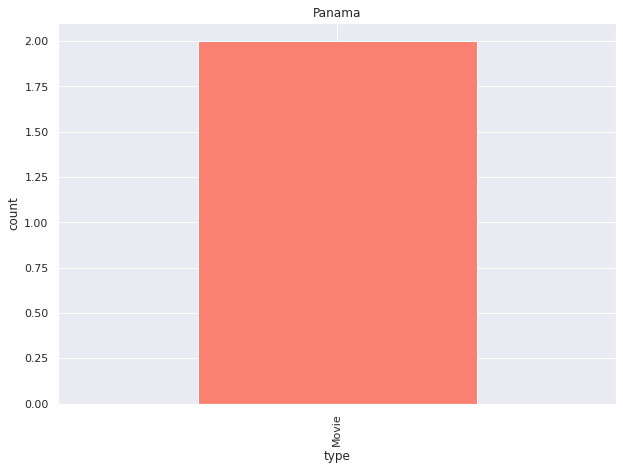

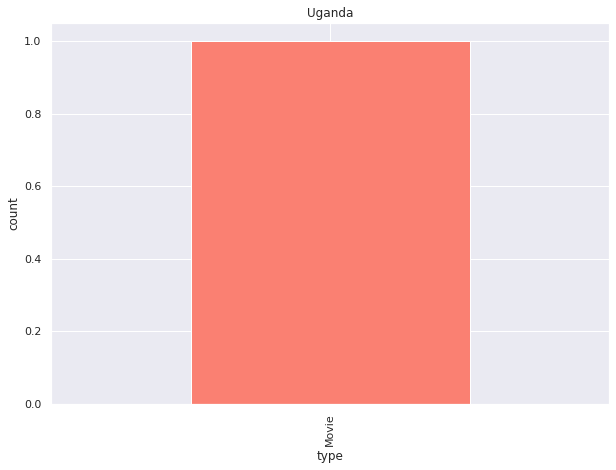

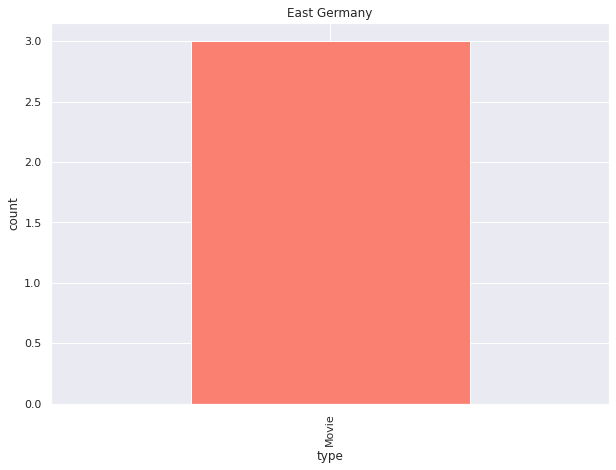

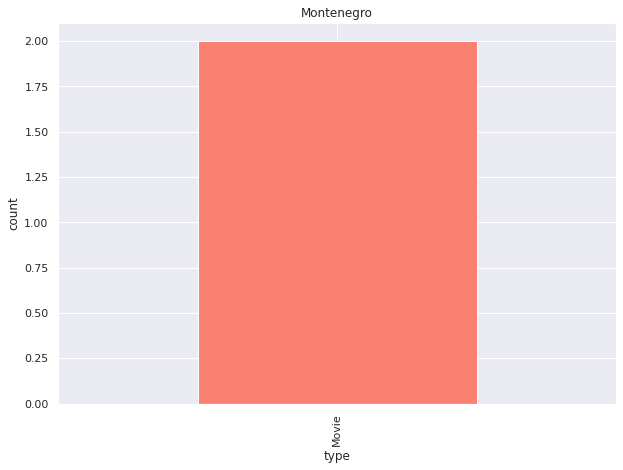

In [124]:
#Plotting each contriwise content type.
for cont in distinct_country:
  cg_df[cg_df['country_list'].str.replace(",","") == cont]['type'].value_counts().plot(kind = "bar", figsize = (10,7), color = 'salmon')
  plt.title(cont)
  plt.xlabel('type')
  plt.ylabel('count')
  plt.show()
  print("\n")

Above list of graphs clearly shows the country wise content type listings.
We can draw lots of useful insights from the above graphs -
*   Most of the countries have produced more movies than TV Shows.
*   Countries like Singapore, Japan, South Korea, Taiwan, Russia, Mauritius etc. have produced more TV shows than movies.
* Mauritius, Syria, Cuba have produced only TV Shows.



#### 4. Is Netflix has increasingly focusing on TV rather than movies in recent years.

Plot showing number of movies and TV Shows added over the years.

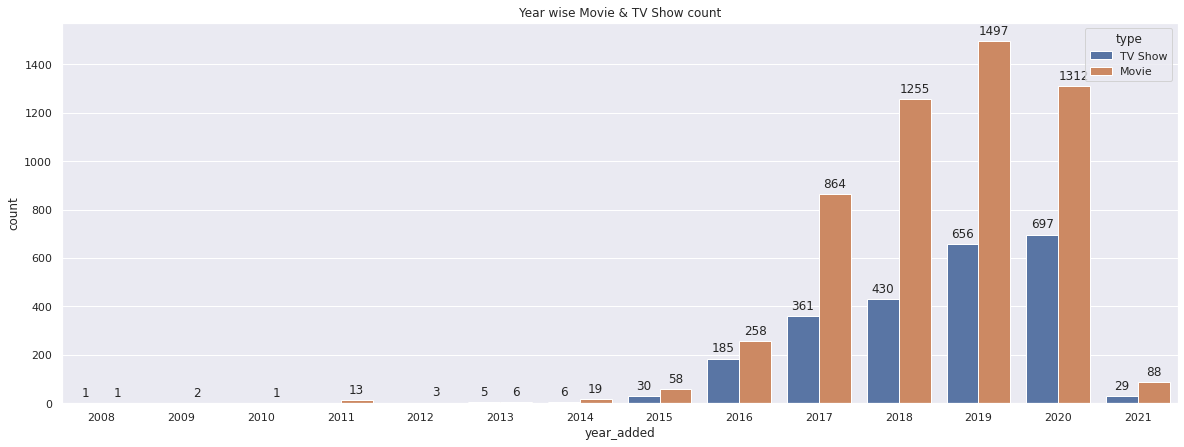

In [125]:
#Plotting code
plt.figure(figsize = (20,7))
p = sns.countplot(x='year_added', data = nf_df, hue = 'type')
plt.title('Year wise Movie & TV Show count')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

* Over the years, Netflix has consistently focused on adding more shows in its platform.
* There is a decrease in number of movies added in the year 2020 as compared to year 2019 whereas the number of TV Shows have increased from 656 to 697 from year 2019 to year 2020. 
* This might signal that Netflix is increasingly concentrating on introducing more TV series to its platform rather than movies.

In [126]:
#Extracting year wise TV Show & Movie added
yr_added_movie = nf_df[nf_df['type'] == "Movie"]['year_added'].value_counts().reset_index().sort_values(by = 'index')
yr_added_tv = nf_df[nf_df['type'] == "TV Show"]['year_added'].value_counts().reset_index().sort_values(by = 'index')

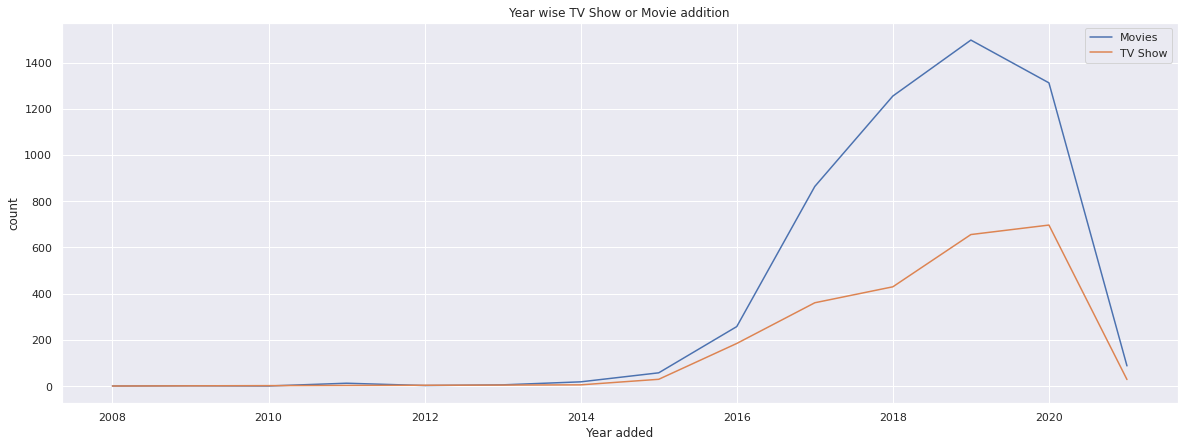

In [127]:
#Plotting a line graph
plt.figure(figsize = (20,7))
plt.plot('index','year_added', data = yr_added_movie, label = 'Movies')
plt.plot('index','year_added', data = yr_added_tv, label = 'TV Show')
plt.title('Year wise TV Show or Movie addition')
plt.xlabel('Year added')
plt.ylabel('count')
plt.legend()
plt.show()

From the above graph also we can infer that number of movie addition has decresed after 2019 whereas number of TV Show addition has increased after 2019.

This shows that netflix is focusing more on TV shows.

#### 5. Is number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled?

In [128]:
#Number of TV shows & Movies till 2010
nf_df[nf_df['year_added'] <=2010]['type'].value_counts()

Movie      4
TV Show    1
Name: type, dtype: int64

There are only 4 movies & 1 TV Show till 2010.

In [129]:
#Number of TV shows & Movies till 2017
nf_df[nf_df['year_added'] < 2018]['type'].value_counts()

Movie      1225
TV Show     588
Name: type, dtype: int64

Till year 2017 number of movies became 1225 and number of TV Show became 588.

In [130]:
#Now let's check the Movie and TV count from 2019 to 2021.
nf_df[nf_df['year_added'] >= 2018]['type'].value_counts()

Movie      4152
TV Show    1812
Name: type, dtype: int64

* *The above data shows that number of movies have increased from 1225 to 4152 from year 2017 to year 2021 number of movies has not decreased as shown in the report.*
* *The number of TV Shows have increased from 588 in 2017 to 1812 in 2021. Number of TV Shows have increased more than three times. This statement is truely mentioned in the report.*

## ***5. Data Pre-processing For Text Based Clustering***

### 1. Initial Preprocessing Steps

We will cluster the shows on Netflix based on the following attributes:

* Director
* Cast
* Country
* Listed in (genres)
* Description


In [131]:
#Creating a new dataset for clustering
nf_df_clus = nf_df_org.copy()
nf_df_clus.fillna("", inplace = True)

#Combining all the clustering attributes into a new column
nf_df_clus['clustered_attributes'] = (nf_df_clus['director'] + ' ' + nf_df_clus['cast'] +' ' + nf_df_clus['country'] +' ' + nf_df_clus['listed_in'] +' ' + nf_df_clus['description'])

In [132]:
#Checking any one row
nf_df_clus['clustered_attributes'][18]

"Swapnaneel Jayakar Rahul Pethe, Mrunmayee Deshpande, Adinath Kothare, Vaibhav Mangale, Jaywant Wadkar, Satish Pulekar, Naina Apte, Uday Tikekar India Comedies, Dramas, Independent Movies On India's Independence Day, a zany mishap in a Mumbai chawl disrupts a young love story while compelling the residents to unite in aid of a little boy."

In [133]:
#Checking the head of newly created dataset for clustering
nf_df_clus.head()

show_id     type  title           director  \
0      s1  TV Show     3%                      
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                                clustered_attributes  
0   João Miguel, Bianca Comparato, Michel Gomes, ...  
1  Jorge Michel Grau Demián Bichir, Héctor Bonill...  
2  Gilbert Chan Tedd Chan, Stella Chung, Henley H...  
3  Shane Acker Elijah Wood, John C. Reilly, Jenni...  
4  Robert Luketic Jim Sturgess, Kevin Spacey, Kat...

### 2. Removing non-ASCII characters

Since there are lot's of non ASCII characters in the dataste we will first remove the non - ASCII characters from the dataset.

In [134]:
# Function to remove non-ASCII characters
def remove_non_ASCII(words):
    """This function removes the non-ASCII characters"""
    new_words = []
    for chars in words:
        new_word = unicodedata.normalize('NFKD', chars).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [135]:
# Removing non-ascii characters
nf_df_clus['clustered_attributes'] = remove_non_ASCII(nf_df_clus['clustered_attributes'])

In [136]:
#Checking any one row after remvoing the non-ASCII characters
nf_df_clus['clustered_attributes'][18]

"Swapnaneel Jayakar Rahul Pethe, Mrunmayee Deshpande, Adinath Kothare, Vaibhav Mangale, Jaywant Wadkar, Satish Pulekar, Naina Apte, Uday Tikekar India Comedies, Dramas, Independent Movies On India's Independence Day, a zany mishap in a Mumbai chawl disrupts a young love story while compelling the residents to unite in aid of a little boy."

###3. Removing stopwords and converting all chars to lower case

In [137]:
# Extracting the stopwords from nltk library
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [138]:
# Printing stopwords
print(list(sw))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [139]:
# function to remove stopwords
def remove_stopwords(text):
    '''This function removes stopwords'''
    # Code to remove the stop words and lowercase the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    return " ".join(text)

In [140]:
# Removing stopwords
nf_df_clus['clustered_attributes'] = nf_df_clus['clustered_attributes'].apply(remove_stopwords)

In [141]:
#Checking any one row after remvoing stopwords converting all the chars to lowercase
nf_df_clus['clustered_attributes'][18]

"swapnaneel jayakar rahul pethe, mrunmayee deshpande, adinath kothare, vaibhav mangale, jaywant wadkar, satish pulekar, naina apte, uday tikekar india comedies, dramas, independent movies india's independence day, zany mishap mumbai chawl disrupts young love story compelling residents unite aid little boy."

### 4. Removing Punctuations

In [142]:
# Function to remove punctuations
def punctuation_remove(text):
    '''This function will remove punctuations from the passed sentence.'''
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [143]:
#Removing all the punctuations
nf_df_clus['clustered_attributes'] = nf_df_clus['clustered_attributes'].apply(punctuation_remove)

In [144]:
#Checking any one row after remvoing punctuations
nf_df_clus['clustered_attributes'][18]

'swapnaneel jayakar rahul pethe mrunmayee deshpande adinath kothare vaibhav mangale jaywant wadkar satish pulekar naina apte uday tikekar india comedies dramas independent movies indias independence day zany mishap mumbai chawl disrupts young love story compelling residents unite aid little boy'

### 5. Lemmatization

In [145]:
#Function for implementing lemmatization
def lemmatize_verbs(words):
    """This function will lemmatize the passed sentence"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

Lemmatisation is the process of grouping together the inflected forms of a word so they can be analysed as a single item.

In [146]:
#Doing lemmatization of words
nf_df_clus['clustered_attributes'] = lemmatize_verbs(nf_df_clus['clustered_attributes'])

In [147]:
#Checking any one row after doing lemmatization
nf_df_clus['clustered_attributes'][18]

'swapnaneel jayakar rahul pethe mrunmayee deshpande adinath kothare vaibhav mangale jaywant wadkar satish pulekar naina apte uday tikekar india comedies dramas independent movies indias independence day zany mishap mumbai chawl disrupts young love story compelling residents unite aid little boy'

### 6. Tokenization

Tokenization is the process of tokenizing or splitting a string, text into a list of tokens.

In [148]:
tokenizer = TweetTokenizer()

In [149]:
#Doing tokenization of words
nf_df_clus['clustered_attributes'] = nf_df_clus['clustered_attributes'].apply(lambda x: tokenizer.tokenize(x))

In [150]:
#Checking any one row after tokenization
nf_df_clus['clustered_attributes'][18]

['swapnaneel',
 'jayakar',
 'rahul',
 'pethe',
 'mrunmayee',
 'deshpande',
 'adinath',
 'kothare',
 'vaibhav',
 'mangale',
 'jaywant',
 'wadkar',
 'satish',
 'pulekar',
 'naina',
 'apte',
 'uday',
 'tikekar',
 'india',
 'comedies',
 'dramas',
 'independent',
 'movies',
 'indias',
 'independence',
 'day',
 'zany',
 'mishap',
 'mumbai',
 'chawl',
 'disrupts',
 'young',
 'love',
 'story',
 'compelling',
 'residents',
 'unite',
 'aid',
 'little',
 'boy']

### 7. Vectorization

Word Embeddings or Word vectorization is a methodology in NLP to map words or phrases from vocabulary to a corresponding vector of real numbers which used to find word predictions, word similarities/semantics. 

We can vectorize the words using TFIDF (Term Frequency Inverse Document Frequency) vectorizer.

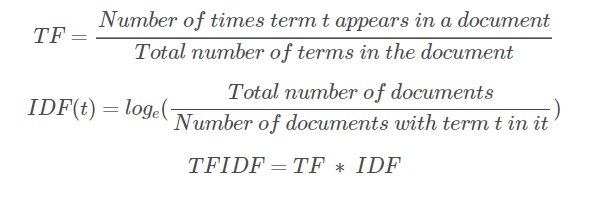

In [151]:
#Making a variable for the clustering data
clus_data = nf_df_clus['clustered_attributes']

In [152]:
# Tokenization
def identity_tokenizer(text):
    return text

# Using TFIDF vectorizer to vectorize the words 
# max features = 20000 to prevent system from crashing
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False,max_features = 20000)    
X = tfidf.fit_transform(clus_data)

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.



In [153]:
X

<7787x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 235288 stored elements in Compressed Sparse Row format>

In [154]:
#Checking shape of X
X.shape

(7787, 20000)

In [155]:
# convert X into array form for clustering
X = X.toarray()

### 8. Dimensionality reduction using PCA (Principal component Analysis)

In [156]:
#PCA to reduce dimensionality
pca = PCA(random_state=40)
pca.fit(X)

PCA(random_state=40)

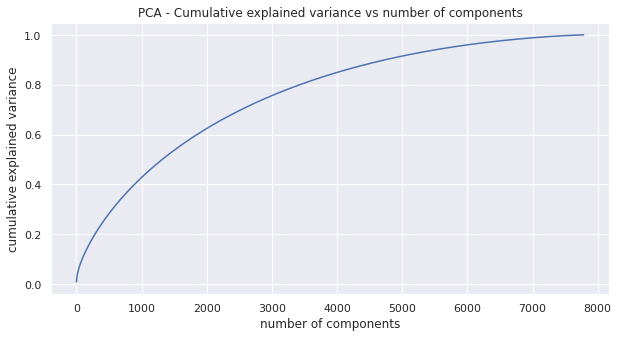

In [157]:
#Plotting PCA curve
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

We can infer following information from the above graph -

* 100% of the variance is explained by about 7500 components.
* More than 80% of the variance is explained just by 4000 components.
* Hence to simplify the model, and reduce dimensionality, we can take the top 4000 components, which will still be able to capture more than 80% of variance.

In [158]:
#Reducing the dimensions to 4000 using pca
pca = PCA(n_components=4000,random_state=40)
pca.fit(X)

PCA(n_components=4000, random_state=40)

In [159]:
#Transformed features
x_pca = pca.transform(X)

In [160]:
#Shape of transformed features
x_pca.shape

(7787, 4000)

## ***6. ML Model Implementation***

### 1. K-Means Clustering

#### Elbow method to find the optimal value of k

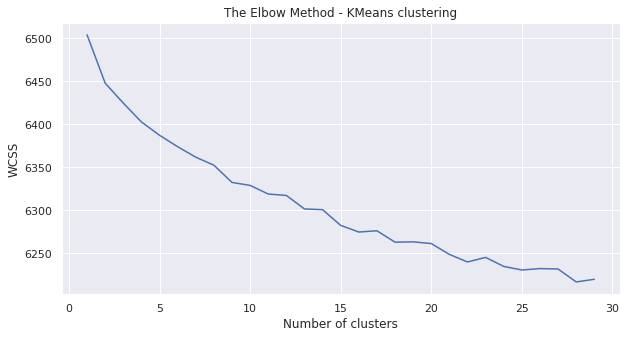

In [169]:
# Elbow method to find the optimal value of k
wcss=[]
for i in range(1,30):
  kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init=10, random_state=33)
  kmeans.fit(x_pca)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,30)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The sum of squared distance between each point and the centroid in a cluster (WCSS) decreases with the increase in the number of clusters. This does'nt shows a good representation to select the optimal value of k.

#### Silhouette method to find the optimal value of k

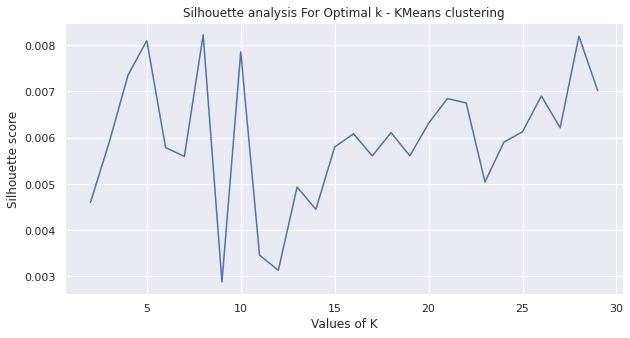

In [172]:
# Plotting Silhouette score for different number of clusters
range_n_clusters = range(2,30)
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialize kmeans
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  cluster_labels = kmeans.labels_
 
  # silhouette score
  silhouette_avg.append(silhouette_score(x_pca, cluster_labels))


#Plotting for optimal value of k
plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

The highest Silhouette score is obtained for 9 clusters.

In [173]:
# Clustering the data into 9 clusters
kmeans = KMeans(n_clusters=9,init='k-means++',random_state=33)
kmeans.fit(x_pca)

KMeans(n_clusters=9, random_state=33)

In [176]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(x_pca, kmeans.labels_)

print(f'Distortion - {kmeans_distortion} \nSilhouette Coefficient - {kmeans_silhouette_score}')

Distortion - 6332.48404936471 
Silhouette Coefficient - 0.0028815975189241676


Silhouette coefficient comes out to be 0.003.

In [177]:
#Predicting the labels for clusters.
label = kmeans.fit_predict(x_pca)

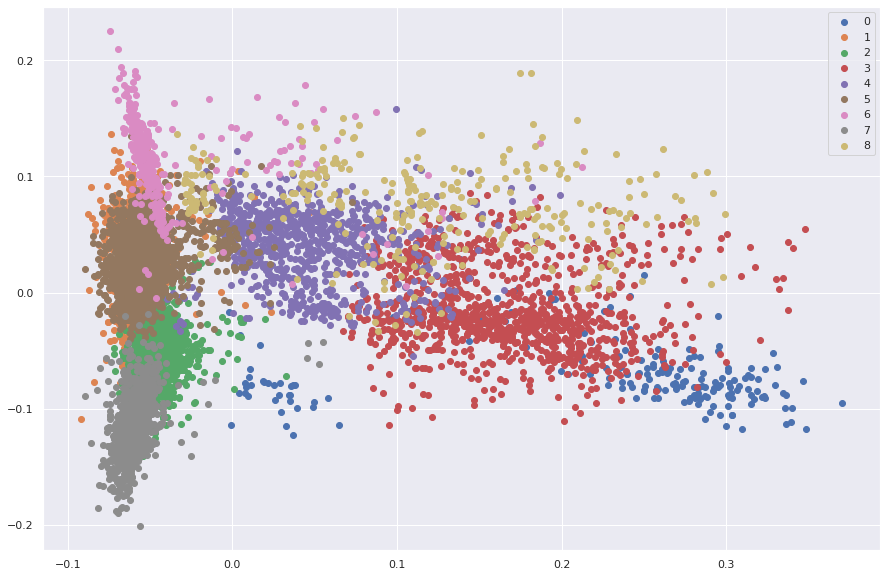

In [179]:
#Getting unique labels
u_labels = np.unique(label)
 
#Plotting the clustered labels:
plt.figure(figsize = (15, 10))
for i in u_labels:
    plt.scatter(x_pca[label == i , 0] , x_pca[label == i , 1] , label = i)
plt.legend()
plt.show()

#### Labeling the dataset as per cluster

In [180]:
# Adding a kmeans cluster label as feature to our dataset
nf_df_clus['kmeans_cluster'] = kmeans.labels_

In [181]:
# Checking the head
nf_df_clus.head()

show_id     type  title           director  \
0      s1  TV Show     3%                      
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                                clustered_attributes  kmeans_cluster  
0  [joao, miguel, bianca, comparato, michel, gome...               3  
1  [jorge, michel, grau, demian, bichir, hector, ...               2  
2  [gilbert, chan, tedd, chan, stella, chung, hen...               2  
3  [shane, acker, elijah, wood, john, c, reilly, ...               5  
4  [robert, luketic, jim, sturgess, kevin, spacey...               5

#### Visualizing the number of TV Show and Movies in each cluster

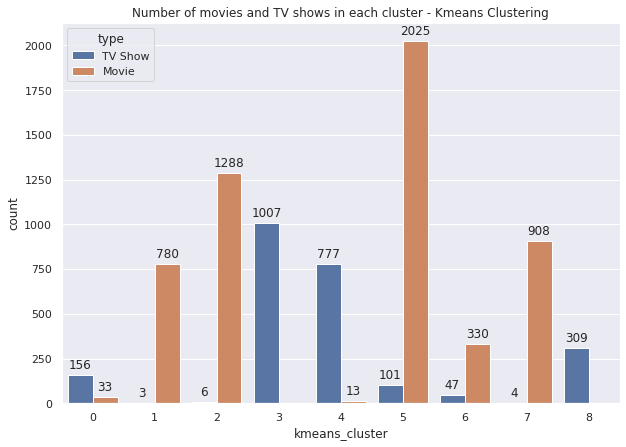

In [182]:
#Plotting number of TV Show and Movie in each cluster
plt.figure(figsize=(10,7))
plot = sns.countplot(x='kmeans_cluster',data=nf_df_clus, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')
for i in plot.patches:
  plot.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

#### Let's plot the wordcloud for each cluster built

In [183]:
col_word_cloud('clustered_attributes', nf_df_clus[nf_df_clus['kmeans_cluster']==0])

TypeError: ignored

<Figure size 1080x504 with 0 Axes>

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [166]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [167]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***